In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("orders.csv")
df

,created_at_utc,tariff_class,tariff_internal_name,status,taxi_status,vehicle_model,vehicle_color,vehicle_car_region,payment_cost,payment_currency_code,driver_call_model
0,1622145491,Эконом,econom,cancelled,waiting,Kia Rio,белый,34,52.00,RUB,no_call
1,1622145422,Эконом,econom,cancelled,driving,LADA (ВАЗ) Granta,серый,34,0.00,RUB,no_call
2,1622145212,Эконом,econom,finished,complete,Renault Logan,белый,34,104.70,RUB,on_demand
3,1622054615,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,белый,34,120.00,RUB,on_demand
4,1622045036,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,белый,34,115.50,RUB,on_demand
...,...,...,...,...,...,...,...,...,...,...,...
1200,1617028952,Эконом,econom,finished,complete,LADA (ВАЗ) Largus,белый,34,472.40,RUB,no_call
1201,1617028458,Эконом,econom,cancelled,driving,LADA (ВАЗ) Granta,белый,34,0.00,RUB,no_call
1202,1617025078,Эконом,econom,finished,complete,LADA (ВАЗ) Granta,серый,34,146.85,RUB,no_call
1203,1616869125,Эконом,econom,cancelled,driving,LADA (ВАЗ) Largus,серый,34,0.00,RUB,no_call


In [4]:
# A bit cleaning
df['created_at_utc'] = df['created_at_utc']
df['created_at_utc'] = pd.to_datetime(df.created_at_utc, unit='s')
df.sort_values(by=['created_at_utc'], inplace=True, ascending=False)

# Visual Data Analysis

## Time independent visualization.

In [5]:
# Brief summary of what we have.

print(df.groupby('tariff_class').payment_cost.count(),'------')
print(df.groupby('status').payment_cost.count(),'------')
print(df.groupby('taxi_status').payment_cost.count(),'------')
print(df.groupby('vehicle_color').payment_cost.count(),'------')
print(df.groupby('driver_call_model').payment_cost.count(),'------')

tariff_class
Доставка      2
Комфорт     450
Комфорт+     45
Эконом      708
Name: payment_cost, dtype: int64 ------
status
cancelled    245
finished     960
Name: payment_cost, dtype: int64 ------
taxi_status
cancelled         7
complete        945
driving         217
failed            8
transporting      5
waiting          23
Name: payment_cost, dtype: int64 ------
vehicle_color
бежевый             24
белый              644
голубой              9
жёлтый             225
зелёный              8
зелёный миндаль      1
коричневый          24
красный             16
оранжевый            1
песочный             1
серебристый          6
серый              134
синий               33
тёмно-зелёный        2
фиолетовый           3
чёрный              74
Name: payment_cost, dtype: int64 ------
driver_call_model
no_call      1199
on_demand       6
Name: payment_cost, dtype: int64 ------


In [6]:
# New variable to work with for Time independent visualization.
time_ind_df = df.copy()
time_ind_df = time_ind_df.drop(columns=['created_at_utc','tariff_internal_name'])

In [7]:
# Function for plots

def barplots(dataframe = time_ind_df):
    for col_name in dataframe:
        if col_name == 'payment_cost': # To get rid of self drawing.
            continue
        else:
            plt.figure(figsize=(20, 7))
            plt.bar(dataframe.groupby(col_name).payment_cost.count().sort_values(ascending=False).head(10).index,dataframe.groupby(col_name).payment_cost.count().sort_values(ascending=False).head(10))
            plt.title(col_name)
            plt.show()

Three plots represent different cases regarded to payment cost:

1. First is the plot without any conditions

2. Second Plot represents the situation when payment is 0

3. Third plot cell presents the opposite of the second - when paymentt is not 0.

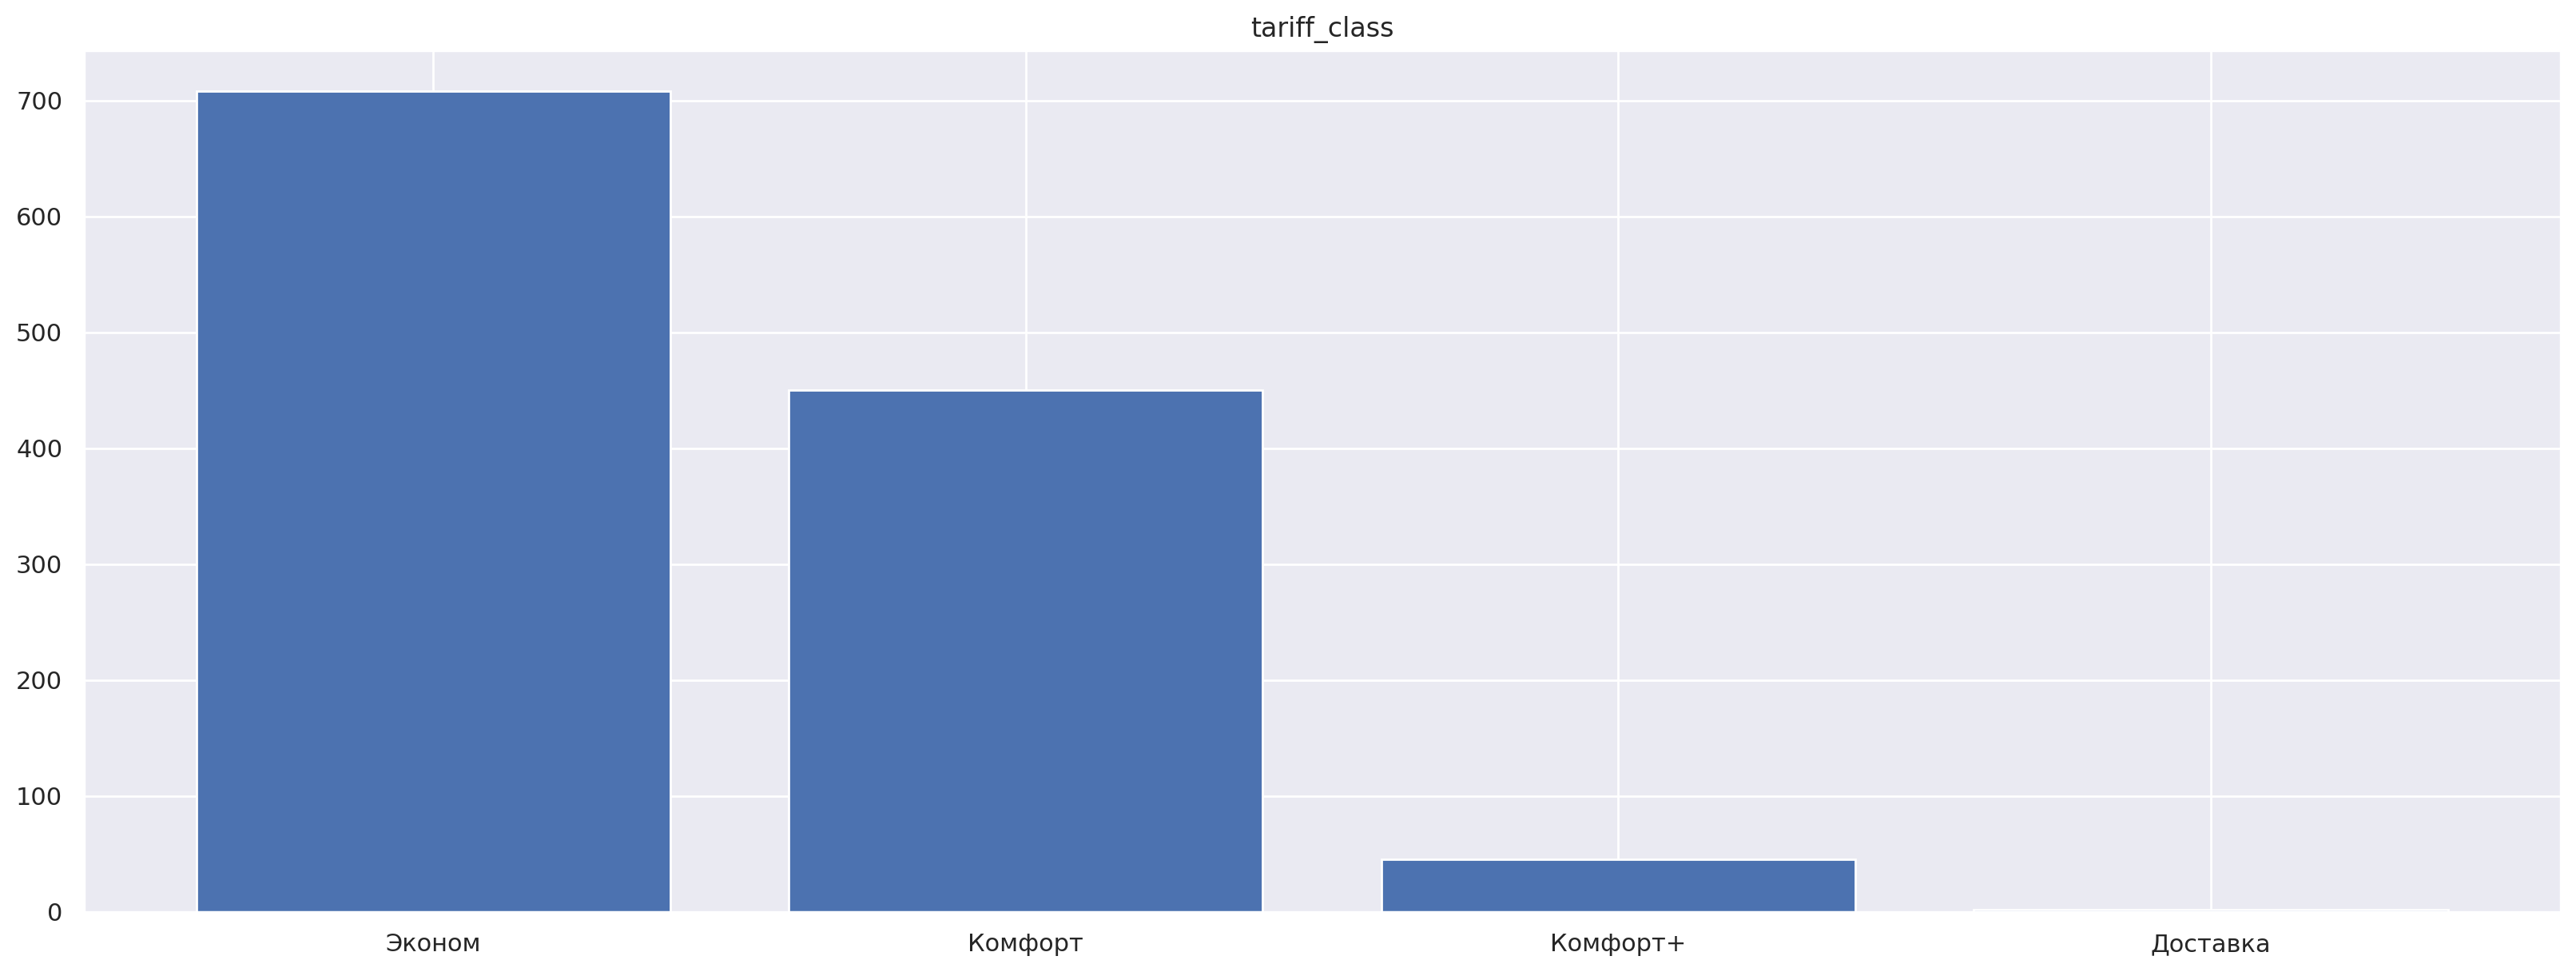

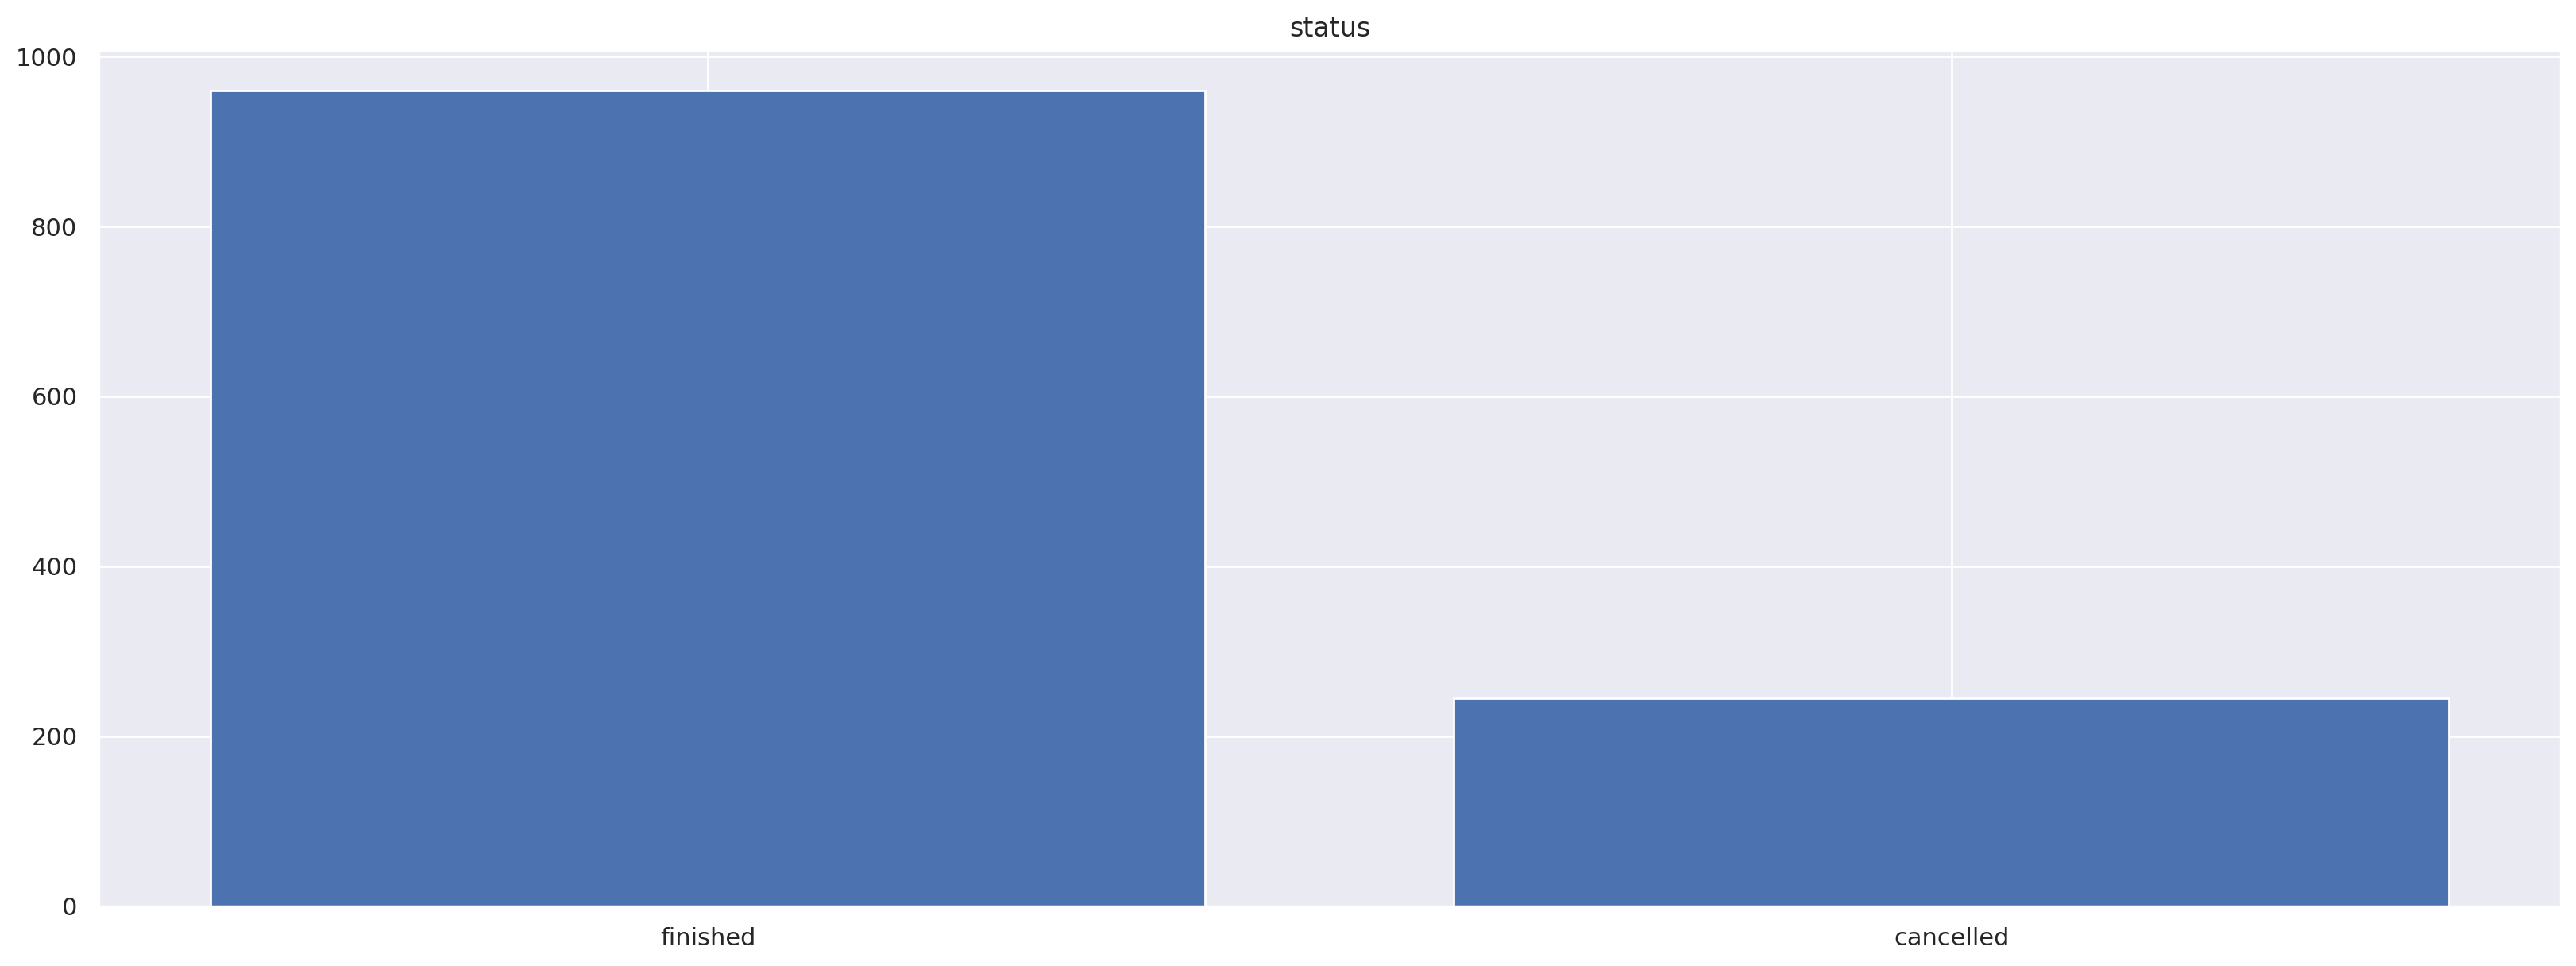

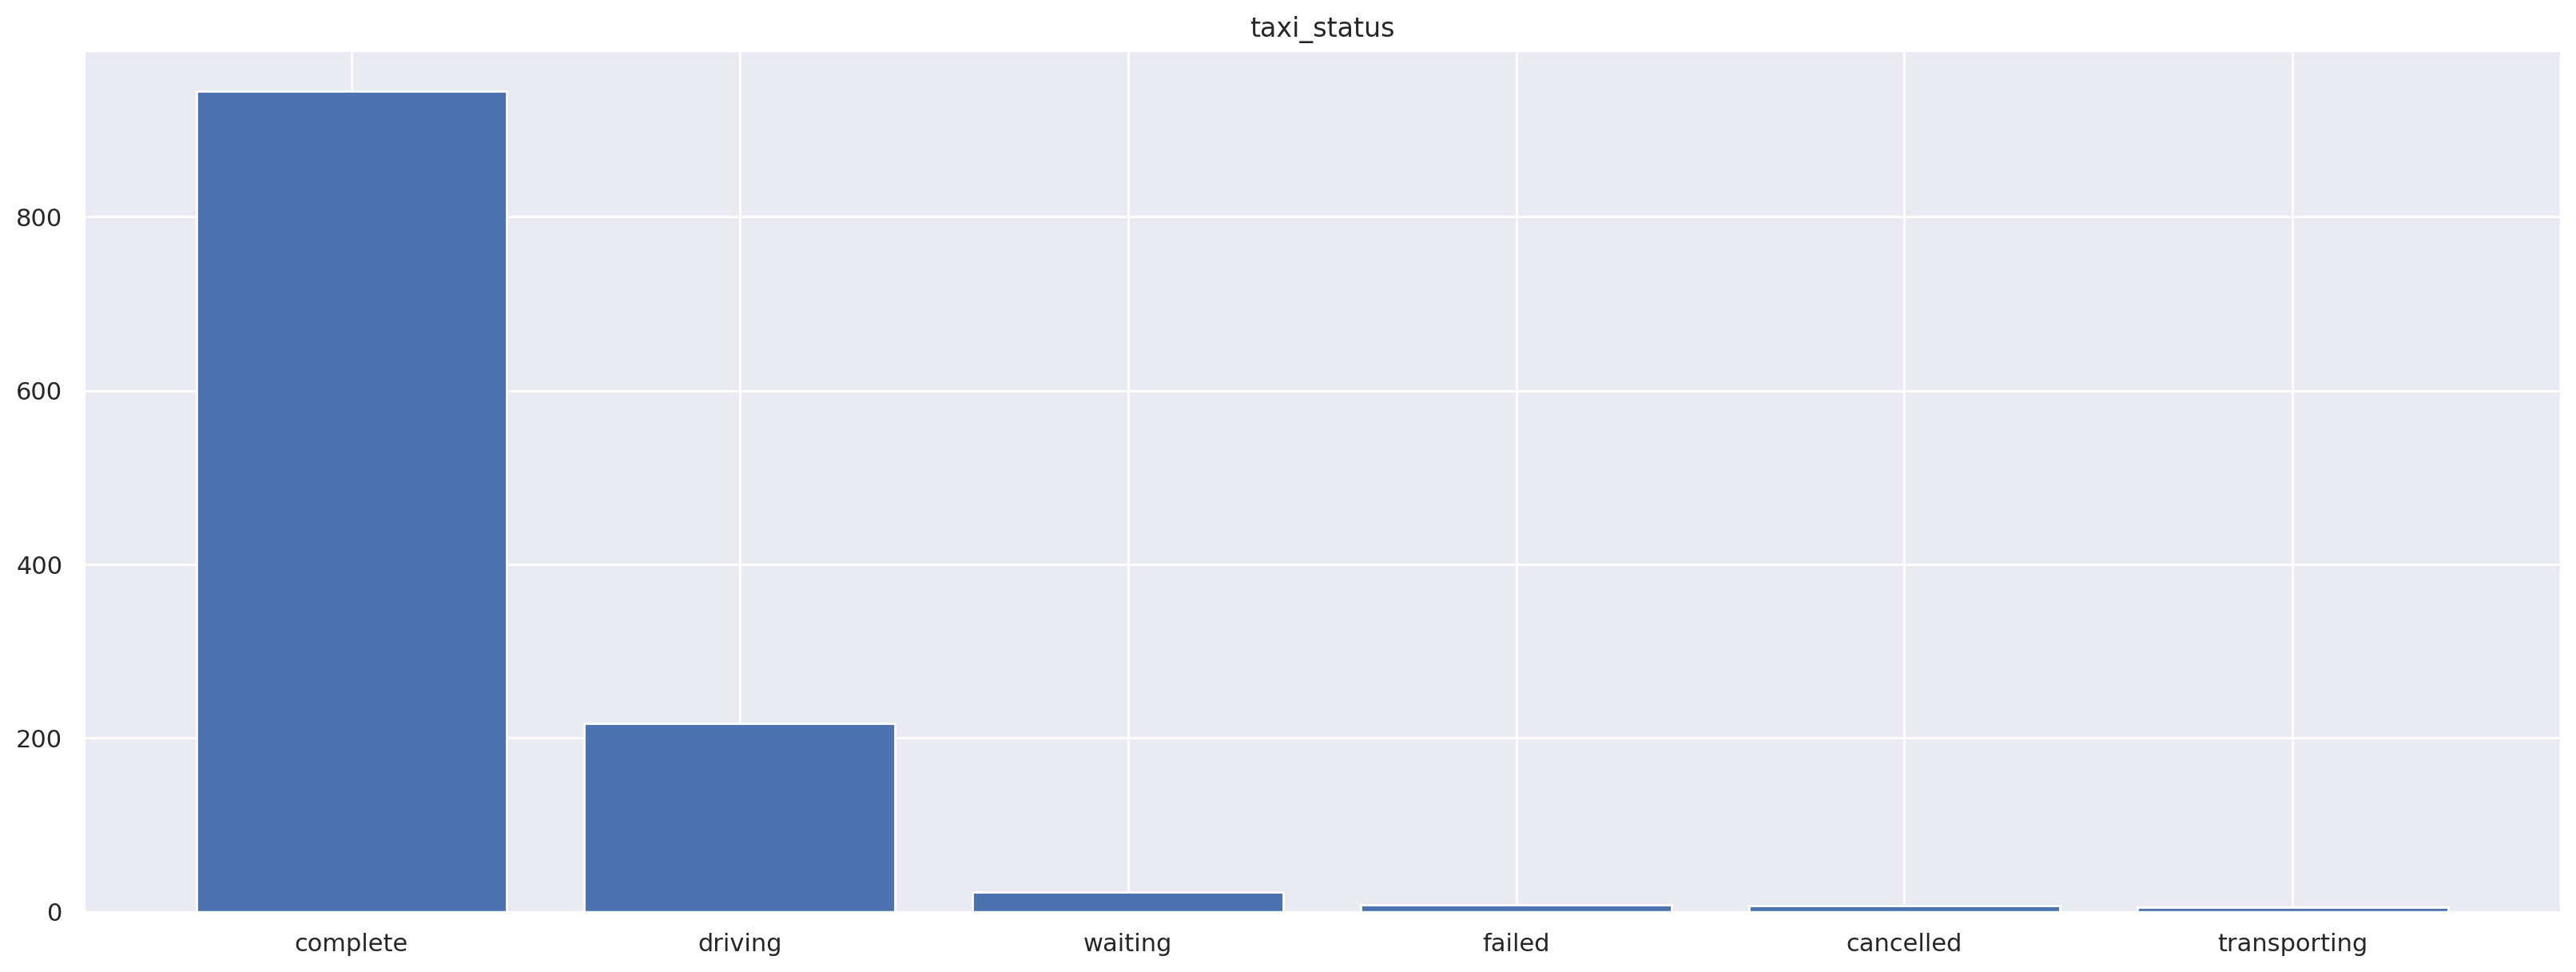

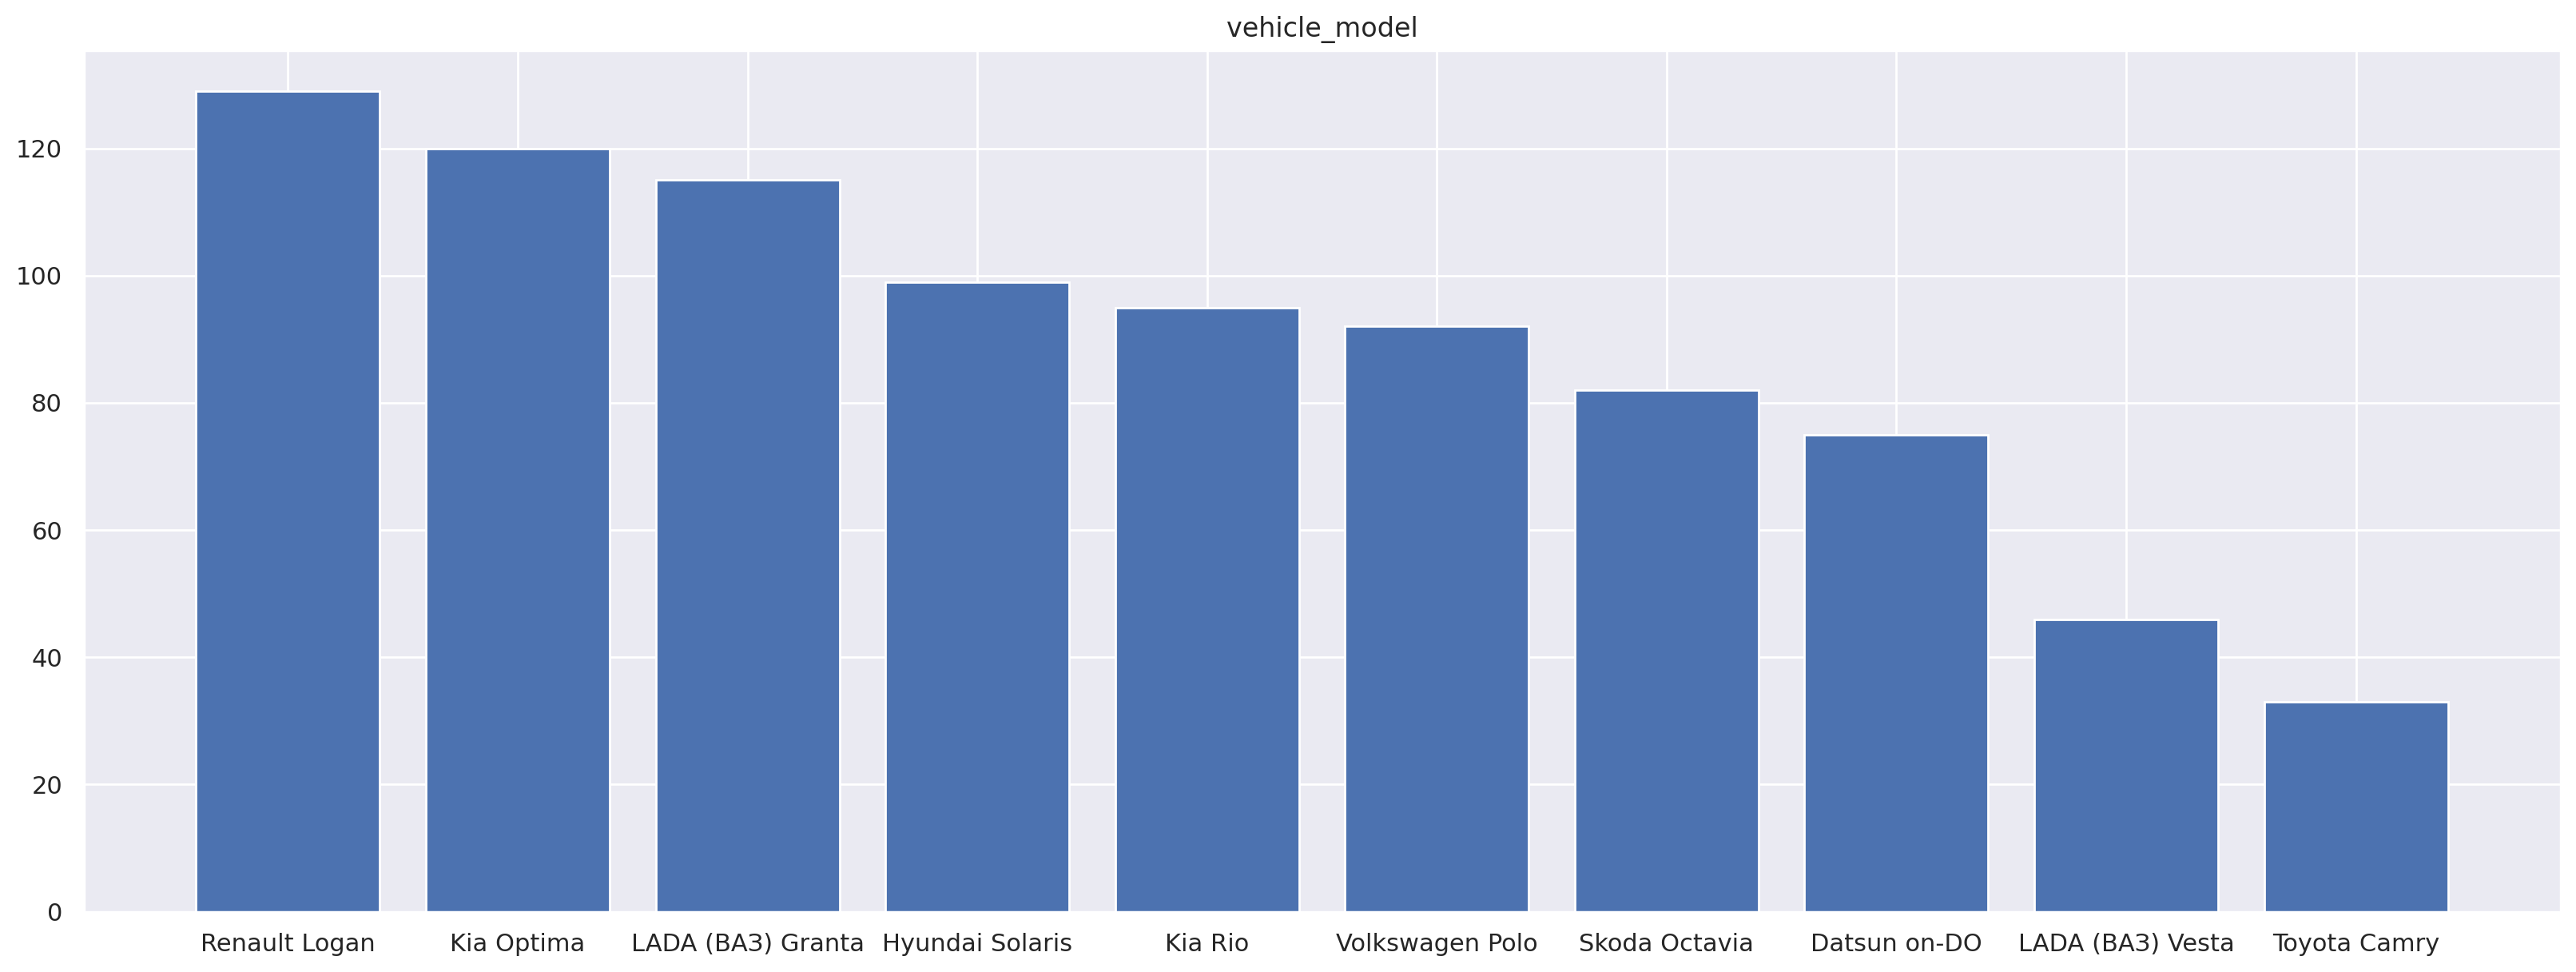

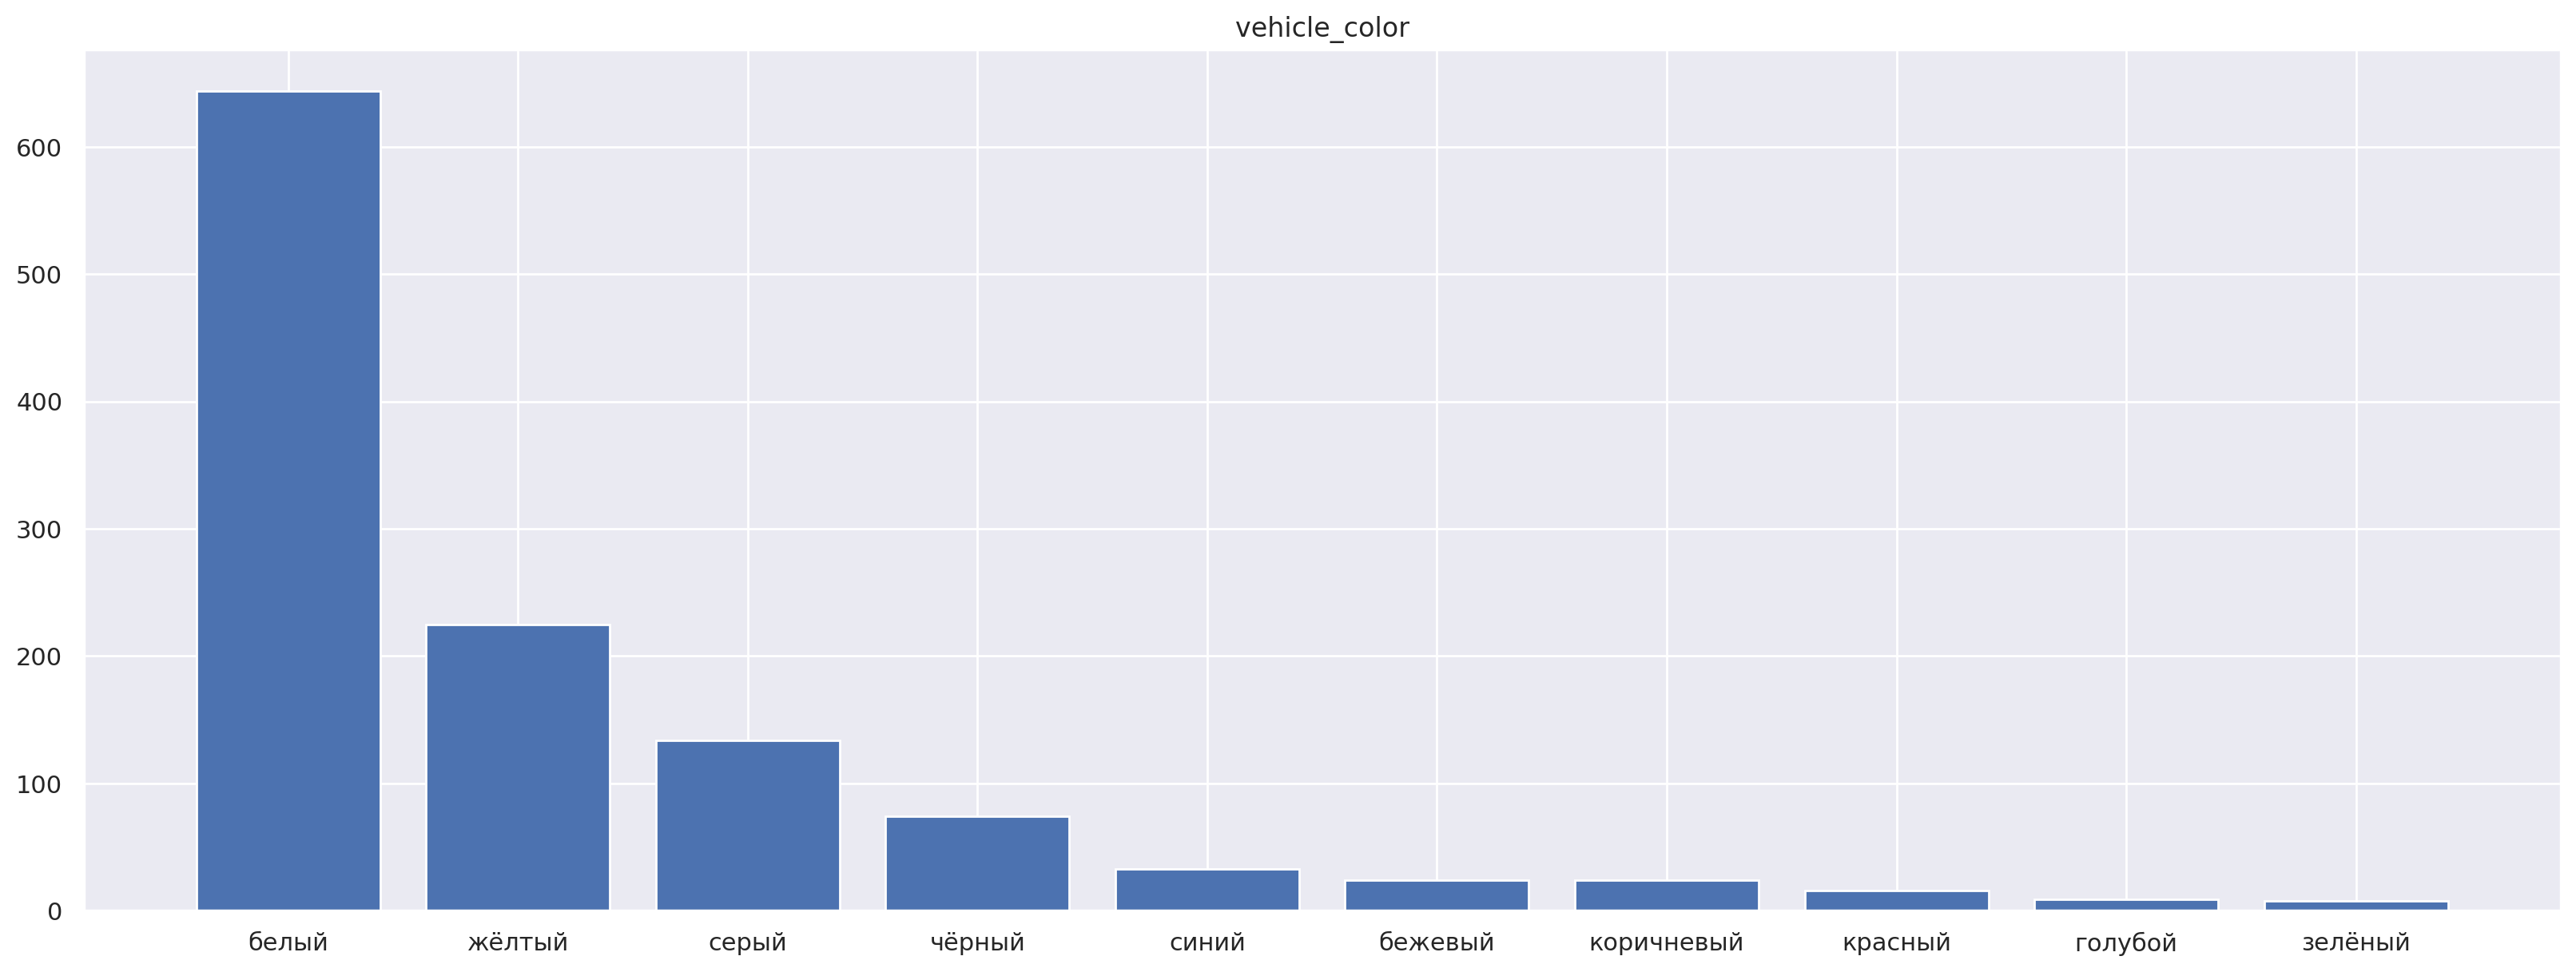

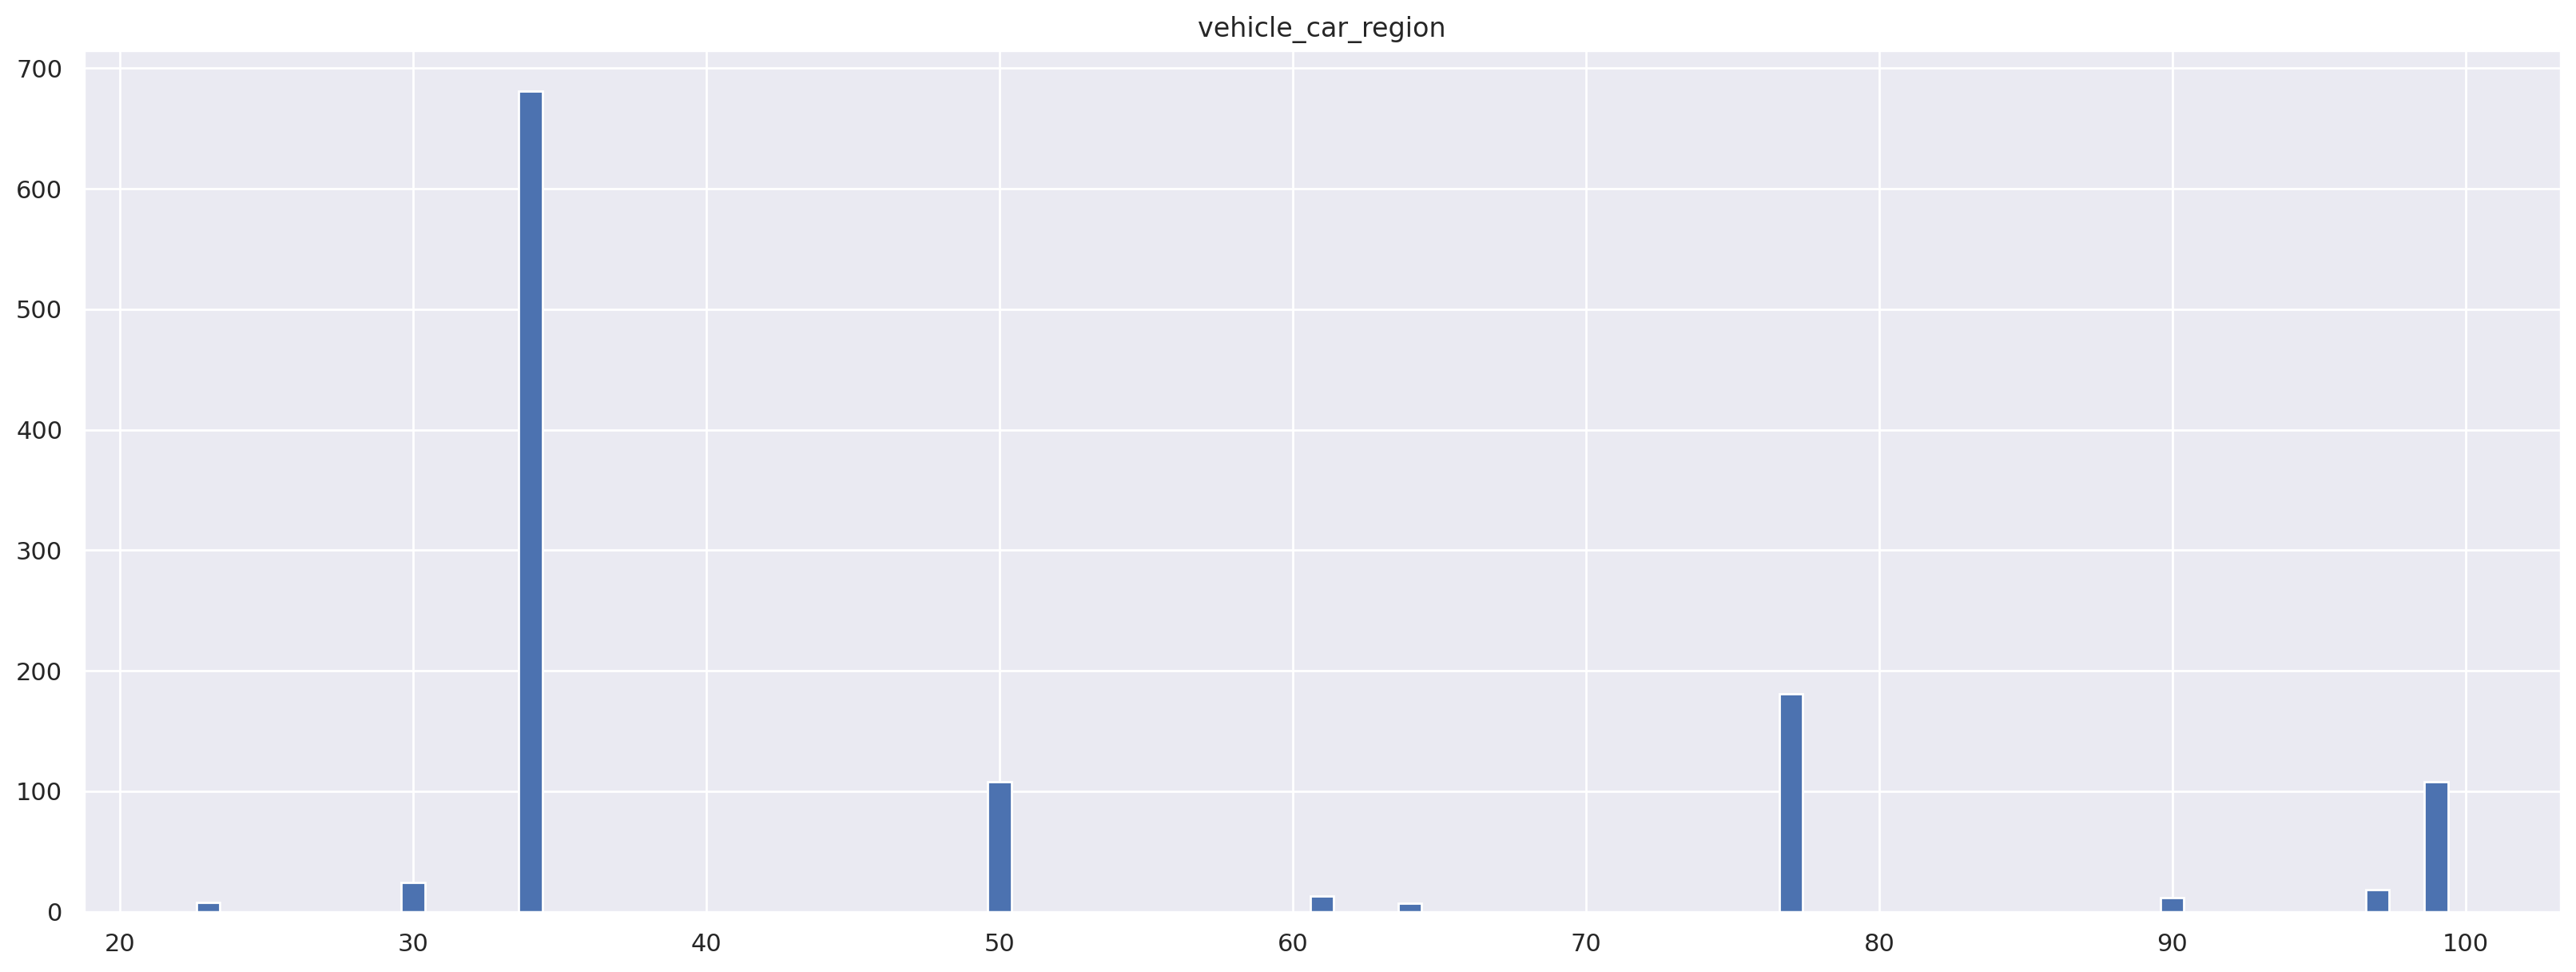

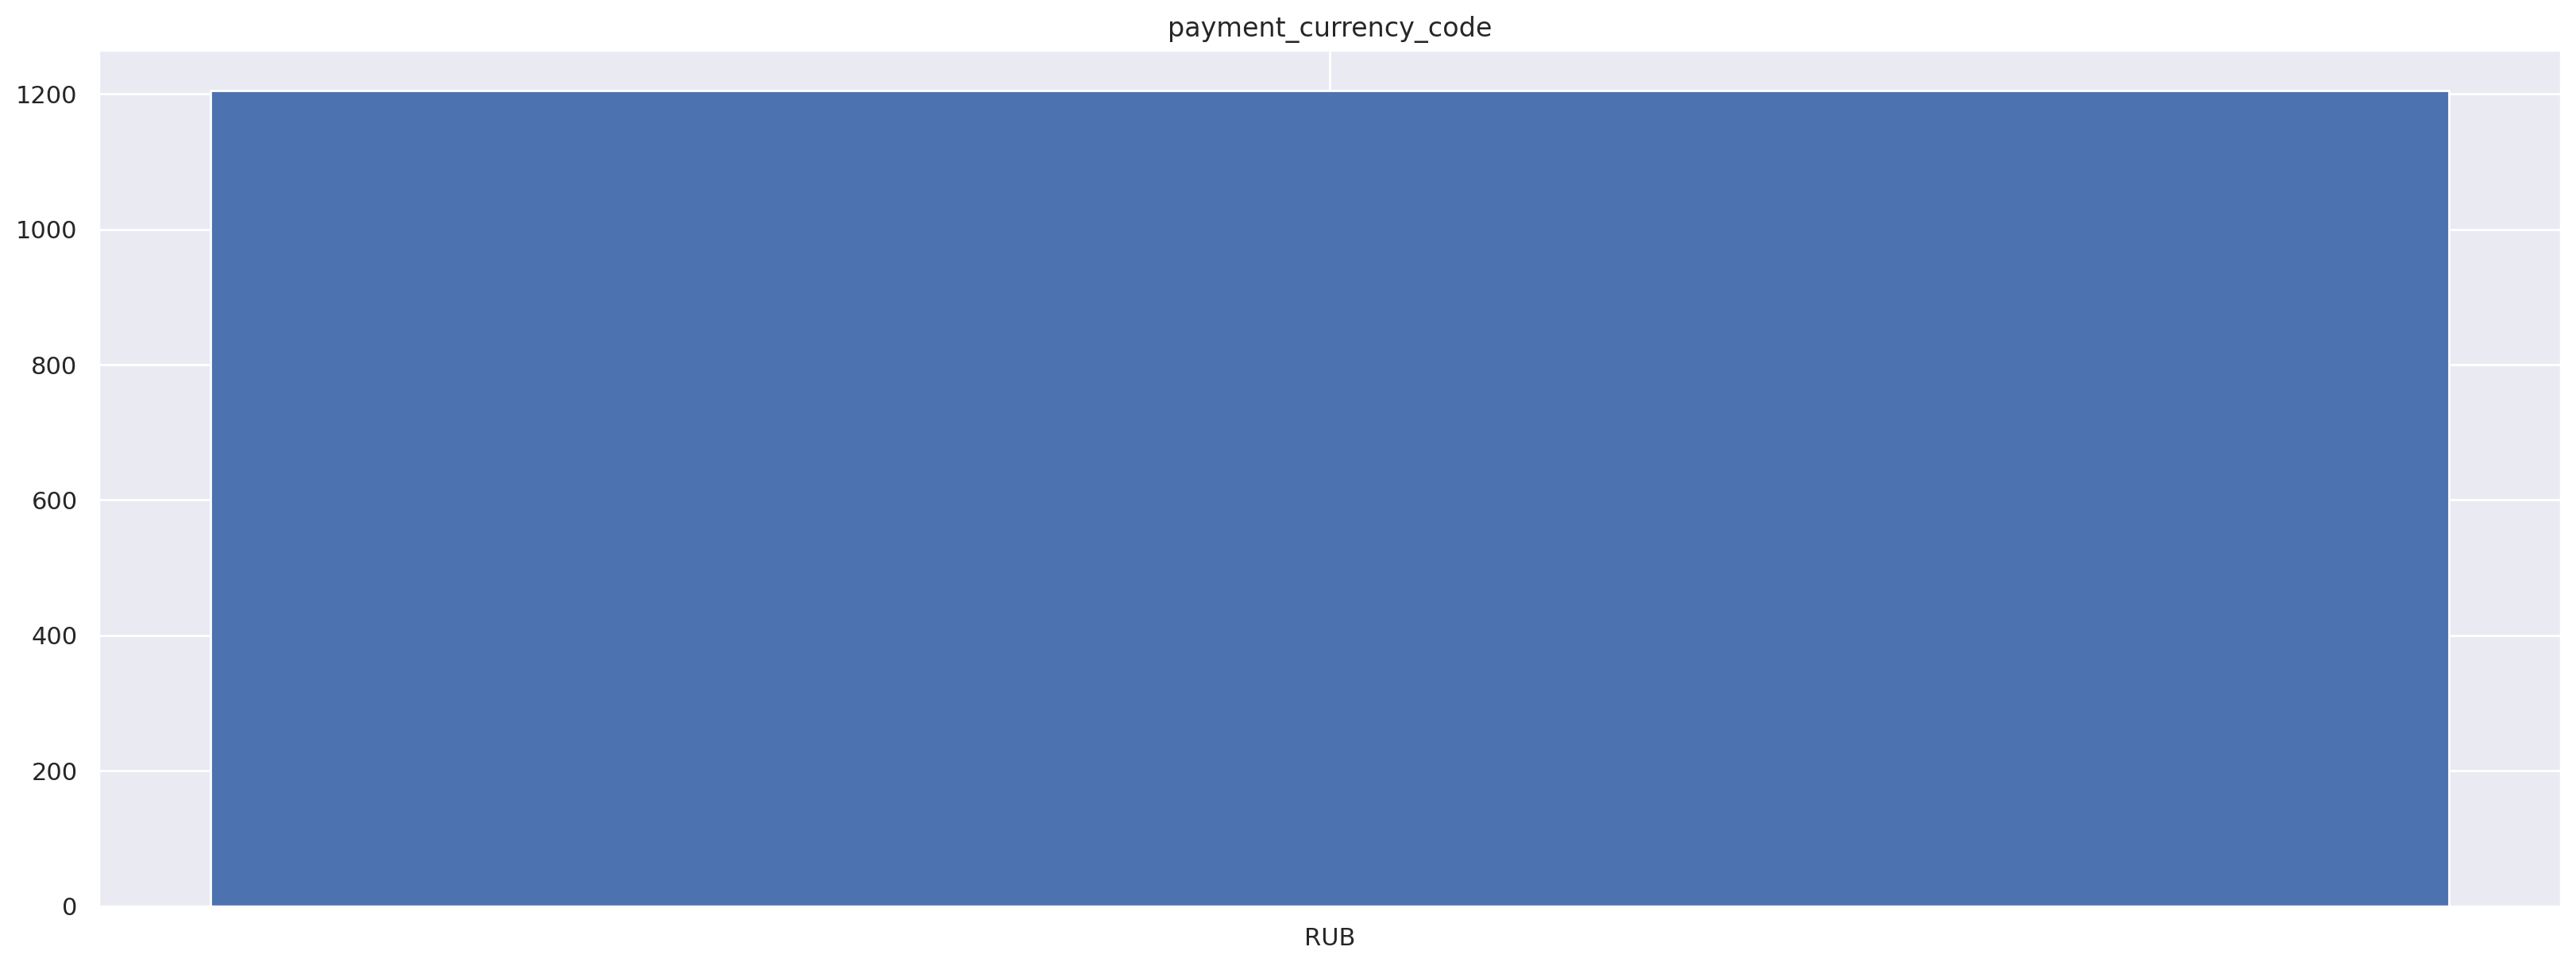

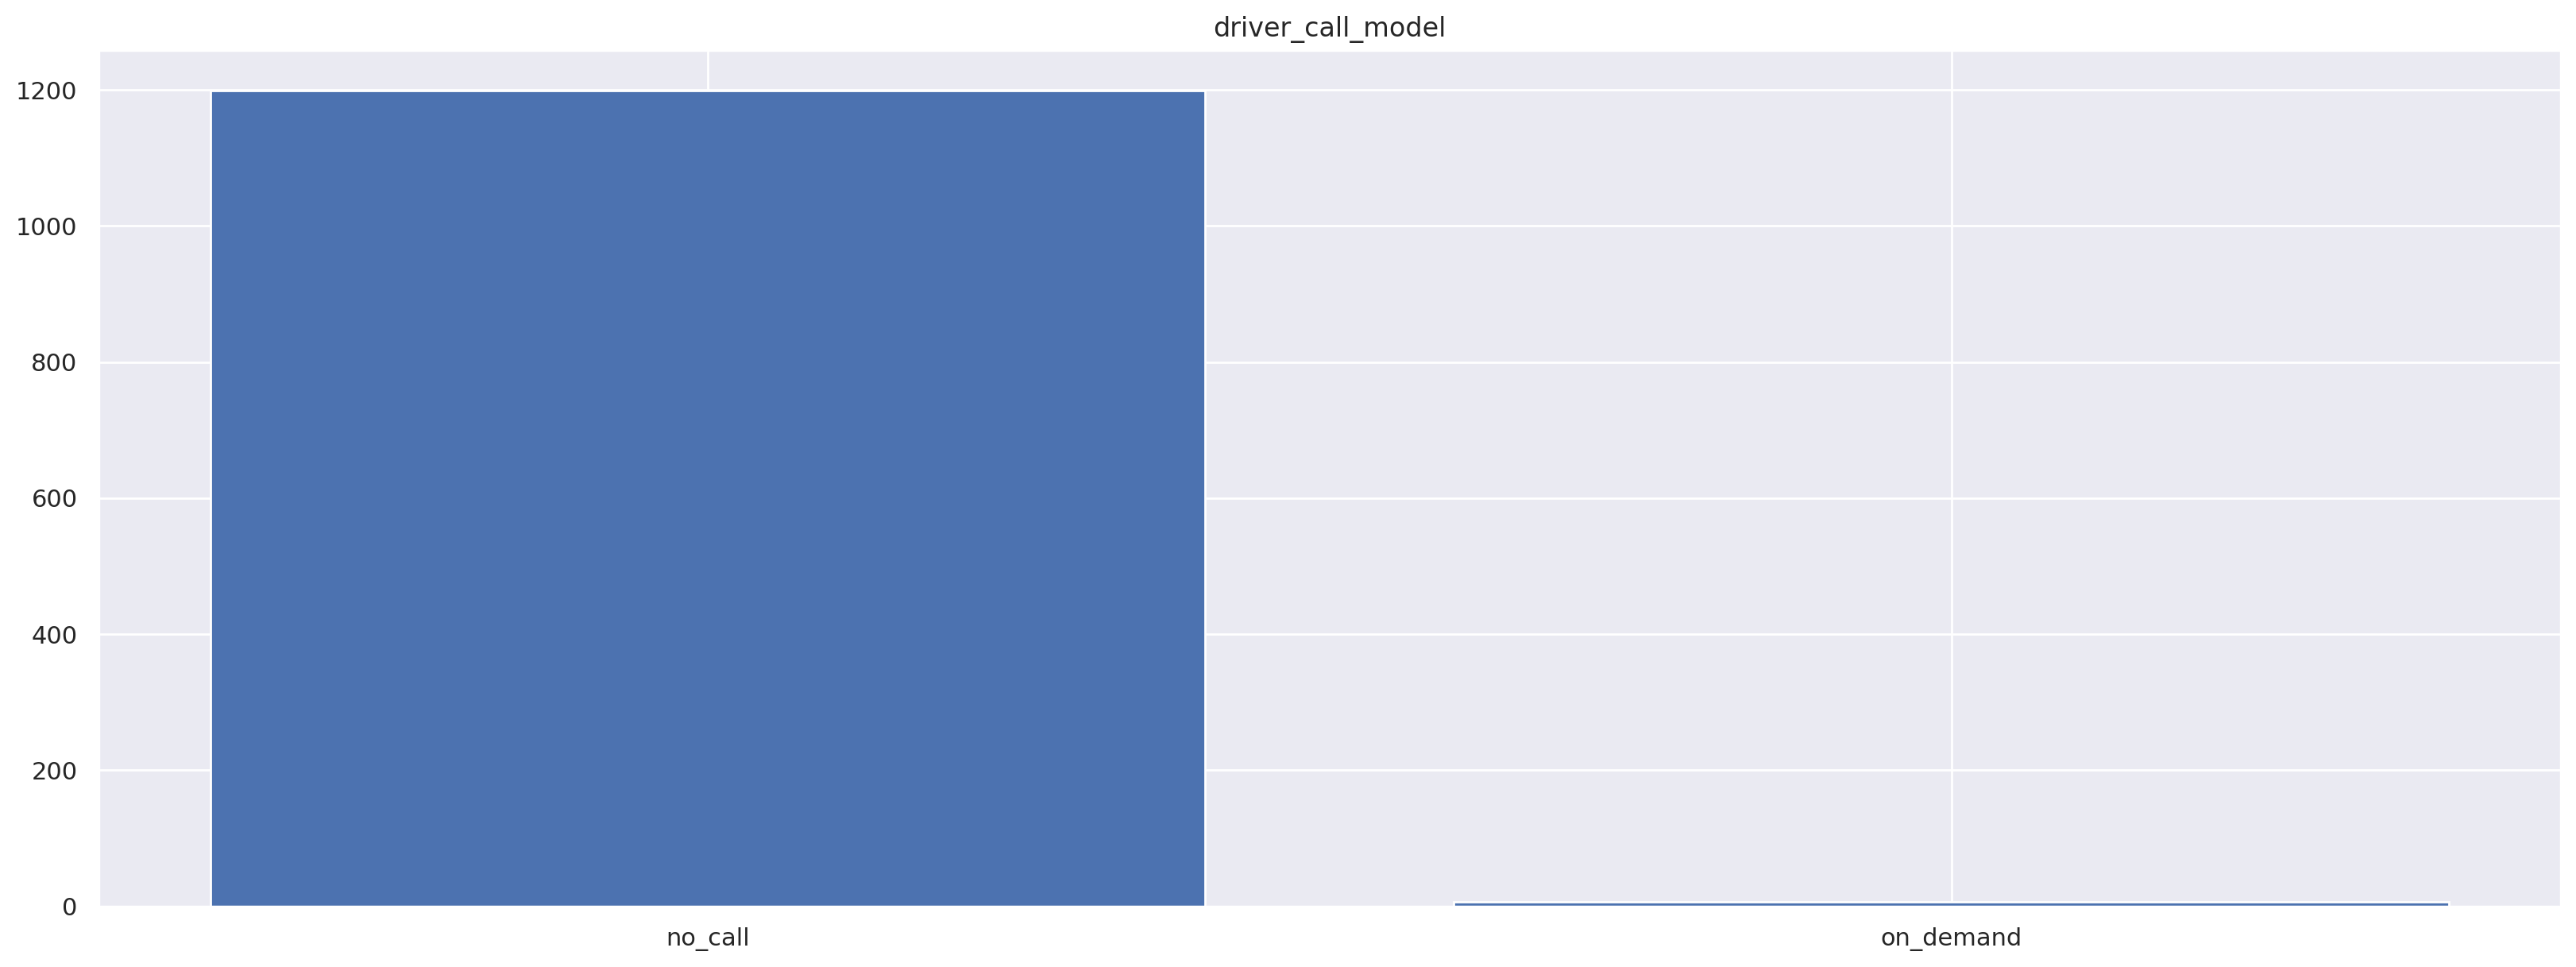

In [8]:
barplots()

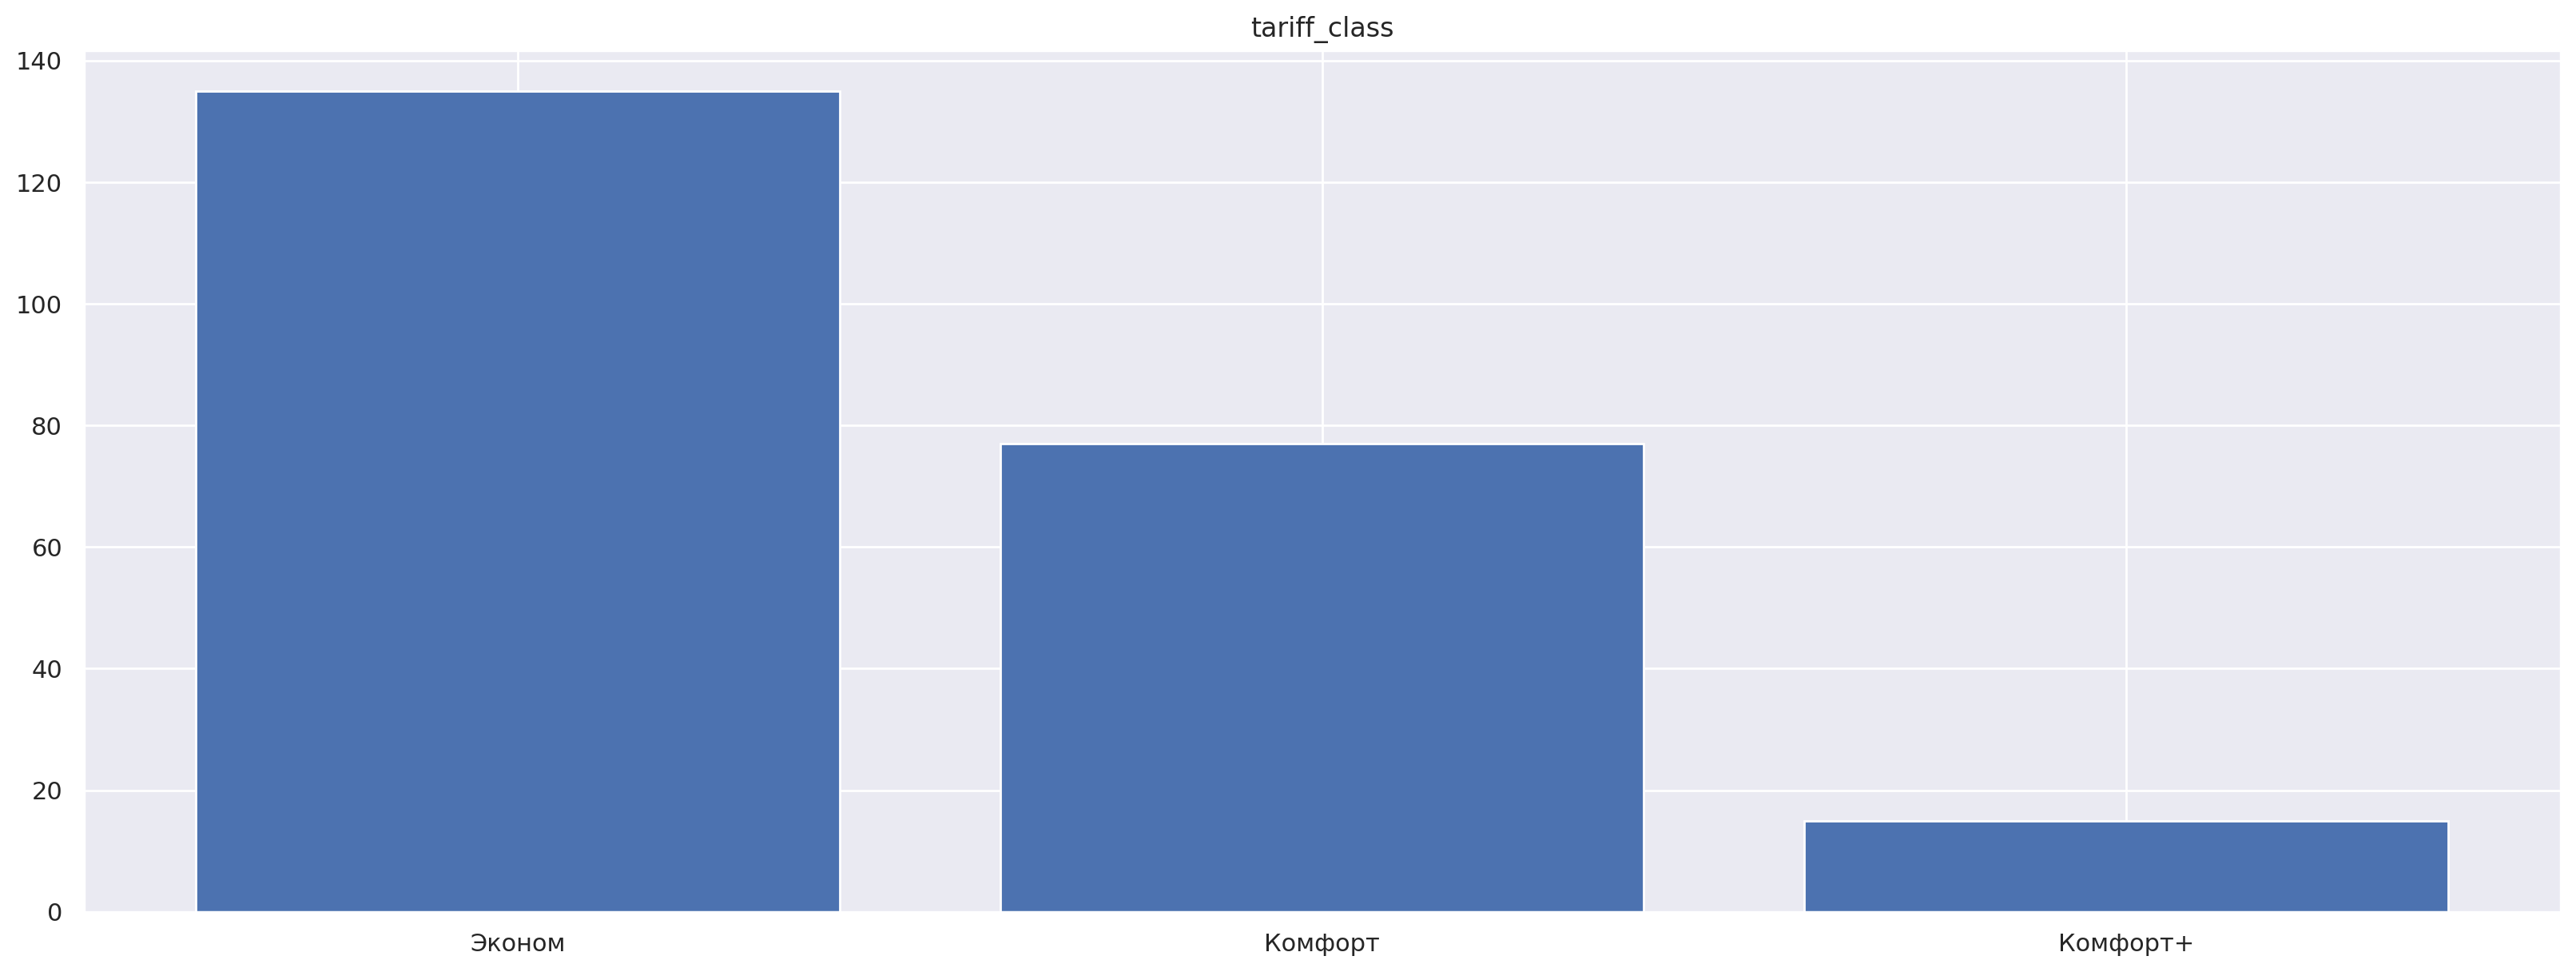

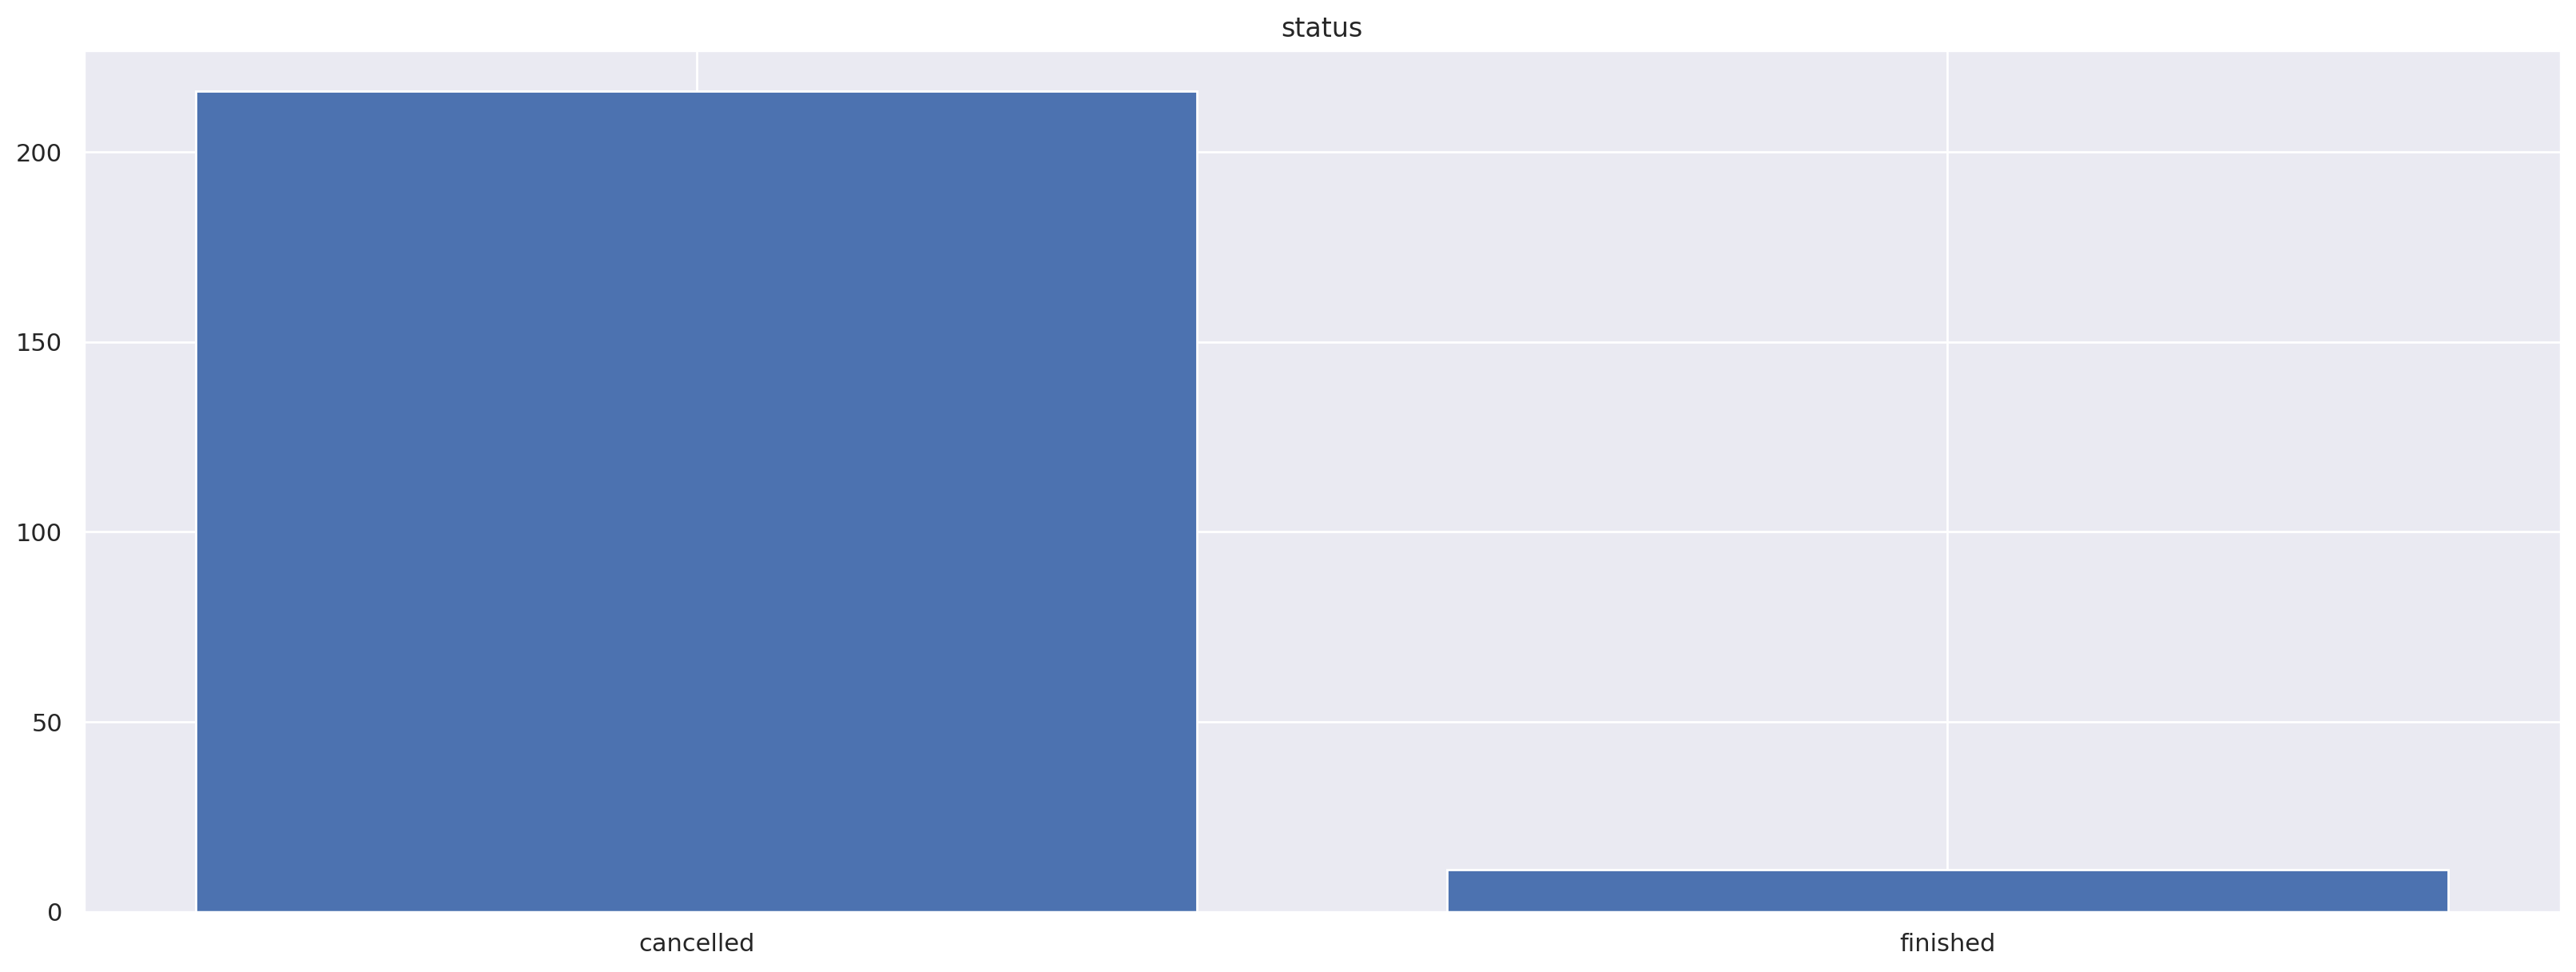

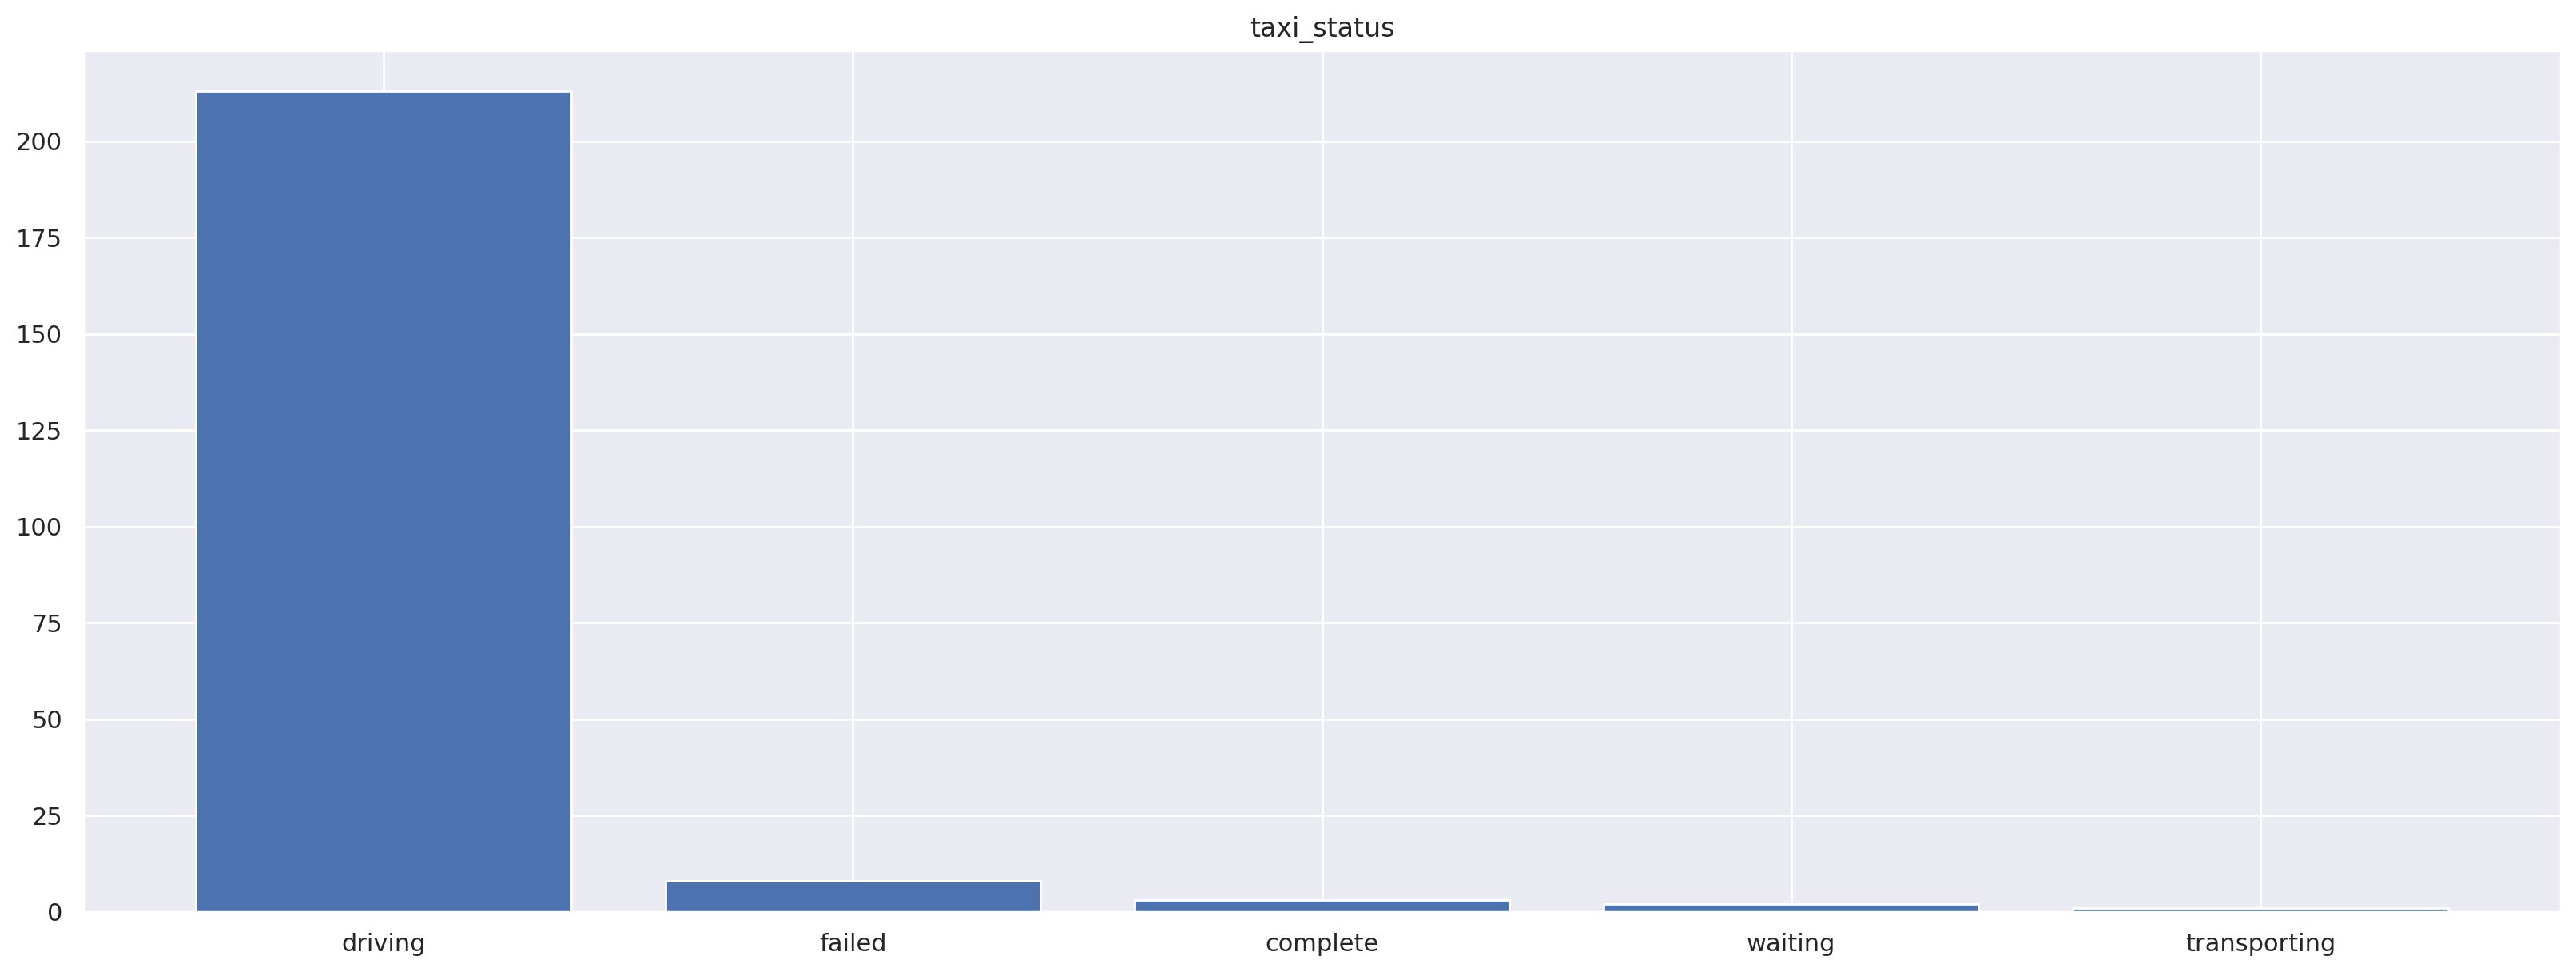

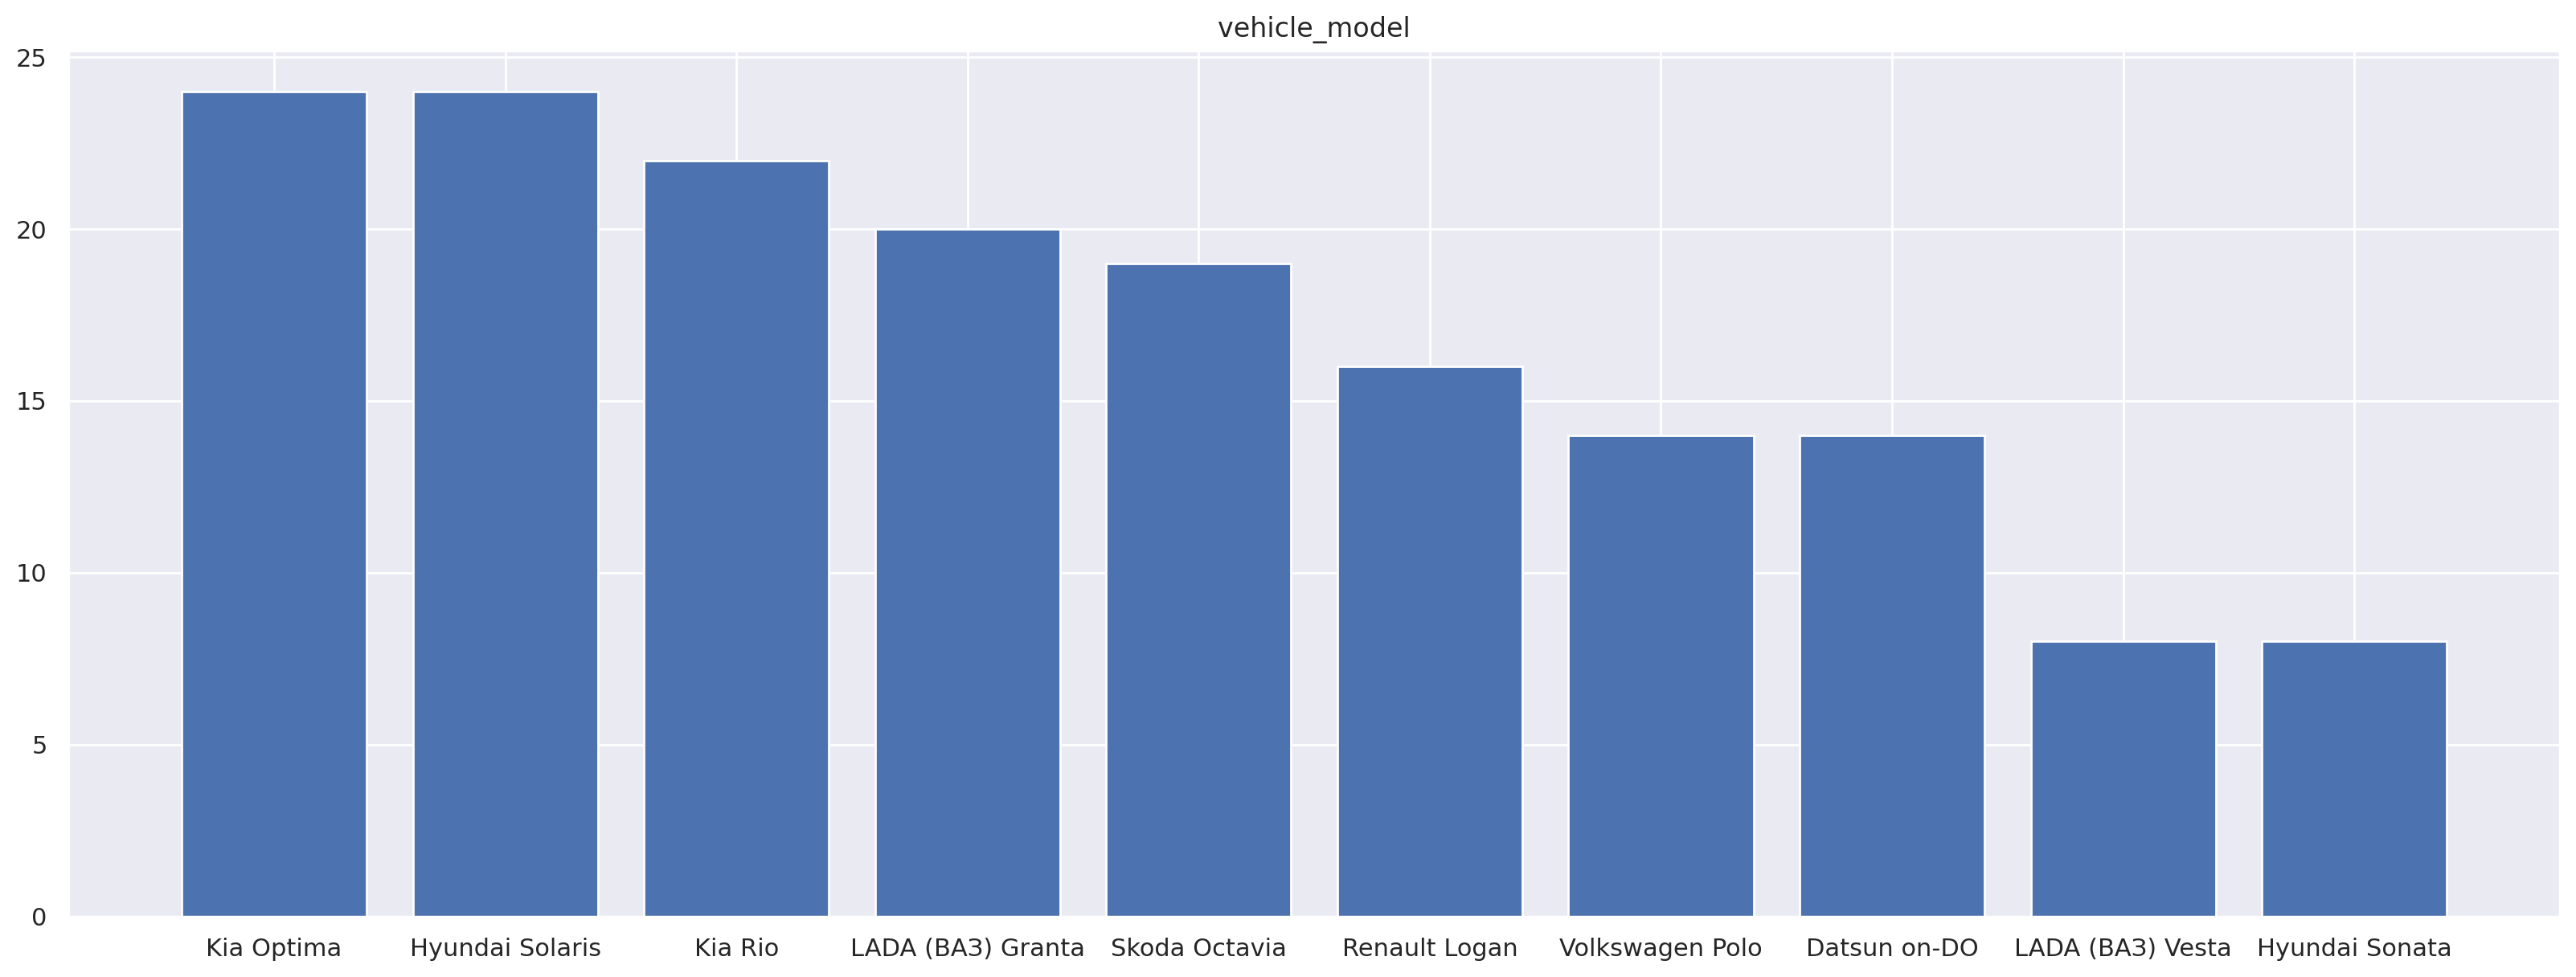

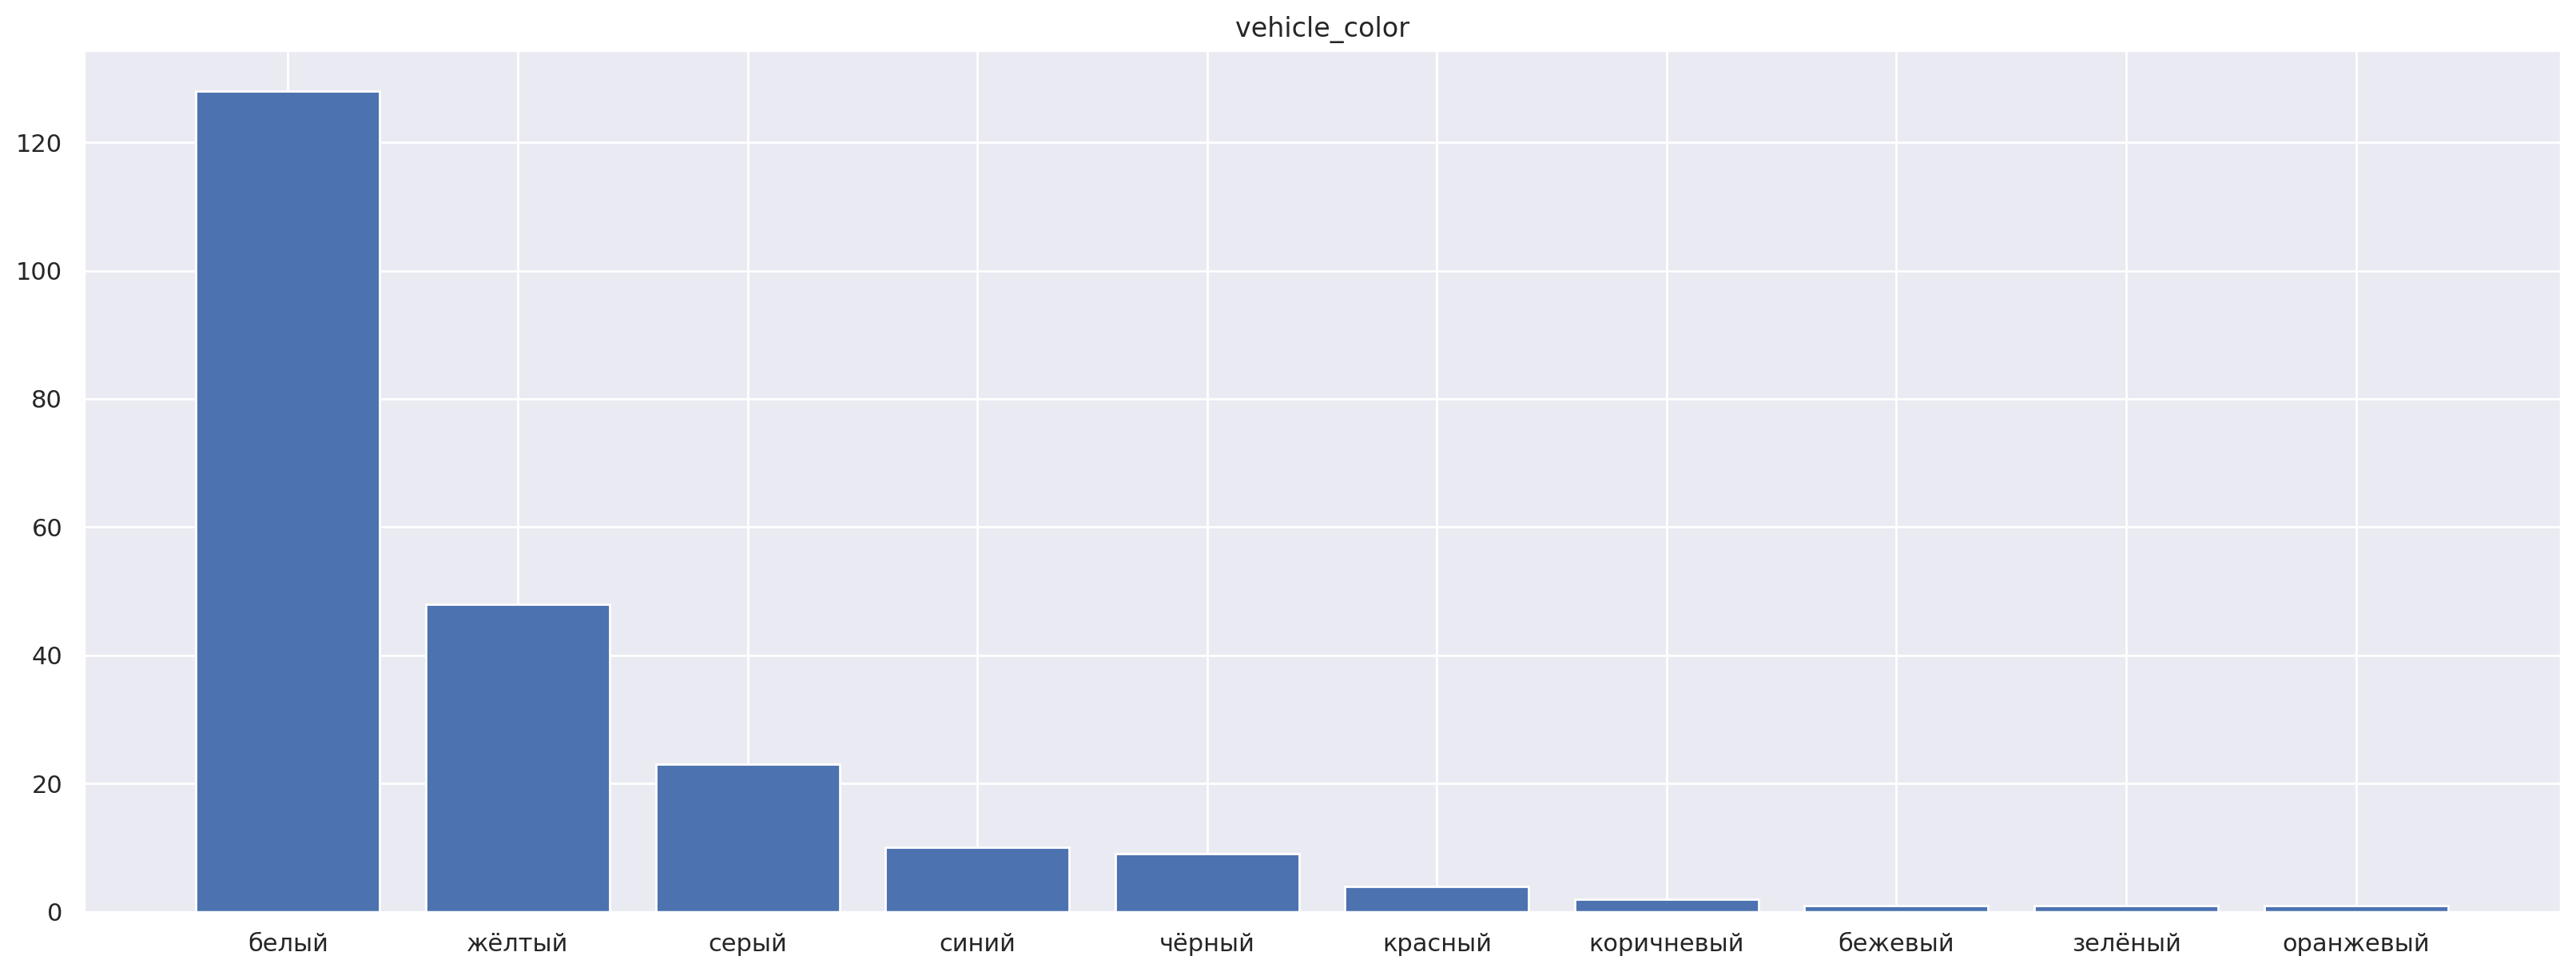

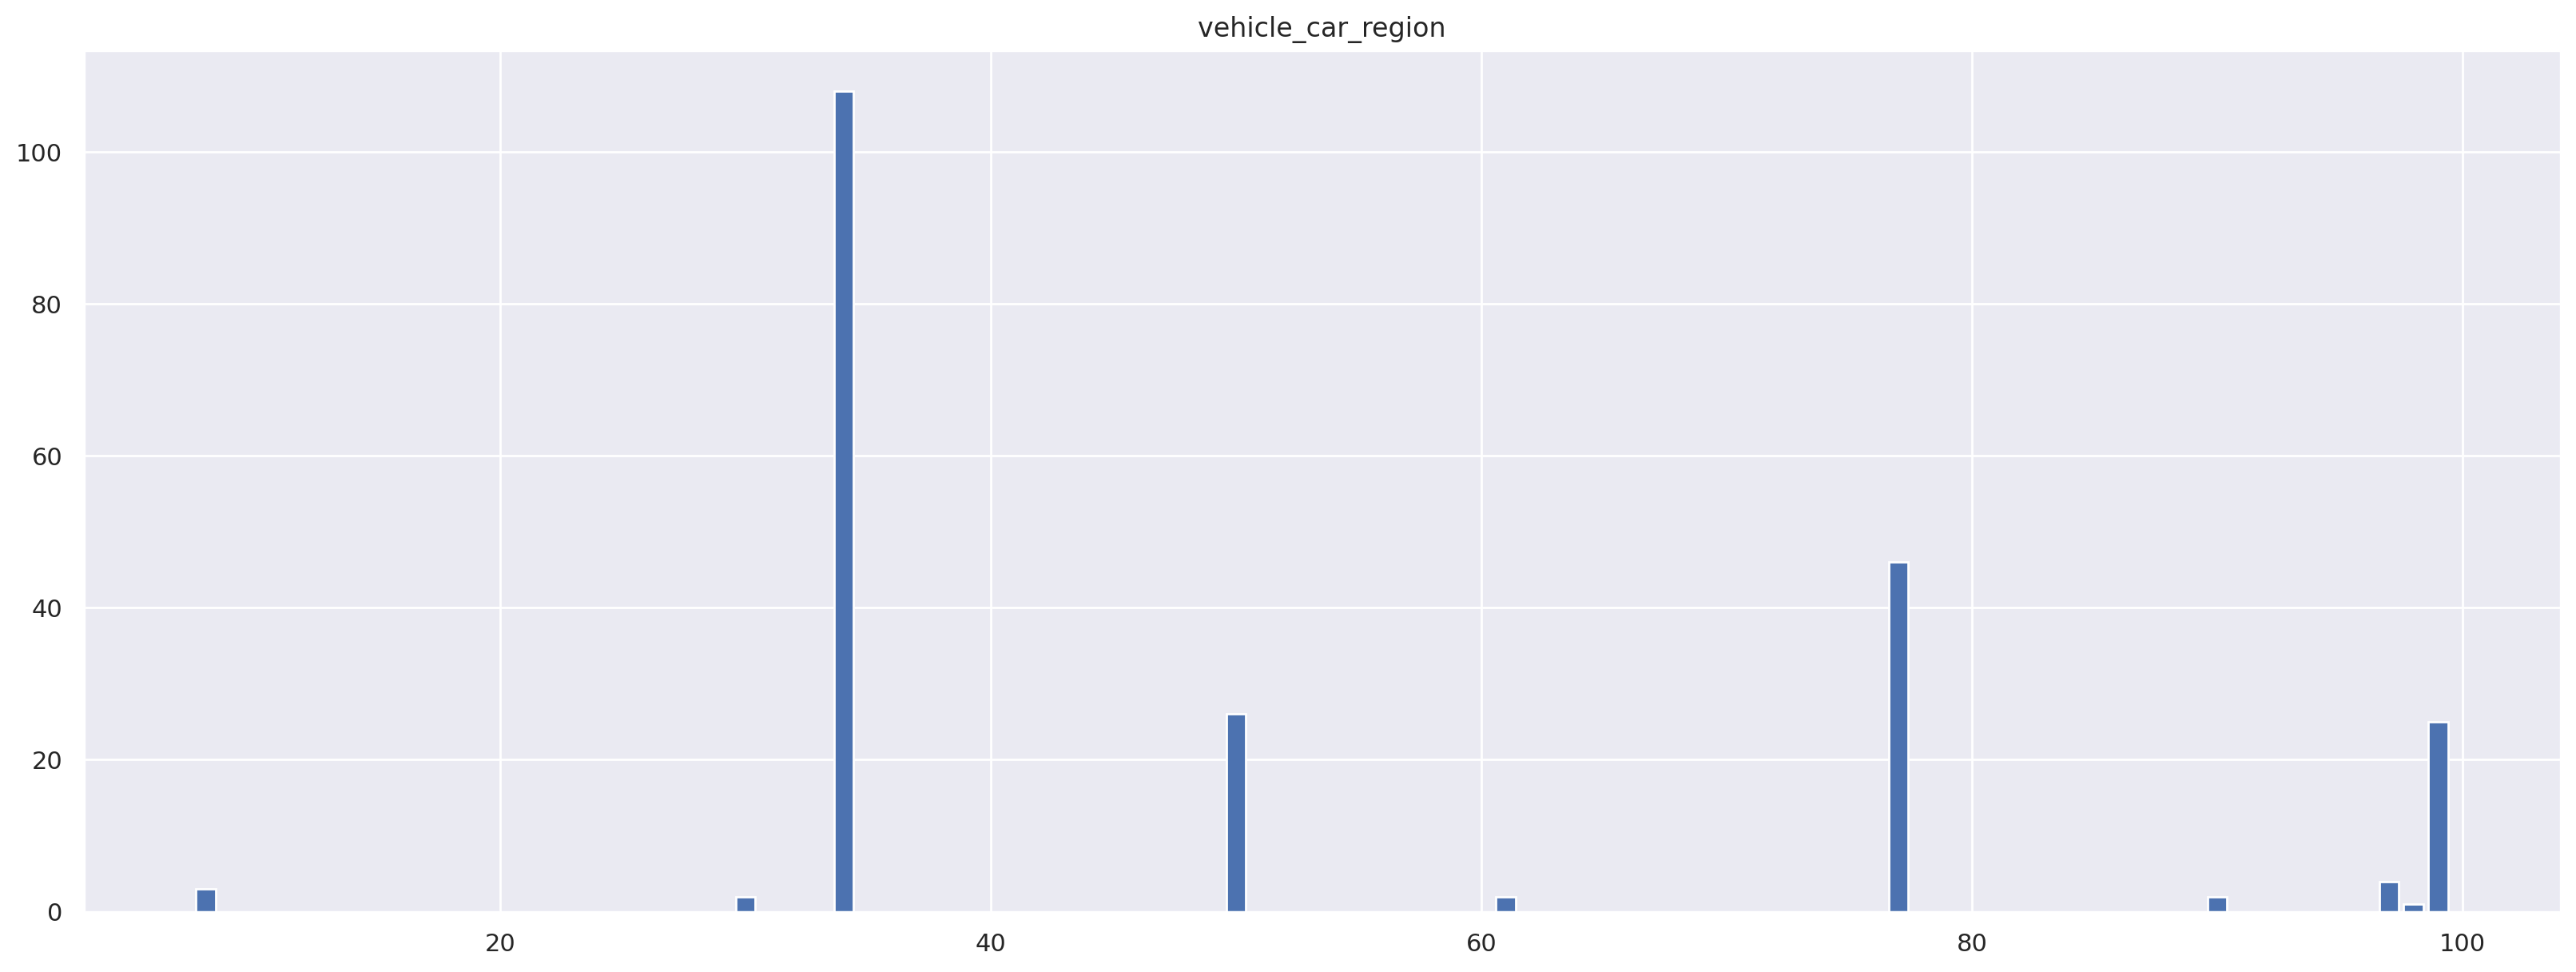

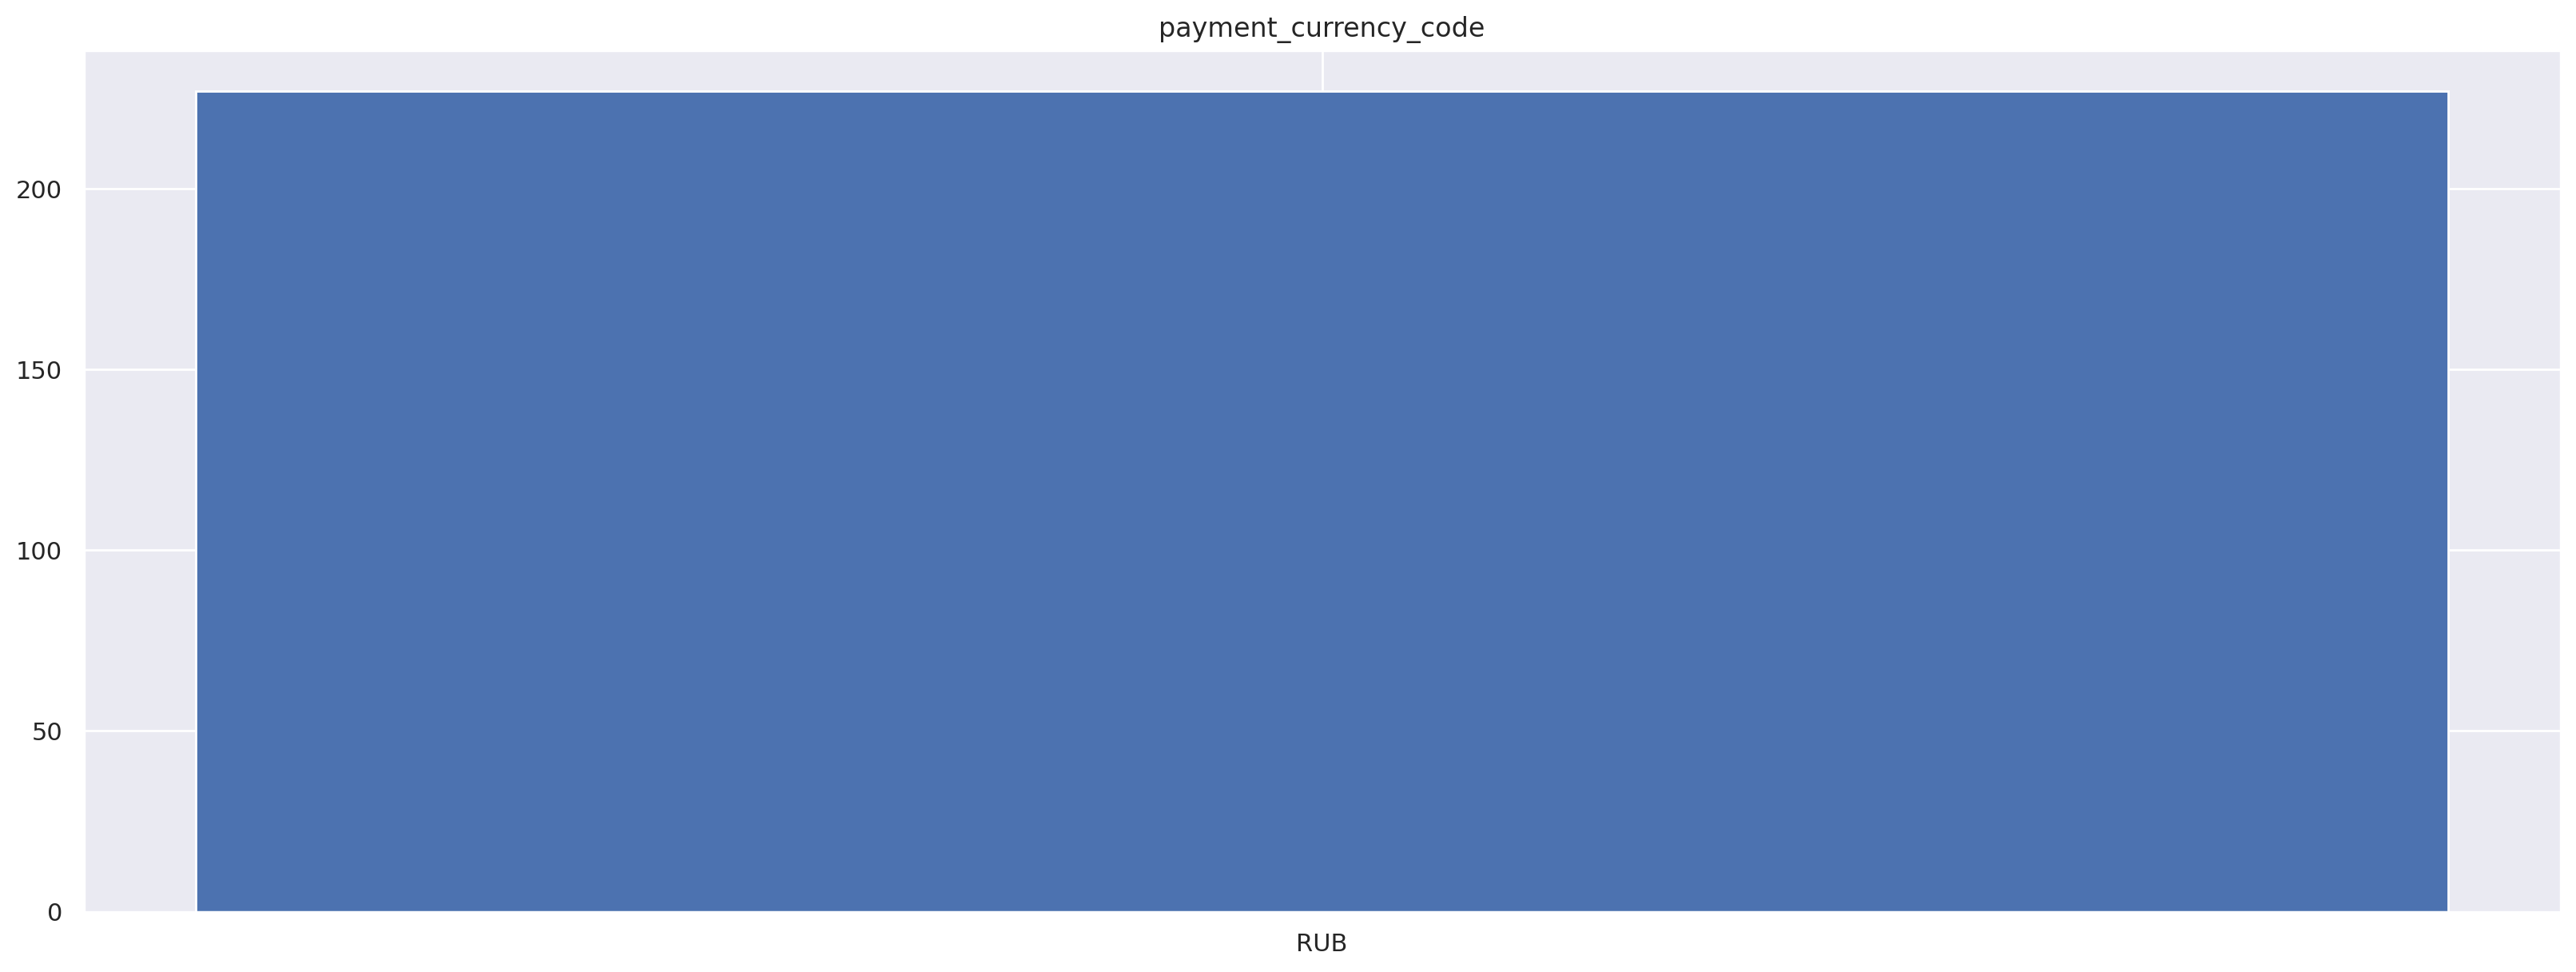

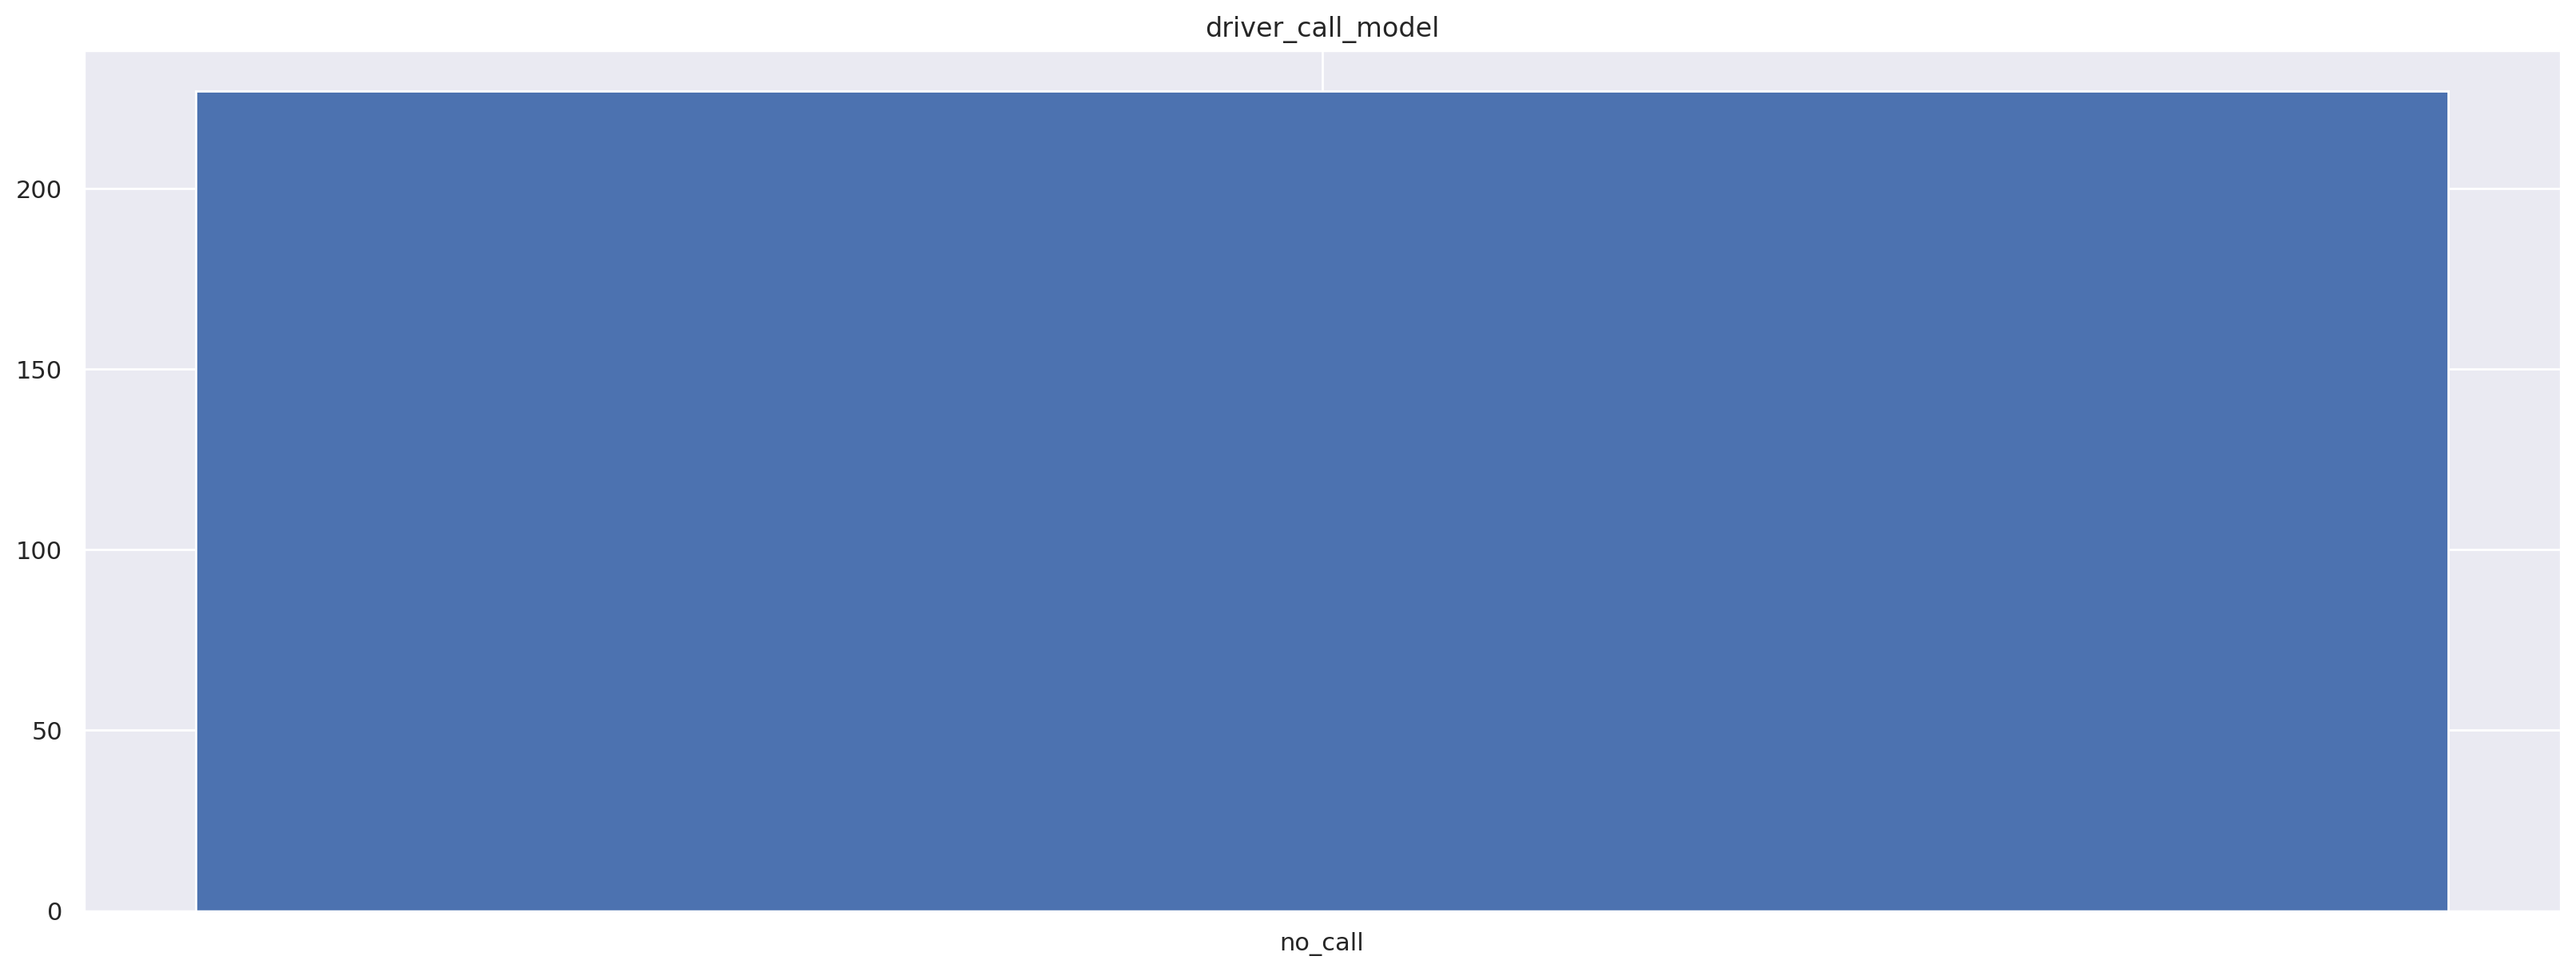

In [9]:
barplots(time_ind_df.loc[df['payment_cost']==0])

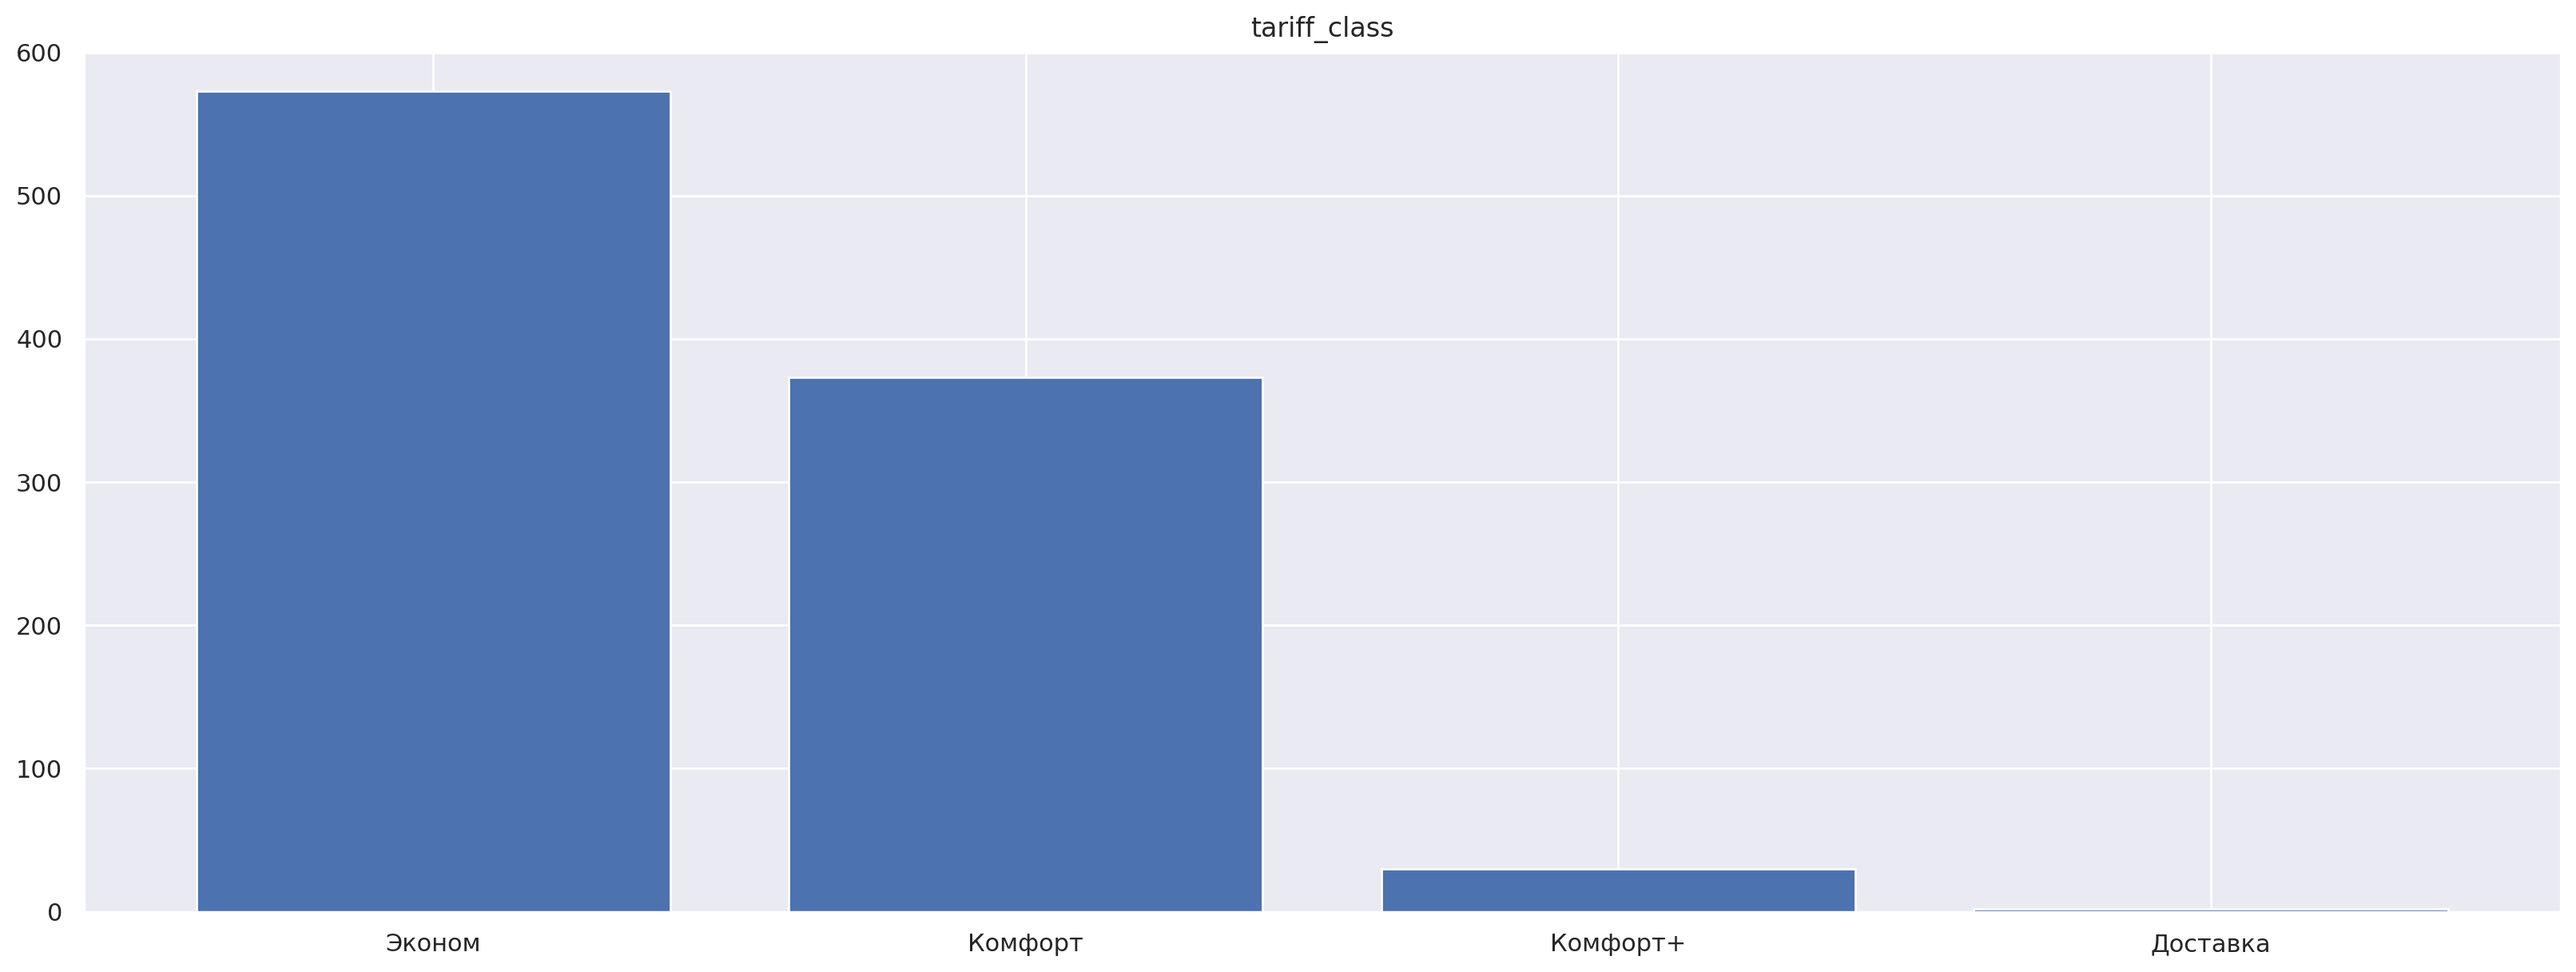

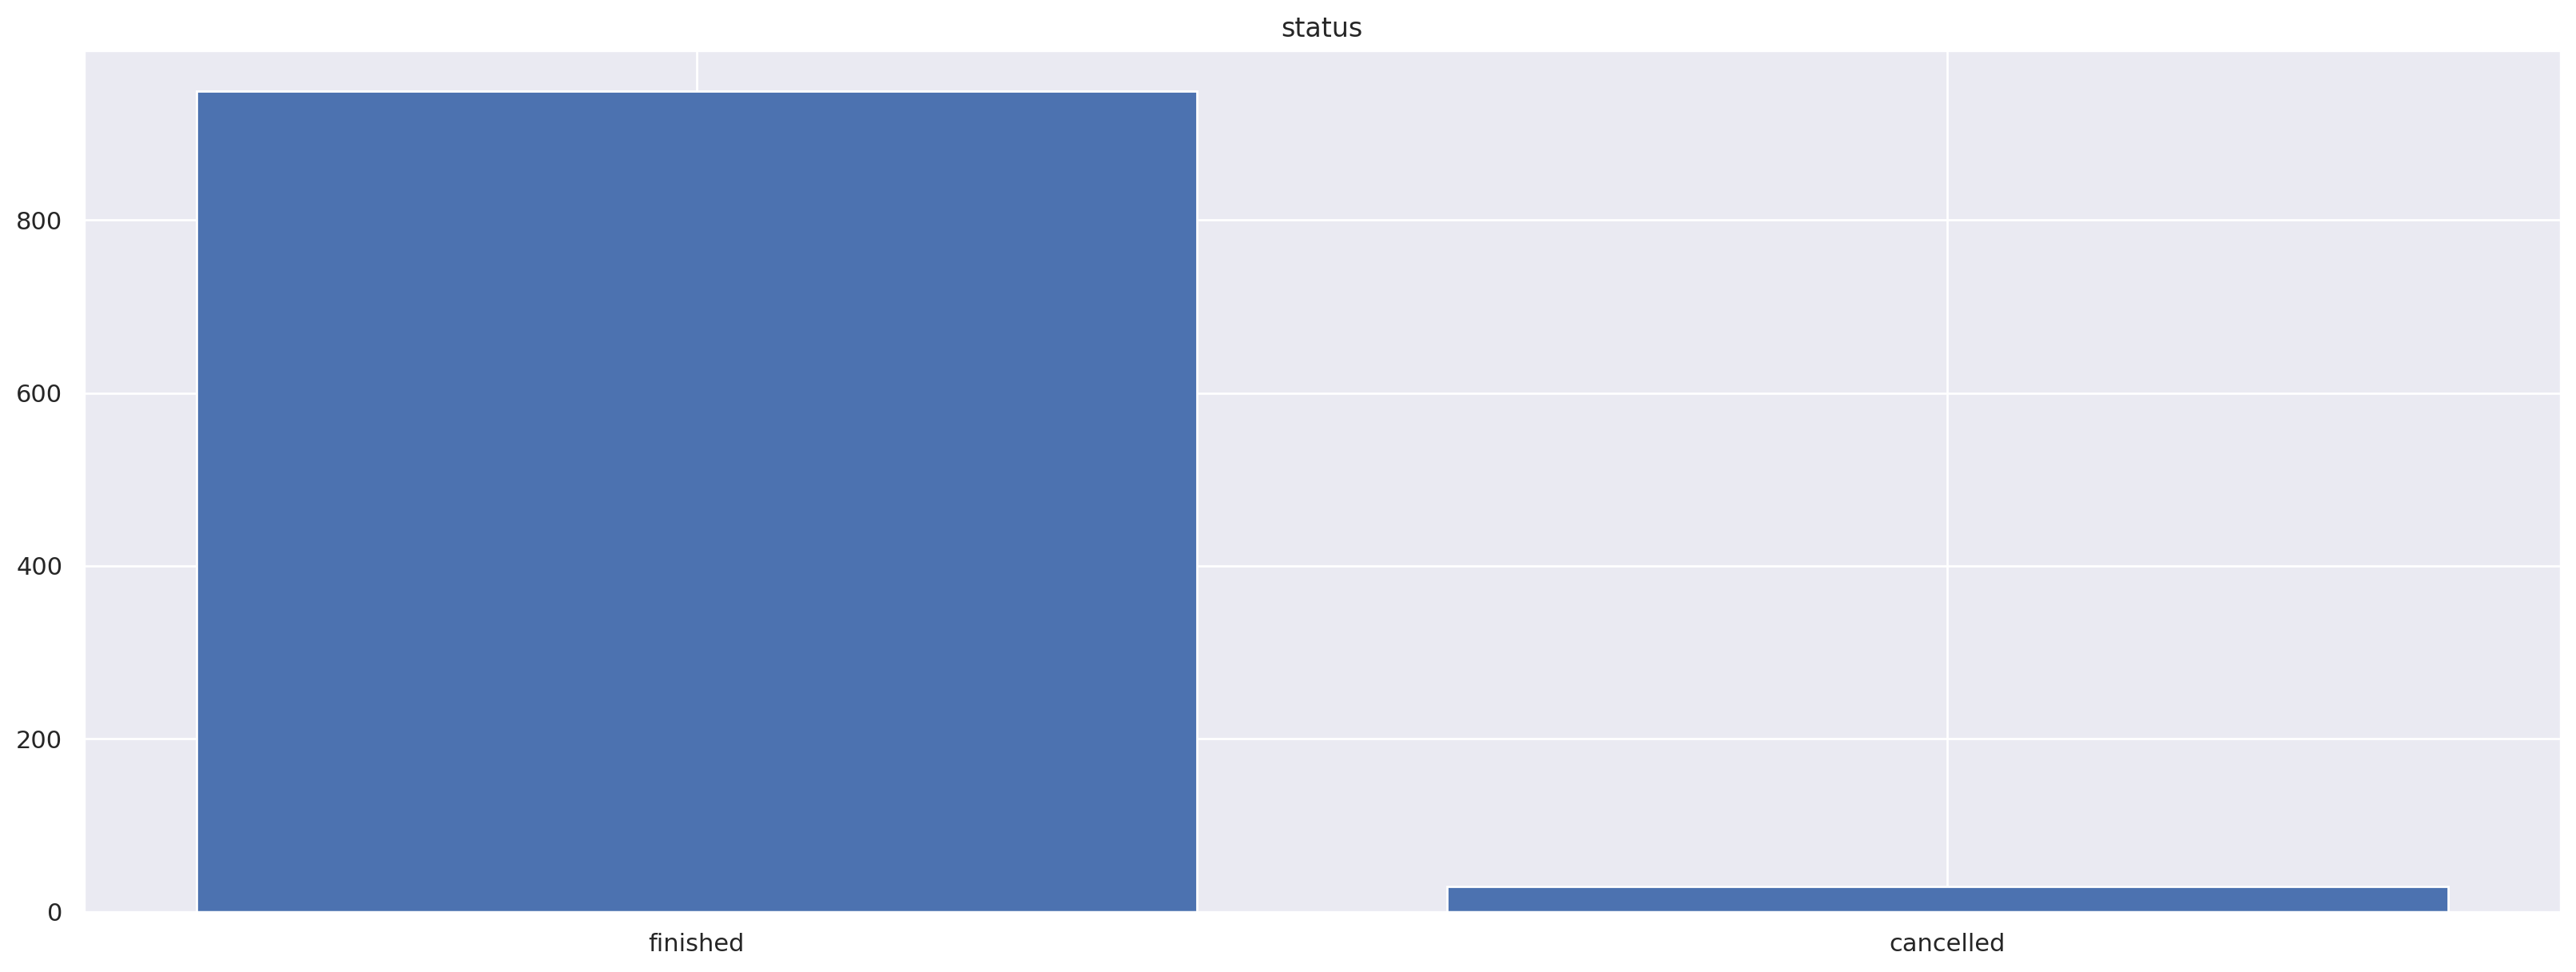

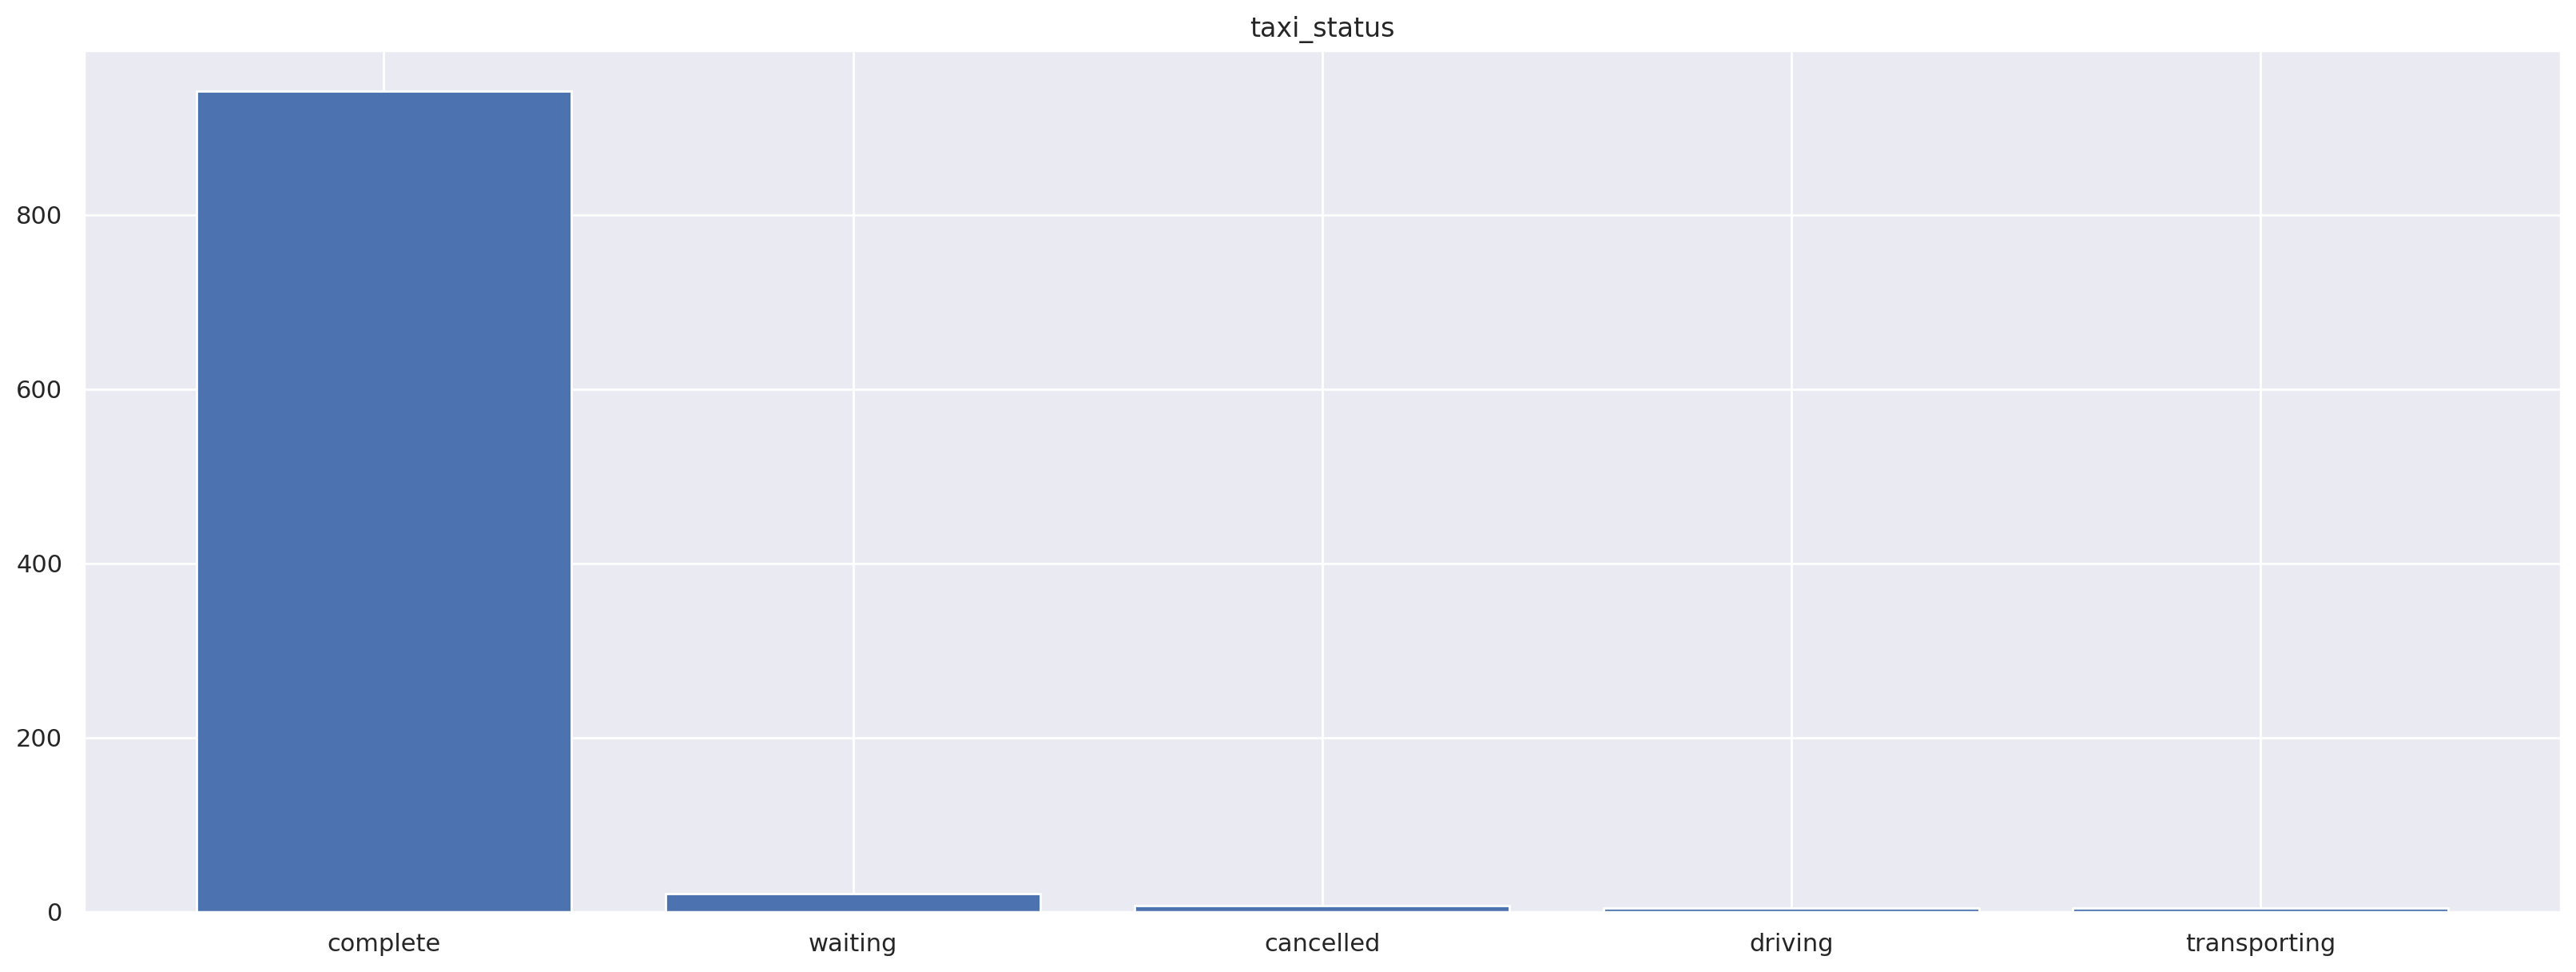

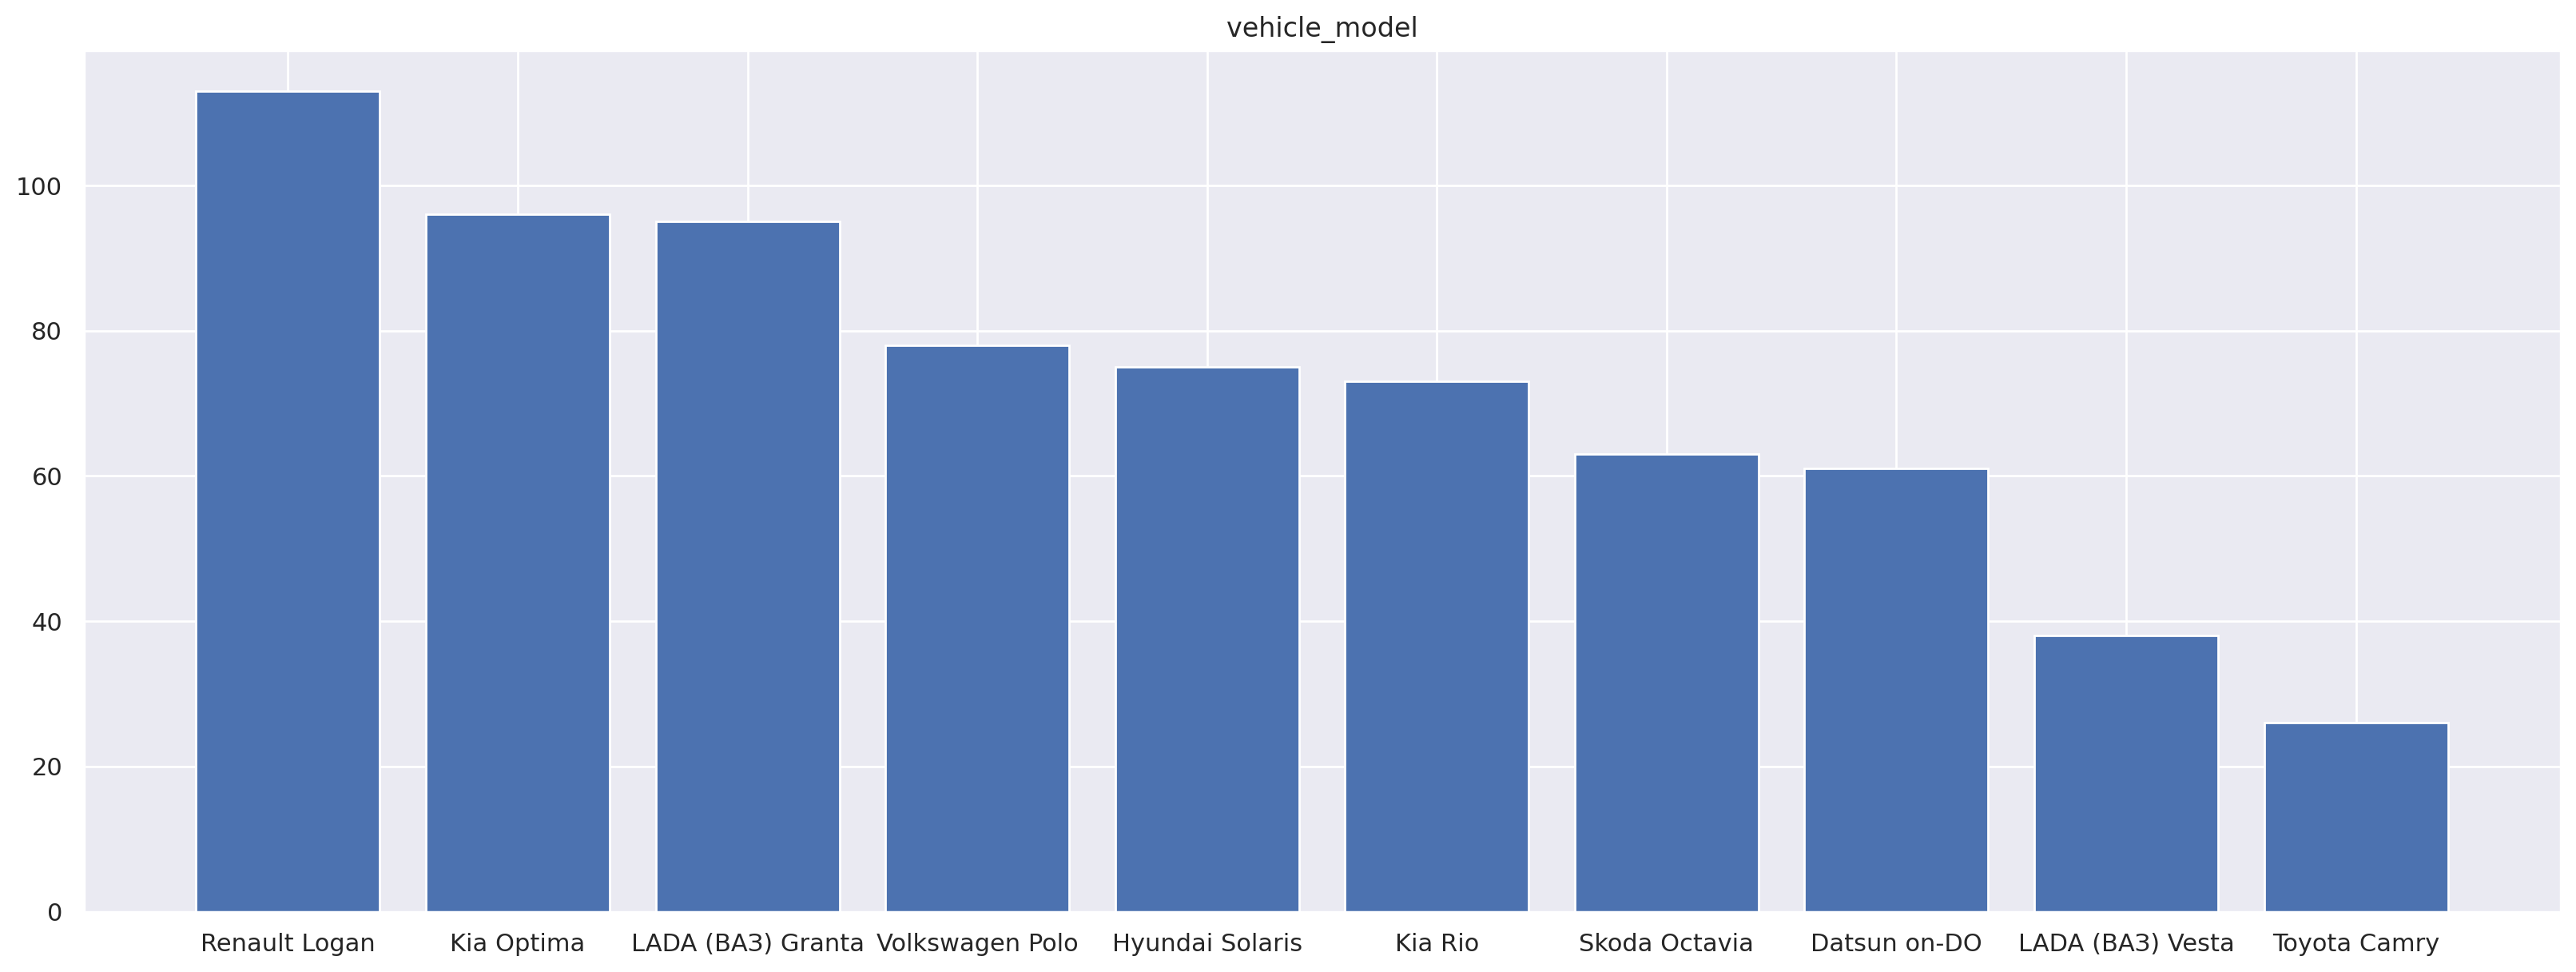

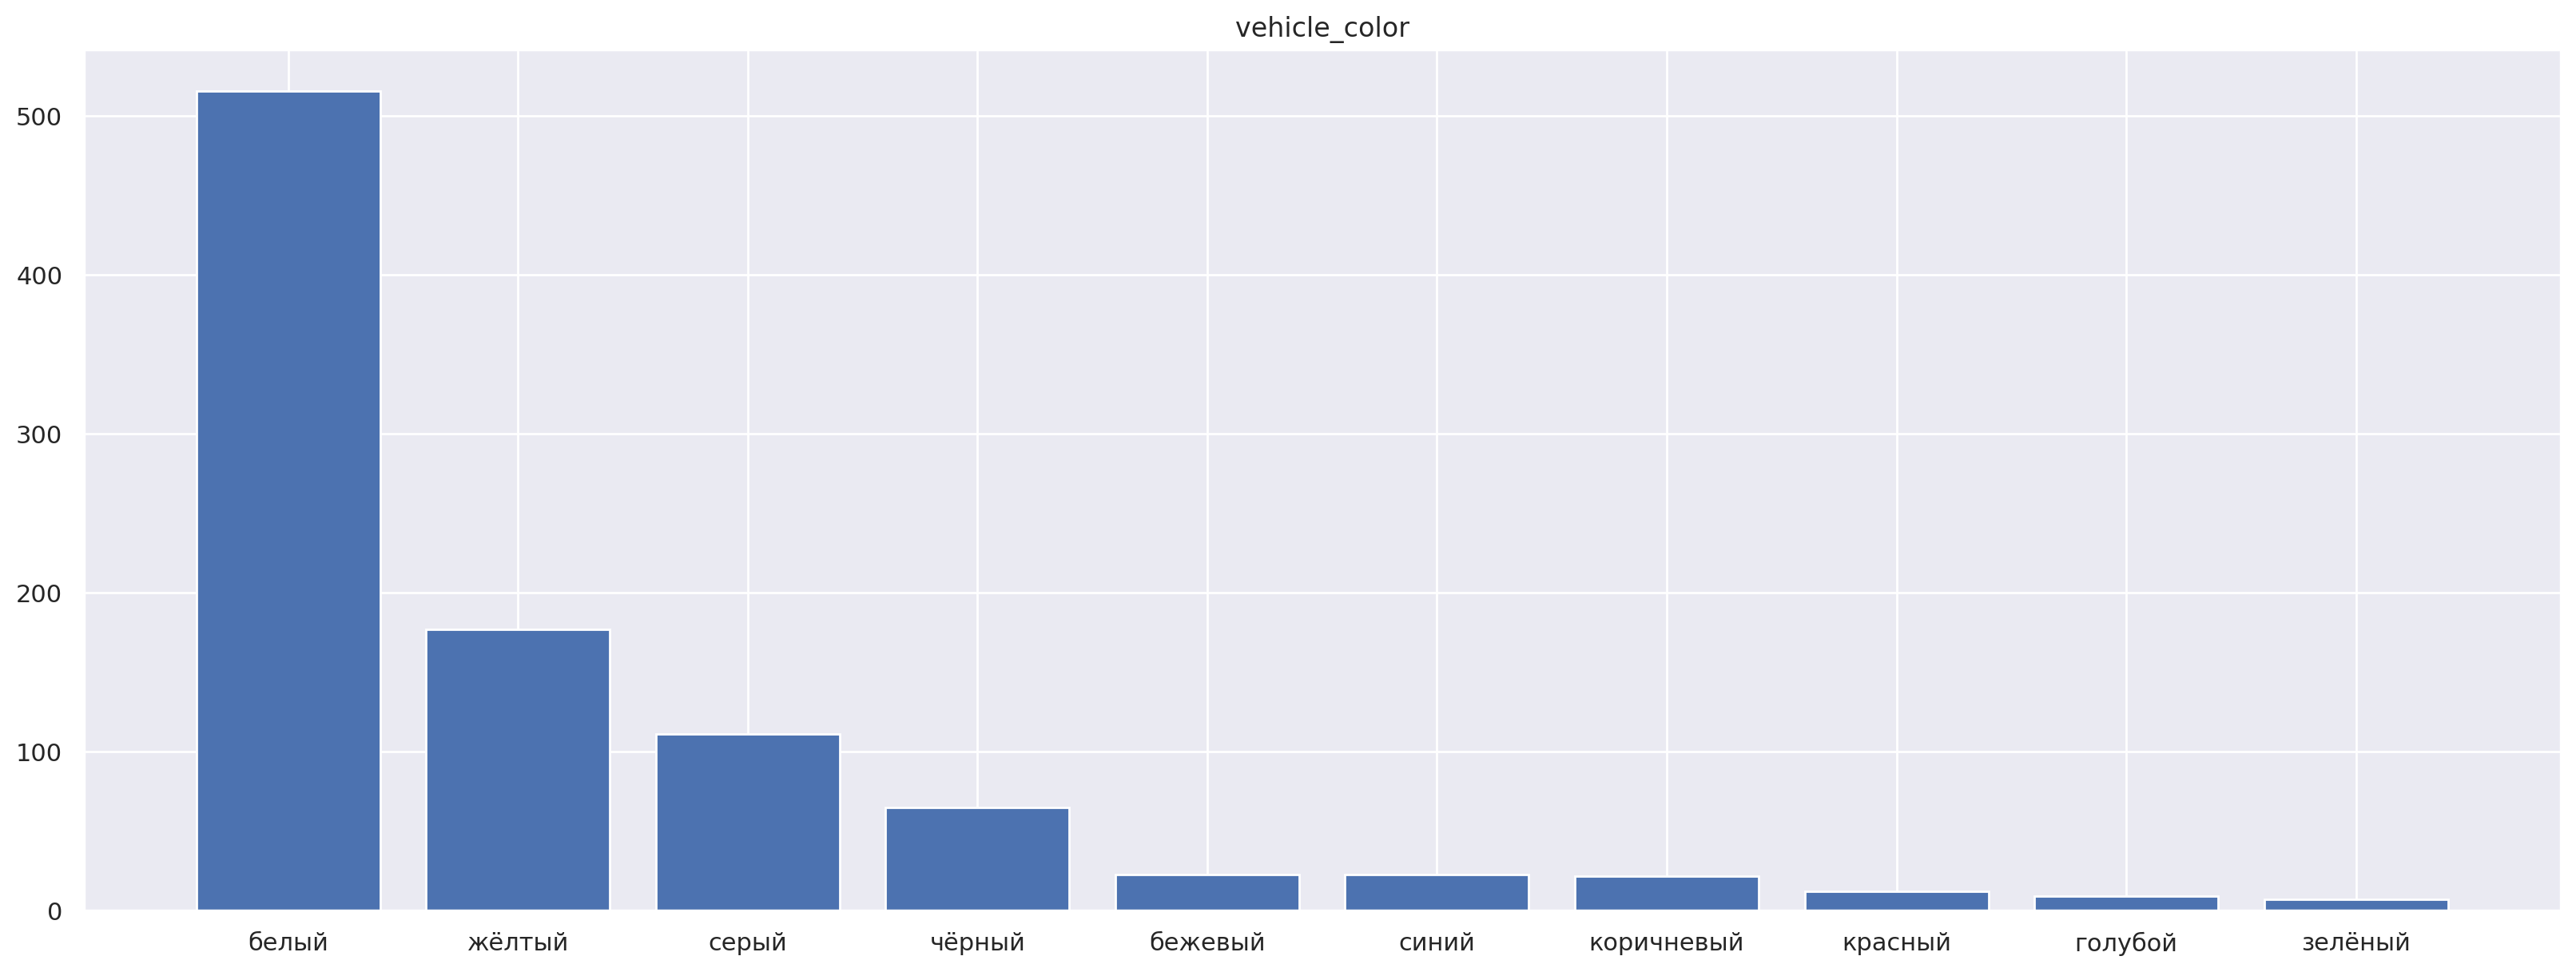

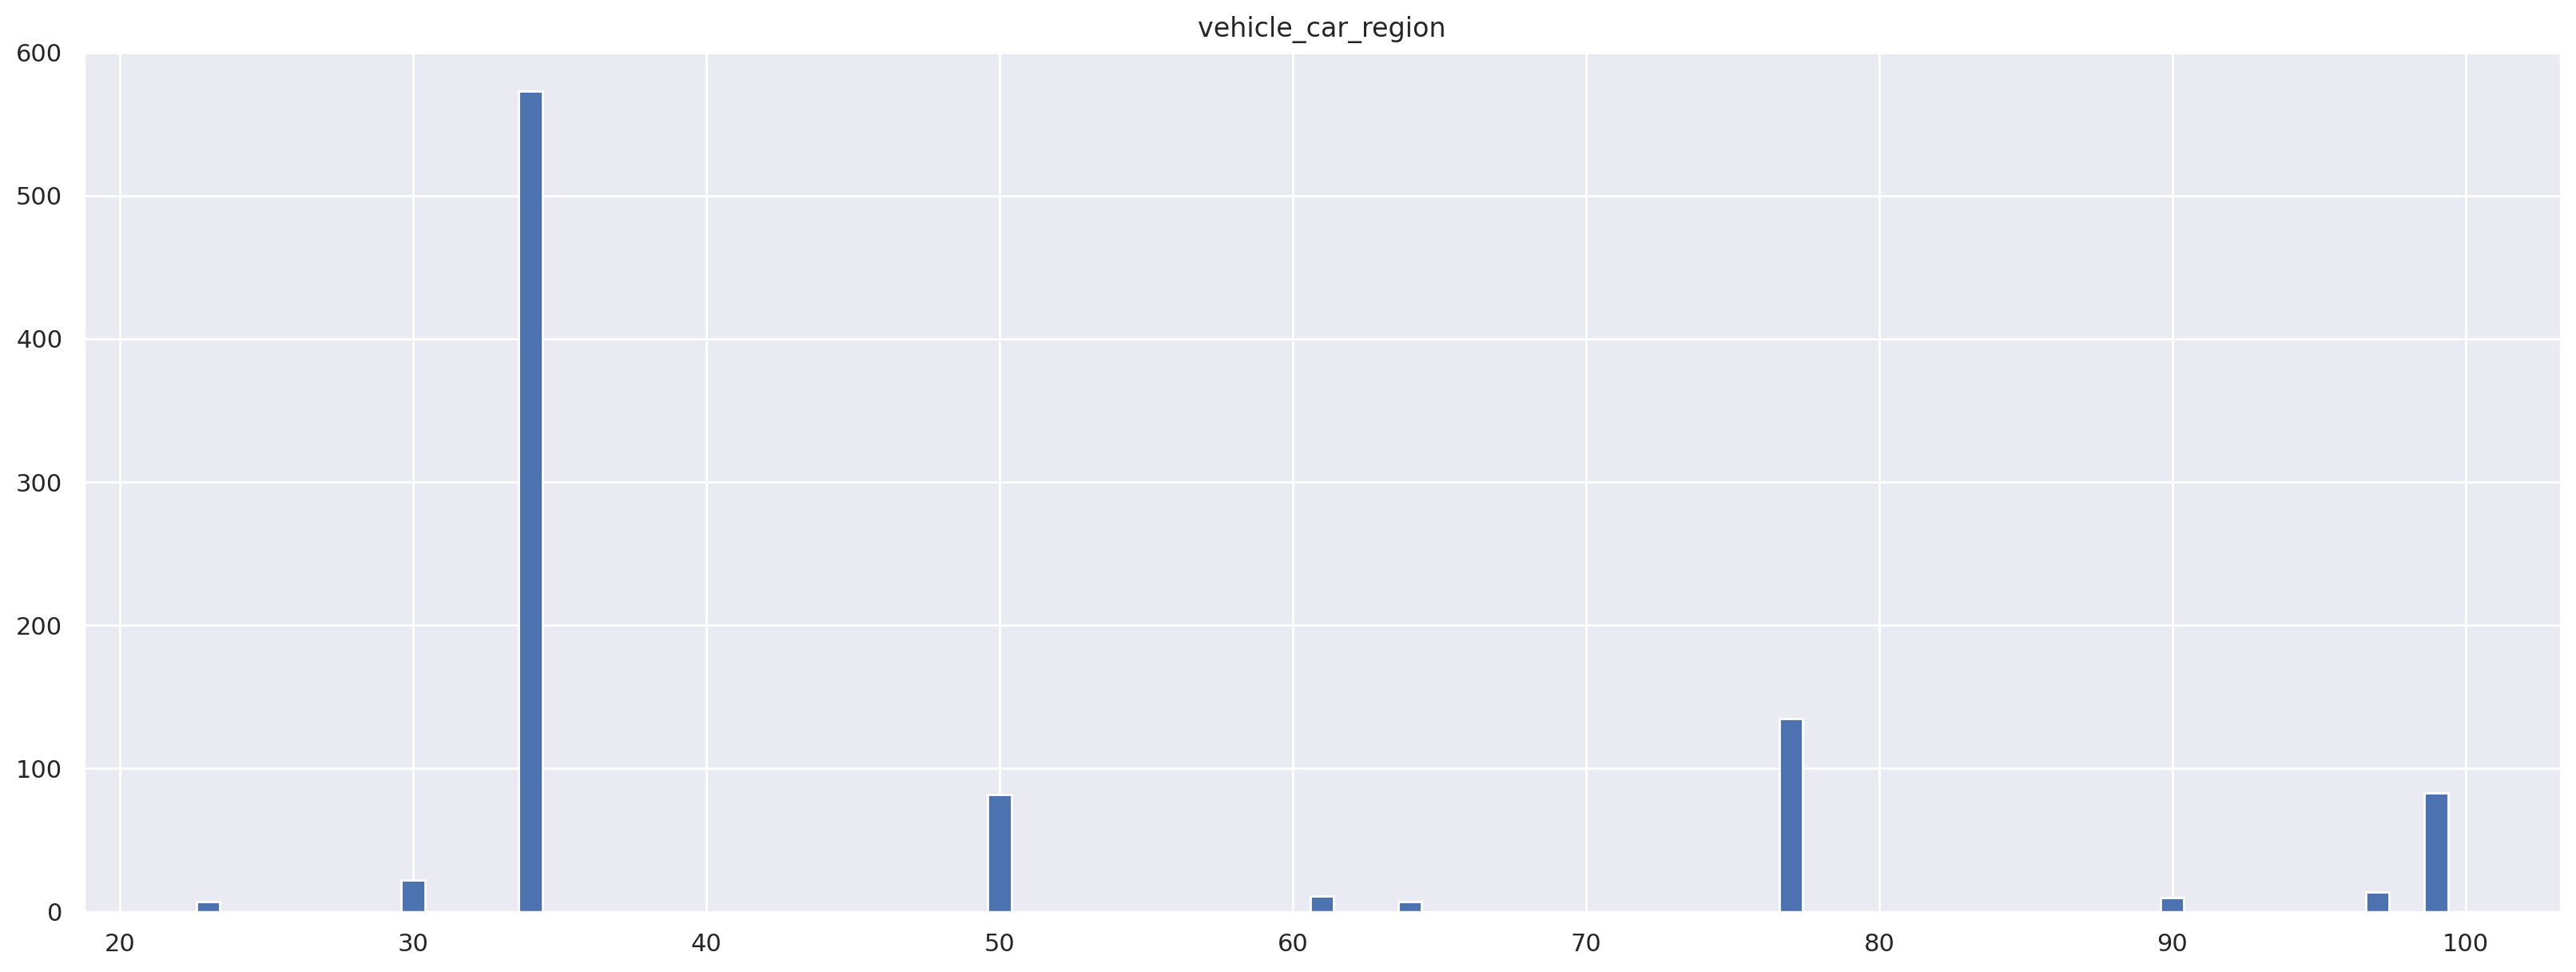

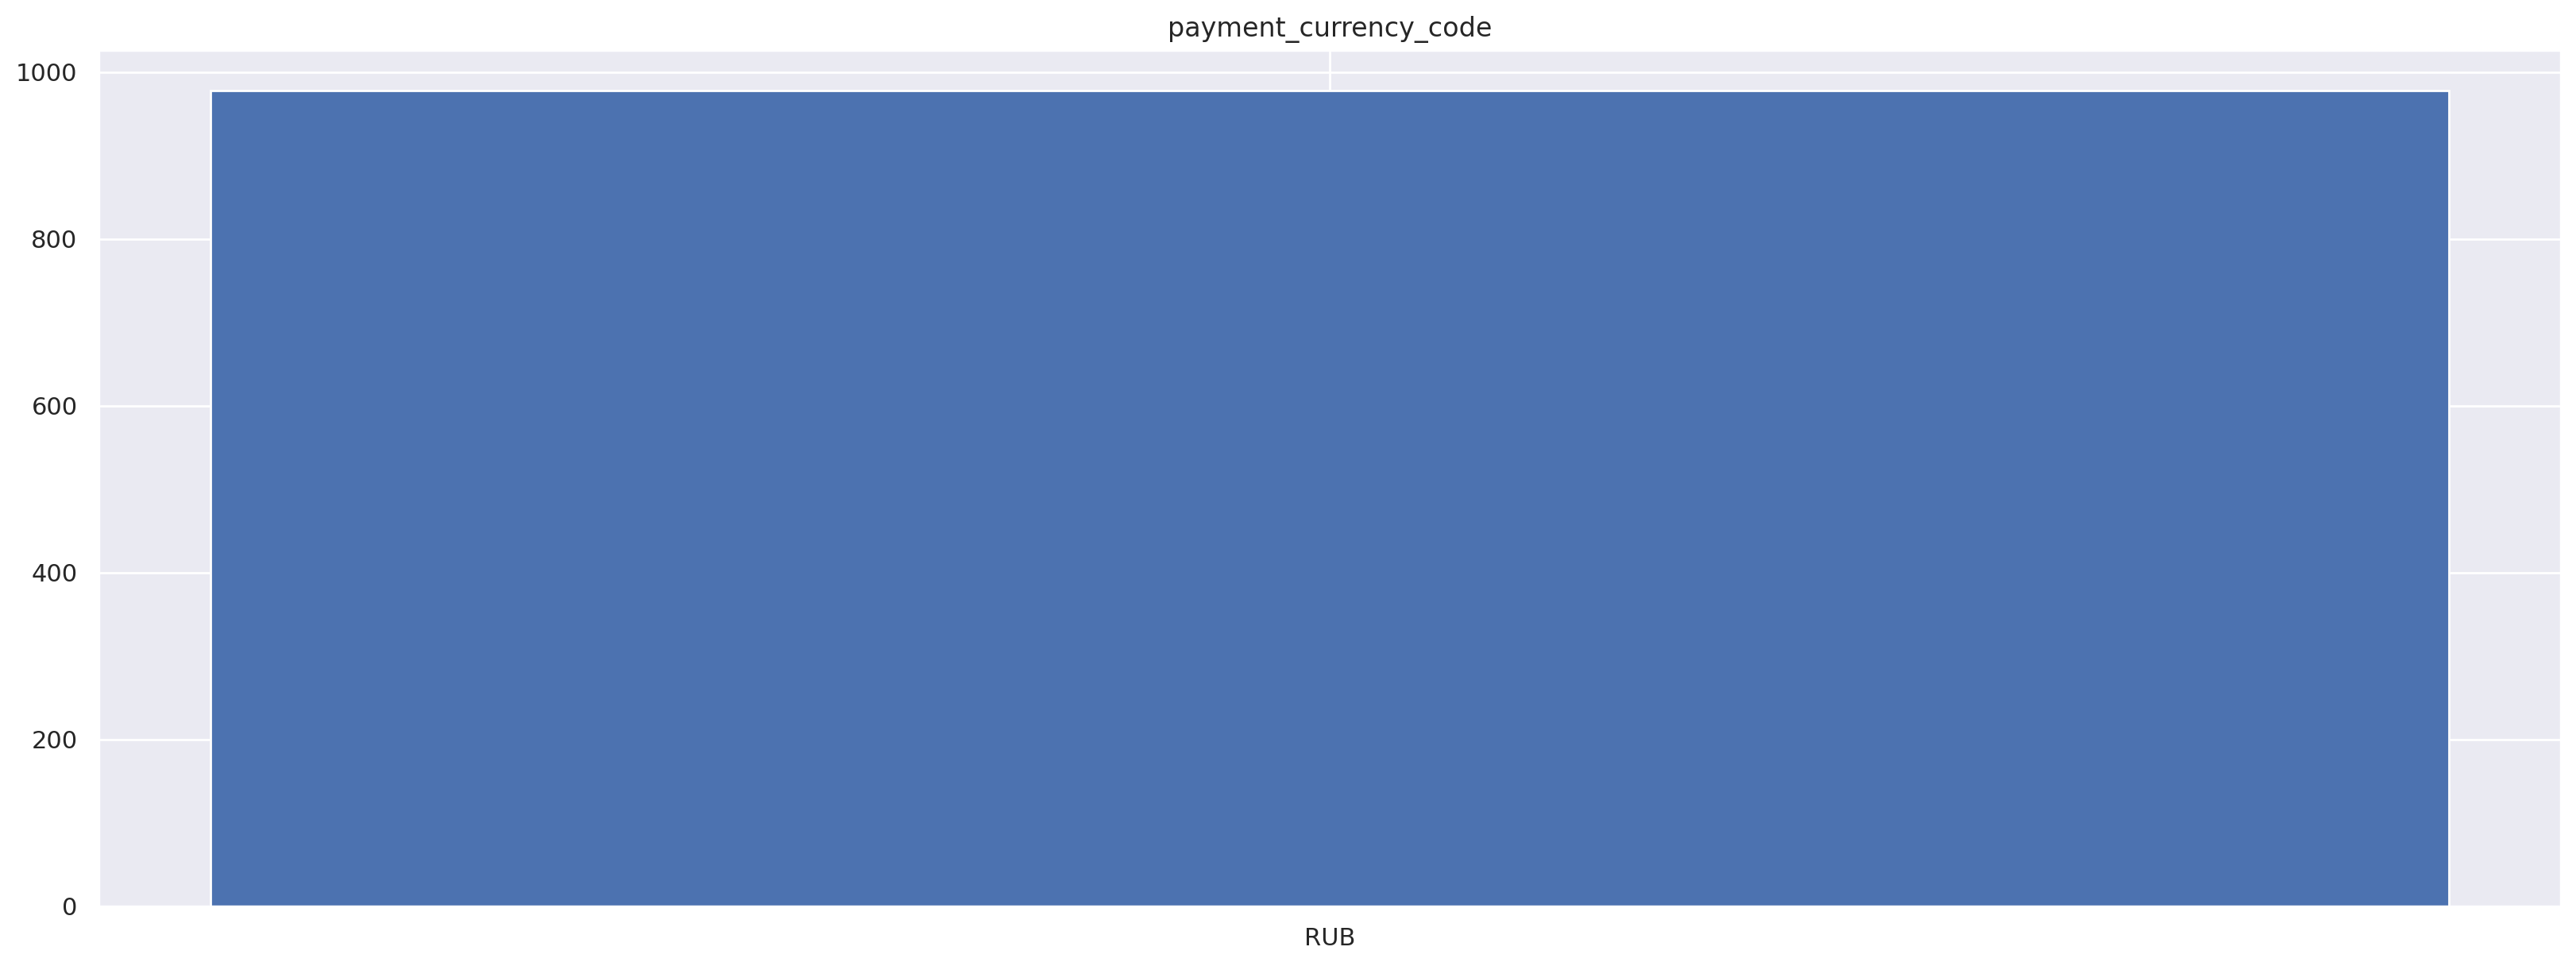

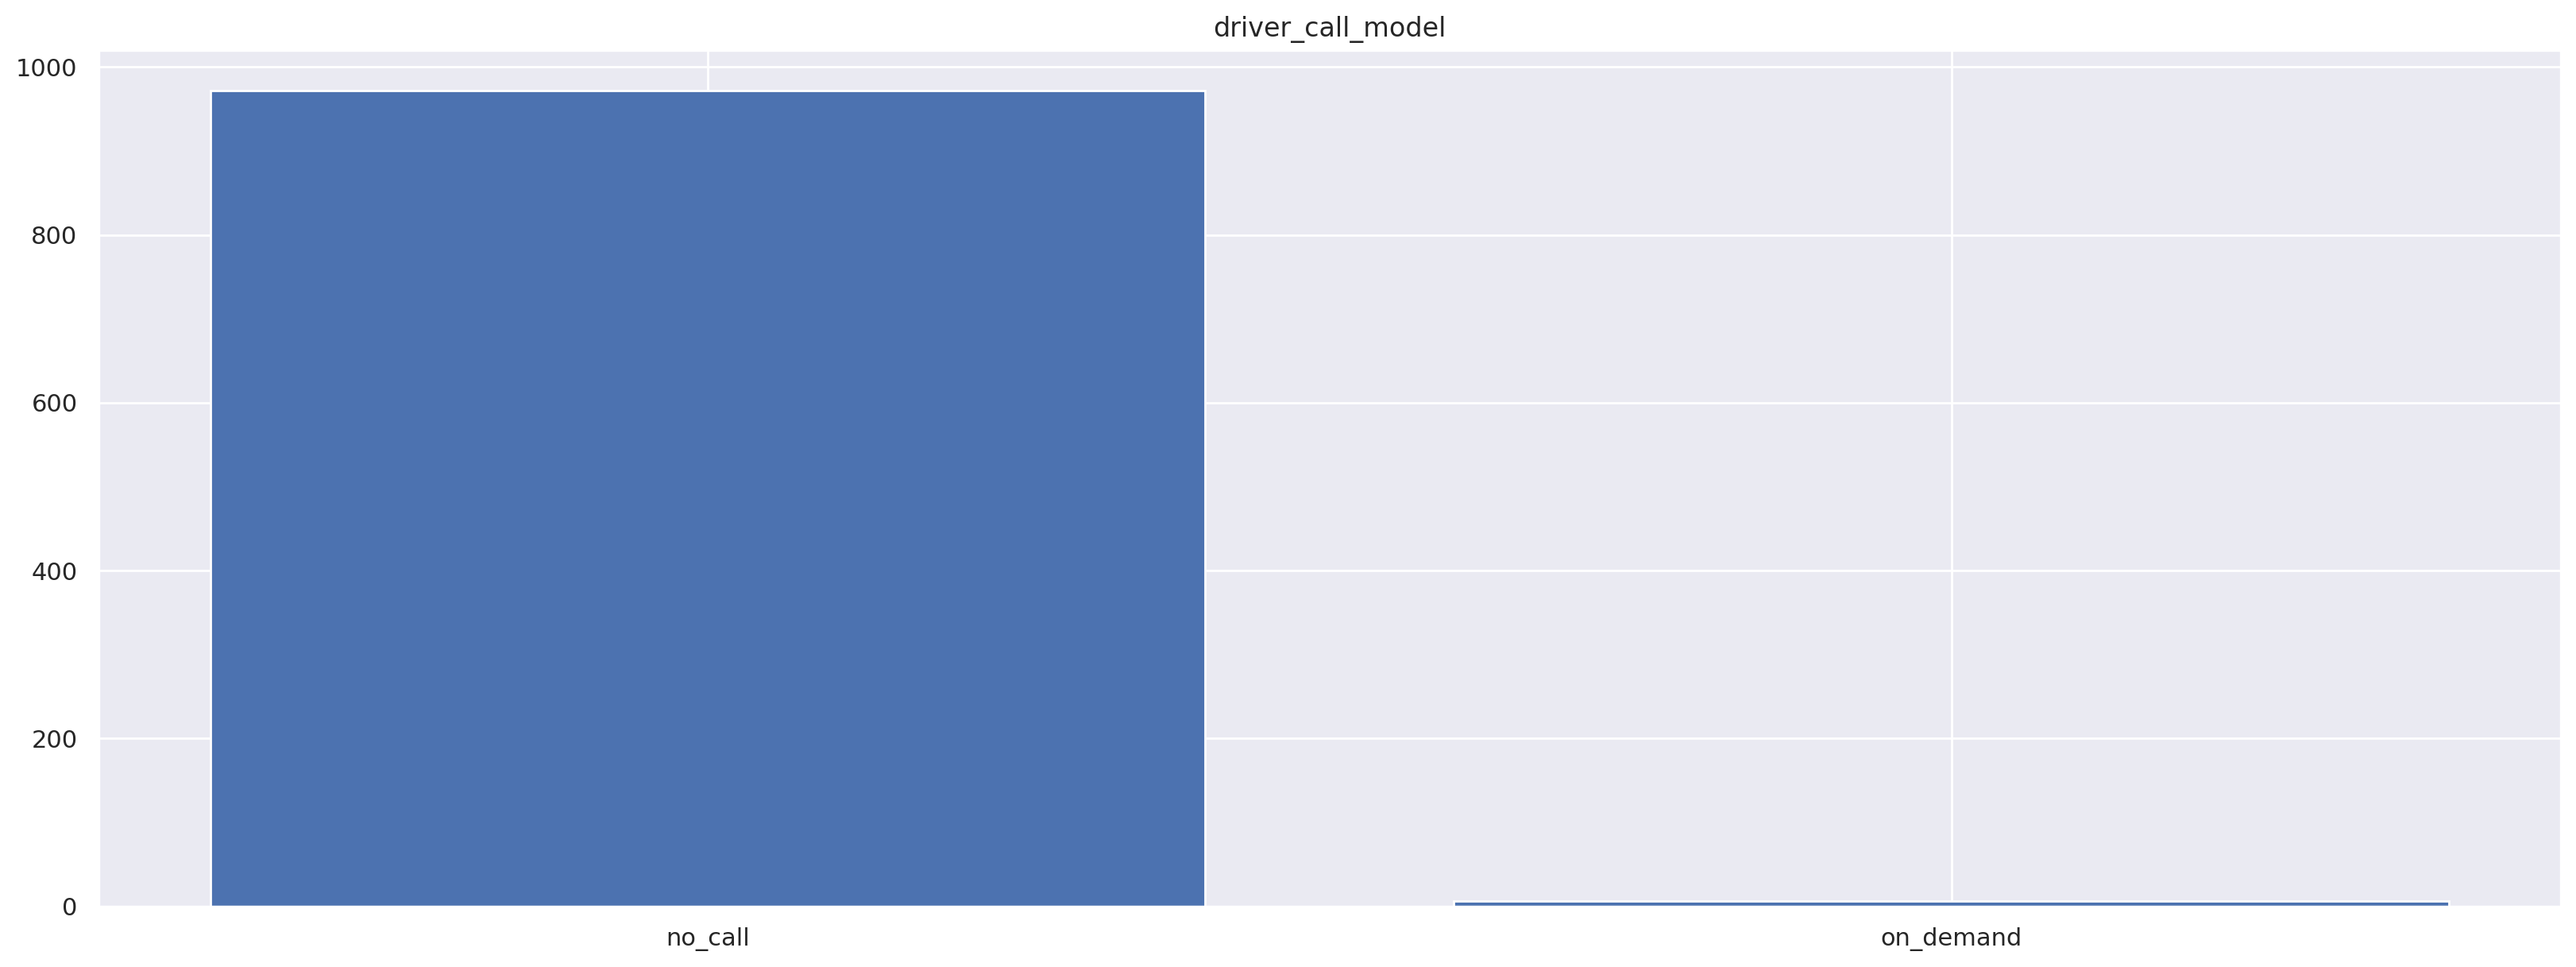

In [10]:
barplots(time_ind_df.loc[df['payment_cost']!=0])

In [11]:
# May conclude that these instances are not really dependent on payment or they are last of their kind.
time_ind_df = time_ind_df.drop(columns=['payment_currency_code','driver_call_model'])
time_ind_df

,tariff_class,status,taxi_status,vehicle_model,vehicle_color,vehicle_car_region,payment_cost
0,Эконом,cancelled,waiting,Kia Rio,белый,34,52.00
1,Эконом,cancelled,driving,LADA (ВАЗ) Granta,серый,34,0.00
2,Эконом,finished,complete,Renault Logan,белый,34,104.70
3,Эконом,finished,complete,LADA (ВАЗ) Granta,белый,34,120.00
4,Эконом,finished,complete,LADA (ВАЗ) Granta,белый,34,115.50
...,...,...,...,...,...,...,...
1140,Эконом,finished,complete,Mitsubishi Lancer,чёрный,34,0.00
1141,Эконом,finished,complete,Renault Duster,чёрный,34,425.50
1142,Эконом,finished,complete,Geely MK,красный,34,438.15
1143,Эконом,finished,complete,Hyundai Sonata,серый,30,98.90


Following grouped analyzis dedicated for catching anomalies:

In [12]:
# Finished status but did not pay
time_ind_df.loc[(time_ind_df.status == 'finished') & (time_ind_df.payment_cost == 0),['taxi_status', 'status']].groupby('taxi_status').value_counts()

taxi_status  status  
complete     finished    3
failed       finished    8
Name: count, dtype: int64

In [13]:
# Complete taxi status but did not payed money
print(time_ind_df.loc[(time_ind_df.taxi_status != 'driving') & (time_ind_df.payment_cost == 0),['status','taxi_status']].groupby('status').value_counts())

status     taxi_status 
cancelled  waiting         2
           transporting    1
finished   failed          8
           complete        3
Name: count, dtype: int64


In [14]:
# Cancelled status but payed 
time_ind_df.loc[(time_ind_df.status == 'cancelled') & (time_ind_df.payment_cost != 0),['taxi_status', 'status']].groupby('taxi_status').value_counts()

taxi_status   status   
driving       cancelled     4
transporting  cancelled     4
waiting       cancelled    21
Name: count, dtype: int64

In [15]:
# Not complete taxi status but payed 
print(time_ind_df.loc[(time_ind_df.taxi_status != 'complete') & (time_ind_df.payment_cost != 0),['status','taxi_status']].groupby('status').value_counts())

status     taxi_status 
cancelled  waiting         21
           driving          4
           transporting     4
finished   cancelled        7
Name: count, dtype: int64


**A good idea is to drop anomalies when taxi status are: complete and status is finished, respectively when taxi status driving and status is cancelled**

In [16]:
time_ind_df = time_ind_df.drop(time_ind_df.loc[(time_ind_df.status == 'cancelled') & \
                                               (time_ind_df.taxi_status == 'driving') & \
                                               (time_ind_df.payment_cost != 0)].index)

time_ind_df = time_ind_df.drop(time_ind_df.loc[(time_ind_df.status == 'finished') & \
                                               (time_ind_df.taxi_status == 'complete') & \
                                               (time_ind_df.payment_cost == 0)].index)

In [17]:
time_ind_df

,tariff_class,status,taxi_status,vehicle_model,vehicle_color,vehicle_car_region,payment_cost
0,Эконом,cancelled,waiting,Kia Rio,белый,34,52.00
1,Эконом,cancelled,driving,LADA (ВАЗ) Granta,серый,34,0.00
2,Эконом,finished,complete,Renault Logan,белый,34,104.70
3,Эконом,finished,complete,LADA (ВАЗ) Granta,белый,34,120.00
4,Эконом,finished,complete,LADA (ВАЗ) Granta,белый,34,115.50
...,...,...,...,...,...,...,...
1119,Эконом,finished,complete,Renault Laguna,серый,34,89.70
1141,Эконом,finished,complete,Renault Duster,чёрный,34,425.50
1142,Эконом,finished,complete,Geely MK,красный,34,438.15
1143,Эконом,finished,complete,Hyundai Sonata,серый,30,98.90


## Time dependendent visualization

In [18]:
# Adding sepearte columns for years, months, weekdays and hour to a new df = date_df for time anaylisys

date_df = df.copy()

date_df = date_df[['created_at_utc','tariff_class','payment_cost']]
date_df.sort_values(by=['created_at_utc'], inplace=True)
date_df.set_index('created_at_utc', inplace=True)

date_df["year"] = date_df.index.year
date_df["month"] = date_df.index.month
date_df["weekday"] = date_df.index.weekday
date_df["hour"] = date_df.index.hour

date_df

,tariff_class,payment_cost,year,month,weekday,hour
created_at_utc,,,,,,
2017-09-30 20:36:04,Эконом,58.65,2017,9,5,20
2017-09-30 21:07:25,Эконом,98.90,2017,9,5,21
2017-10-18 06:24:17,Эконом,438.15,2017,10,2,6
2017-10-19 05:49:34,Эконом,425.50,2017,10,3,5
2017-10-27 13:09:25,Эконом,0.00,2017,10,4,13
...,...,...,...,...,...,...
2021-05-26 16:03:56,Эконом,115.50,2021,5,2,16
2021-05-26 18:43:35,Эконом,120.00,2021,5,2,18
2021-05-27 19:53:32,Эконом,104.70,2021,5,3,19


<Figure size 1000x600 with 0 Axes>

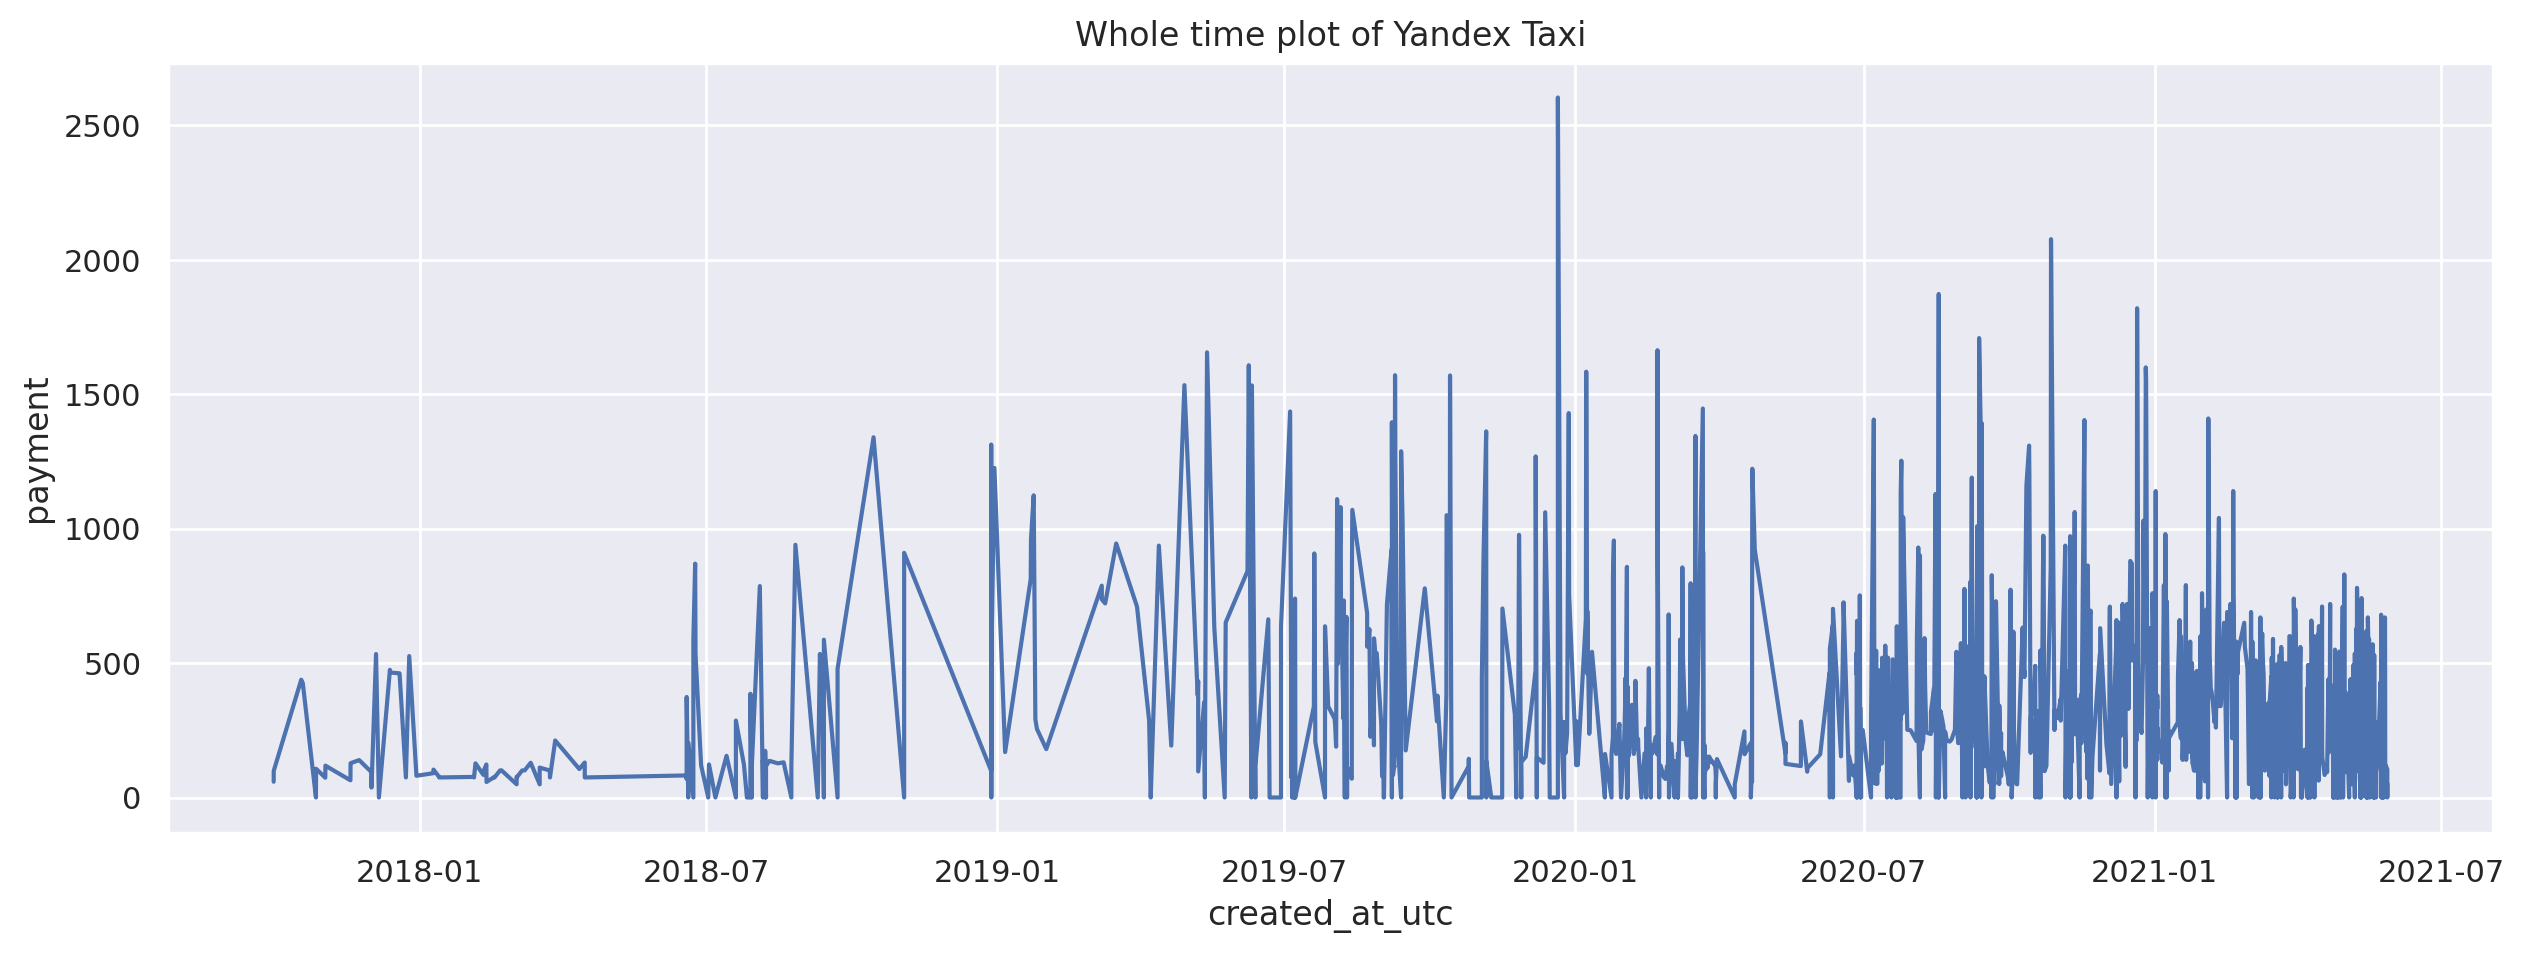

In [19]:
plt.figure(figsize=(10, 6))  # Set figure size

# Plot the time series
plt.figure(figsize=(15, 5))
plt.plot(date_df.index, date_df['payment_cost'], linestyle='-')

# Add labels and title
plt.xlabel('created_at_utc')
plt.ylabel('payment')
plt.title('Whole time plot of Yandex Taxi')
plt.show()

In [20]:
print('How many rides were on each year:')
print(date_df.groupby('year').tariff_class.count())
print('\nHow many rides were on each year with payment cost not 0:')
print(date_df.loc[date_df.payment_cost!=0].groupby('year').tariff_class.count())
print('\nRation between these above:')
print(pd.DataFrame({'Ratio':np.array(date_df.loc[date_df.payment_cost!=0].groupby('year').tariff_class.count())/ \
             np.array(date_df.groupby('year').tariff_class.count())},index=date_df.year.unique()))

How many rides were on each year:
year
2017     24
2018     93
2019    173
2020    512
2021    403
Name: tariff_class, dtype: int64

How many rides were on each year with payment cost not 0:
year
2017     22
2018     64
2019    127
2020    438
2021    327
Name: tariff_class, dtype: int64

Ration between these above:
         Ratio
2017  0.916667
2018  0.688172
2019  0.734104
2020  0.855469
2021  0.811414


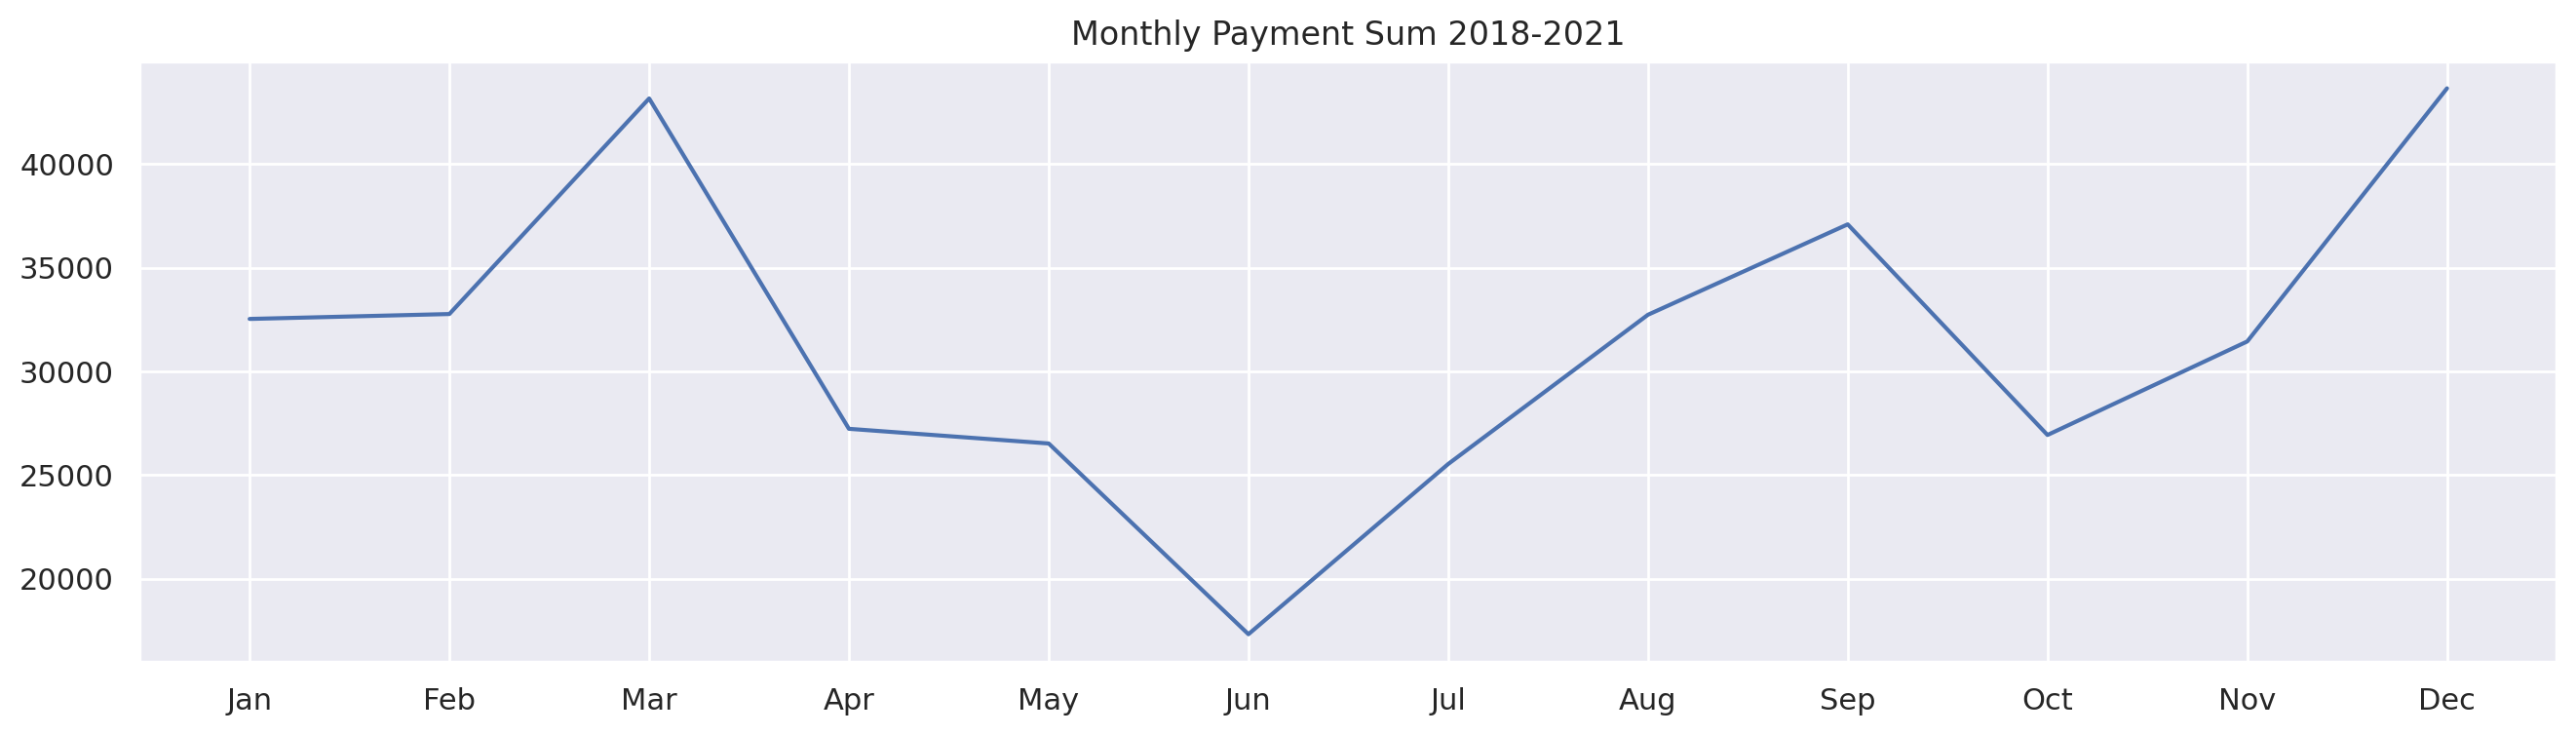

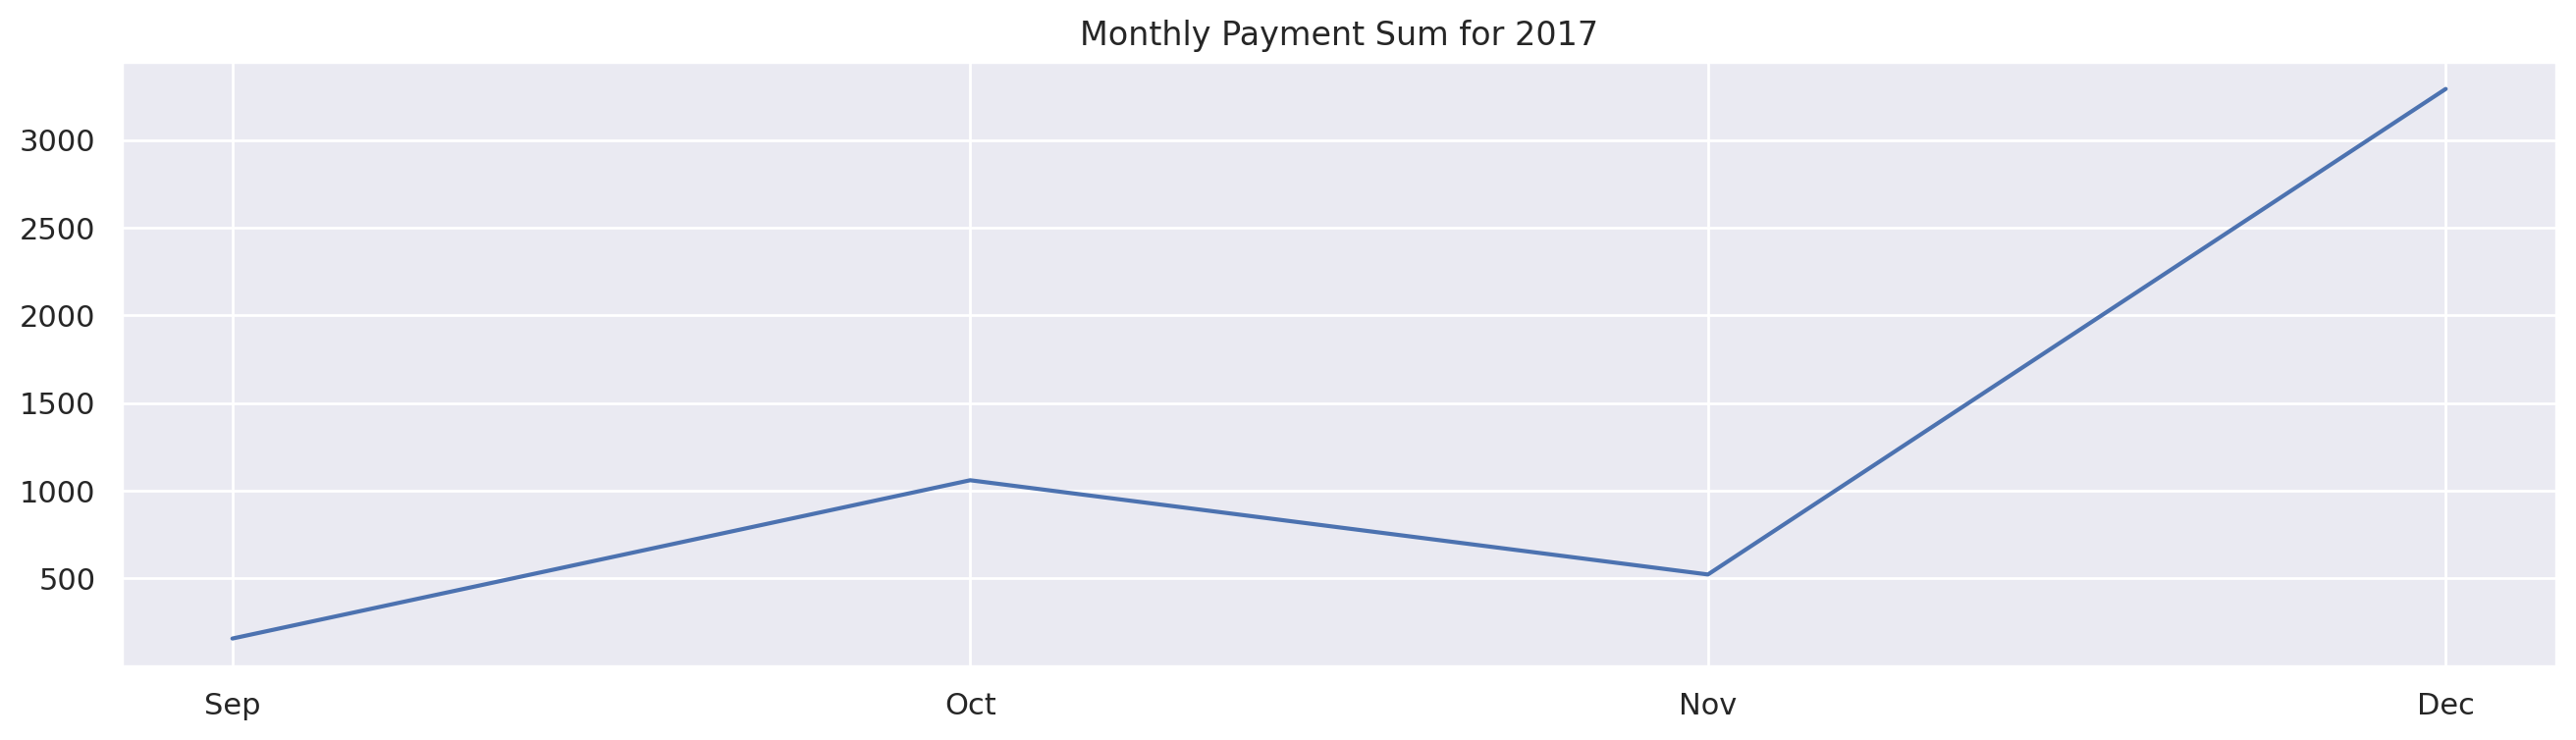

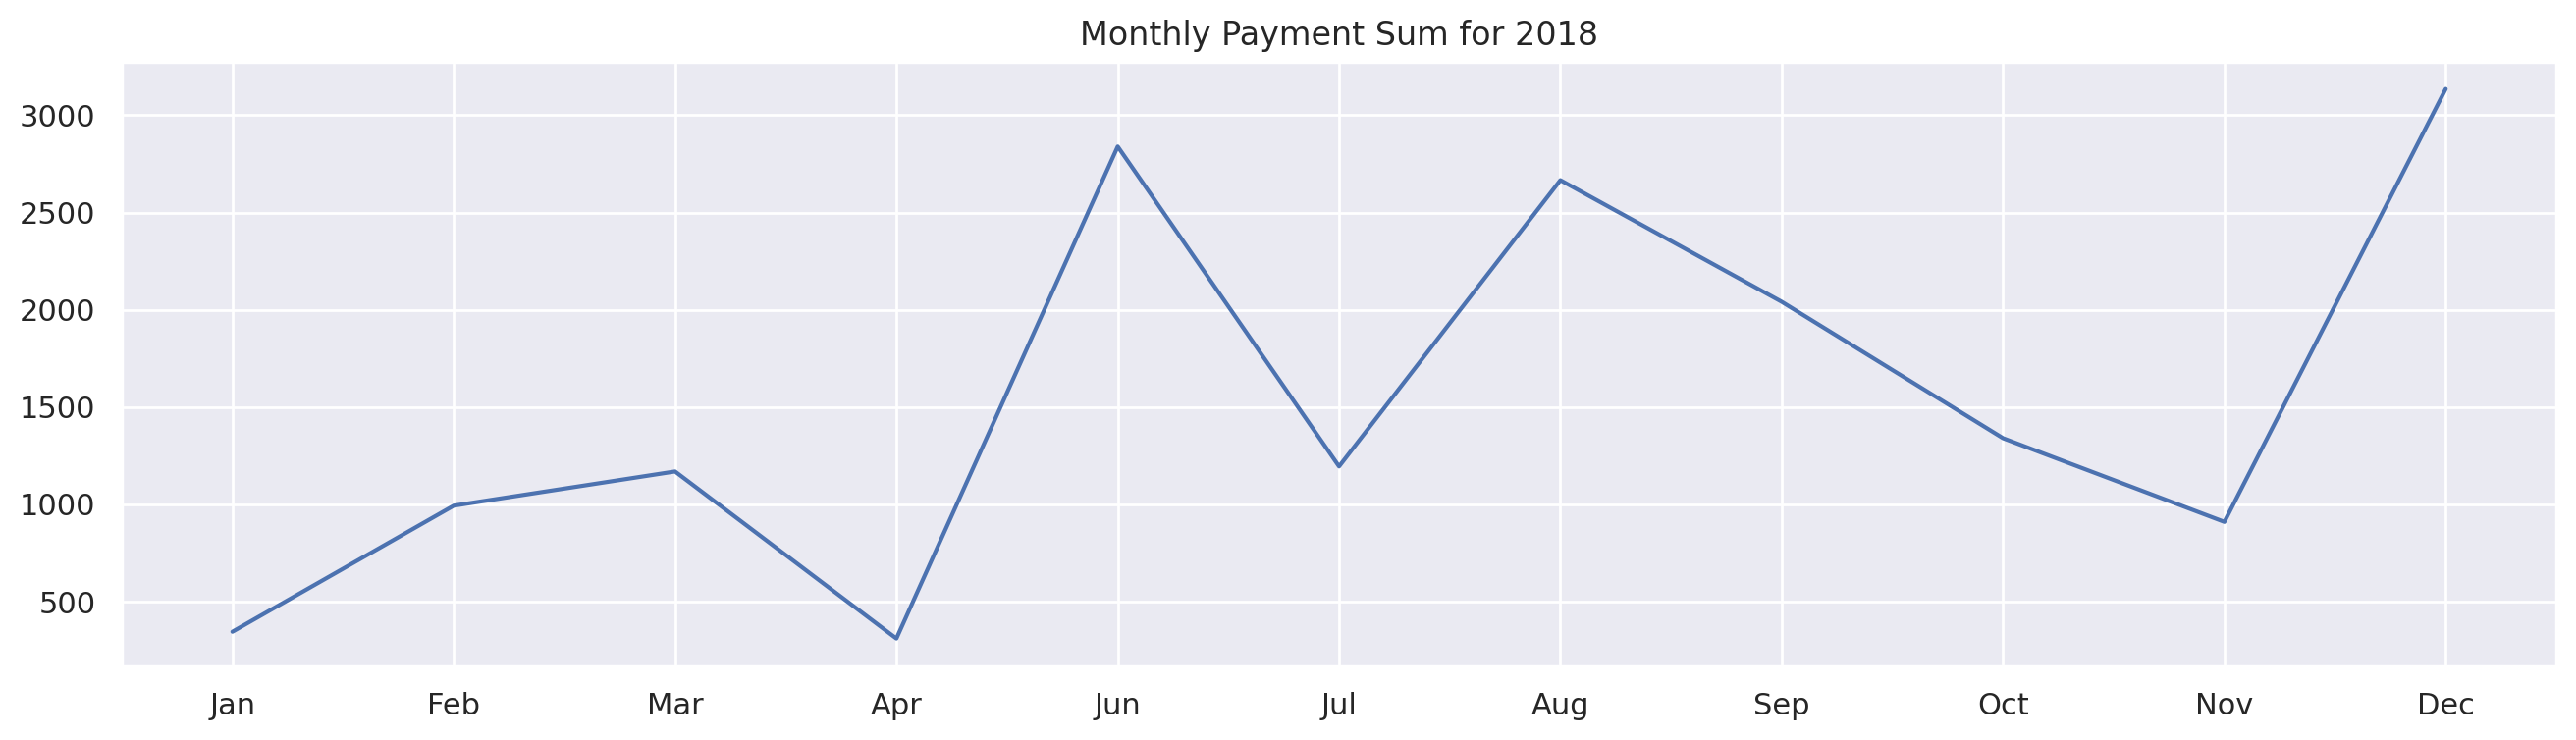

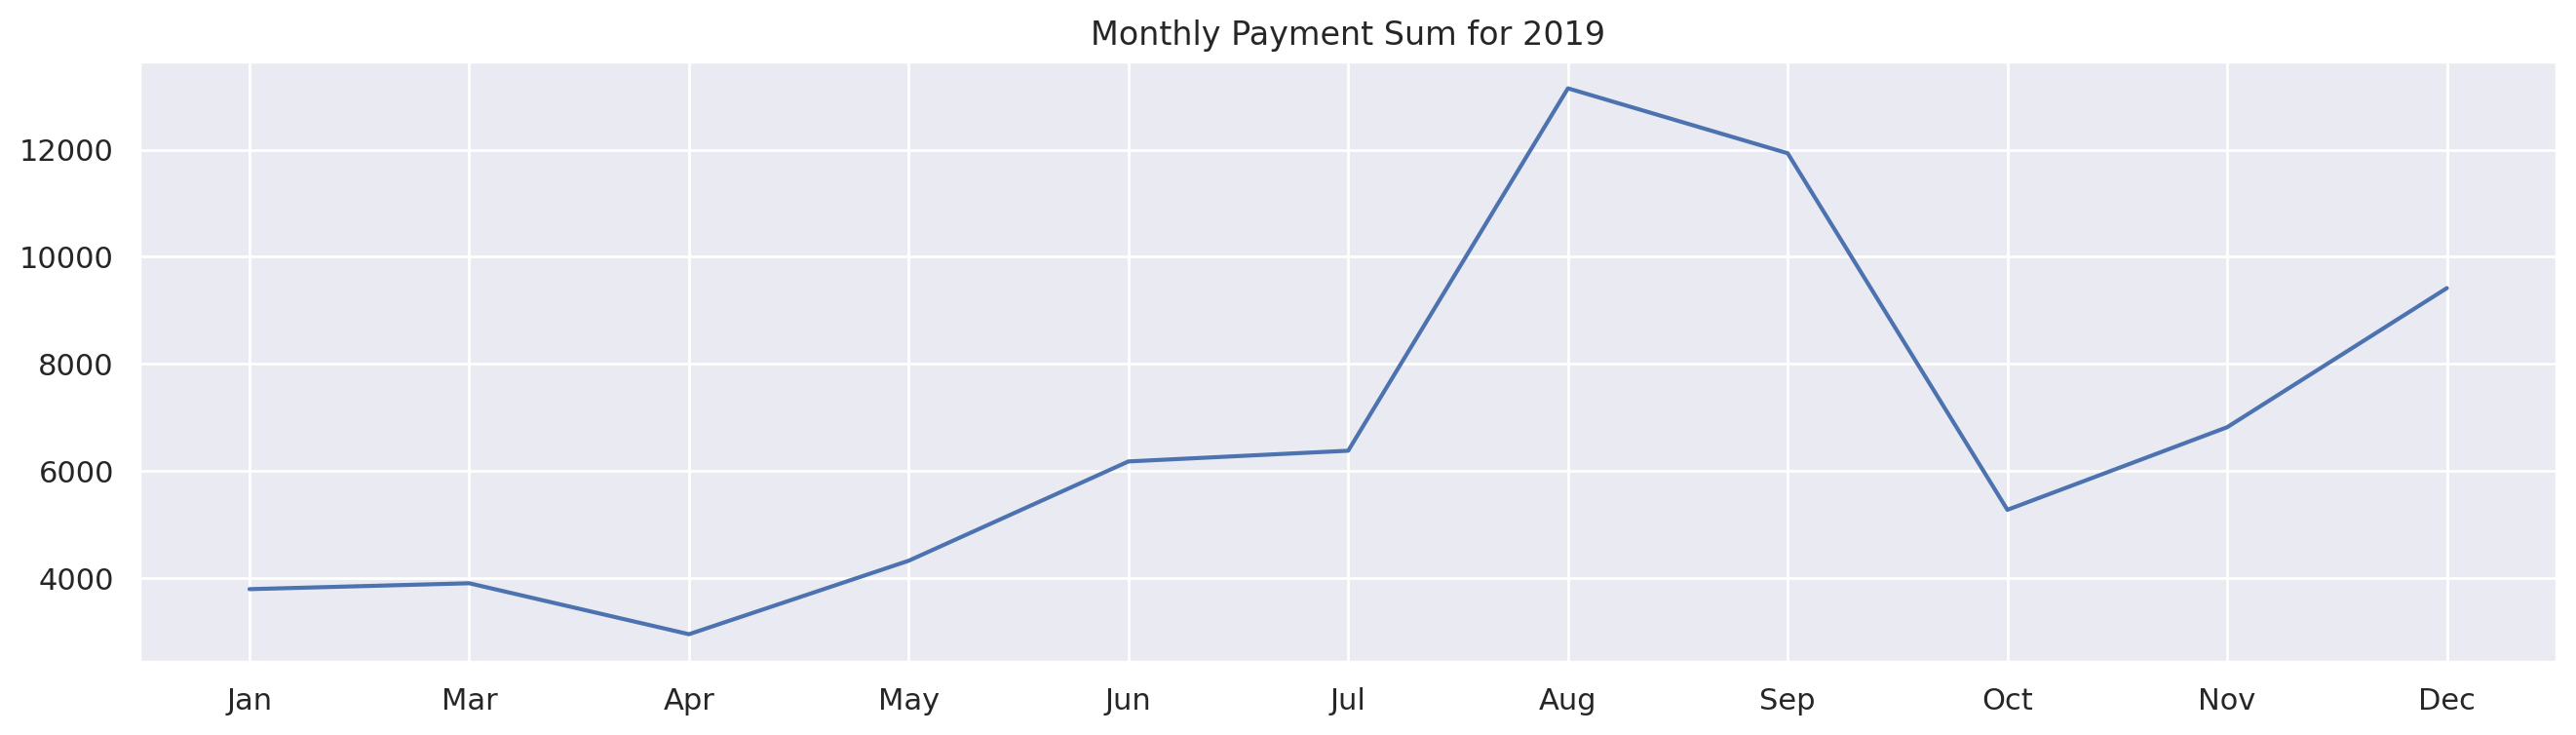

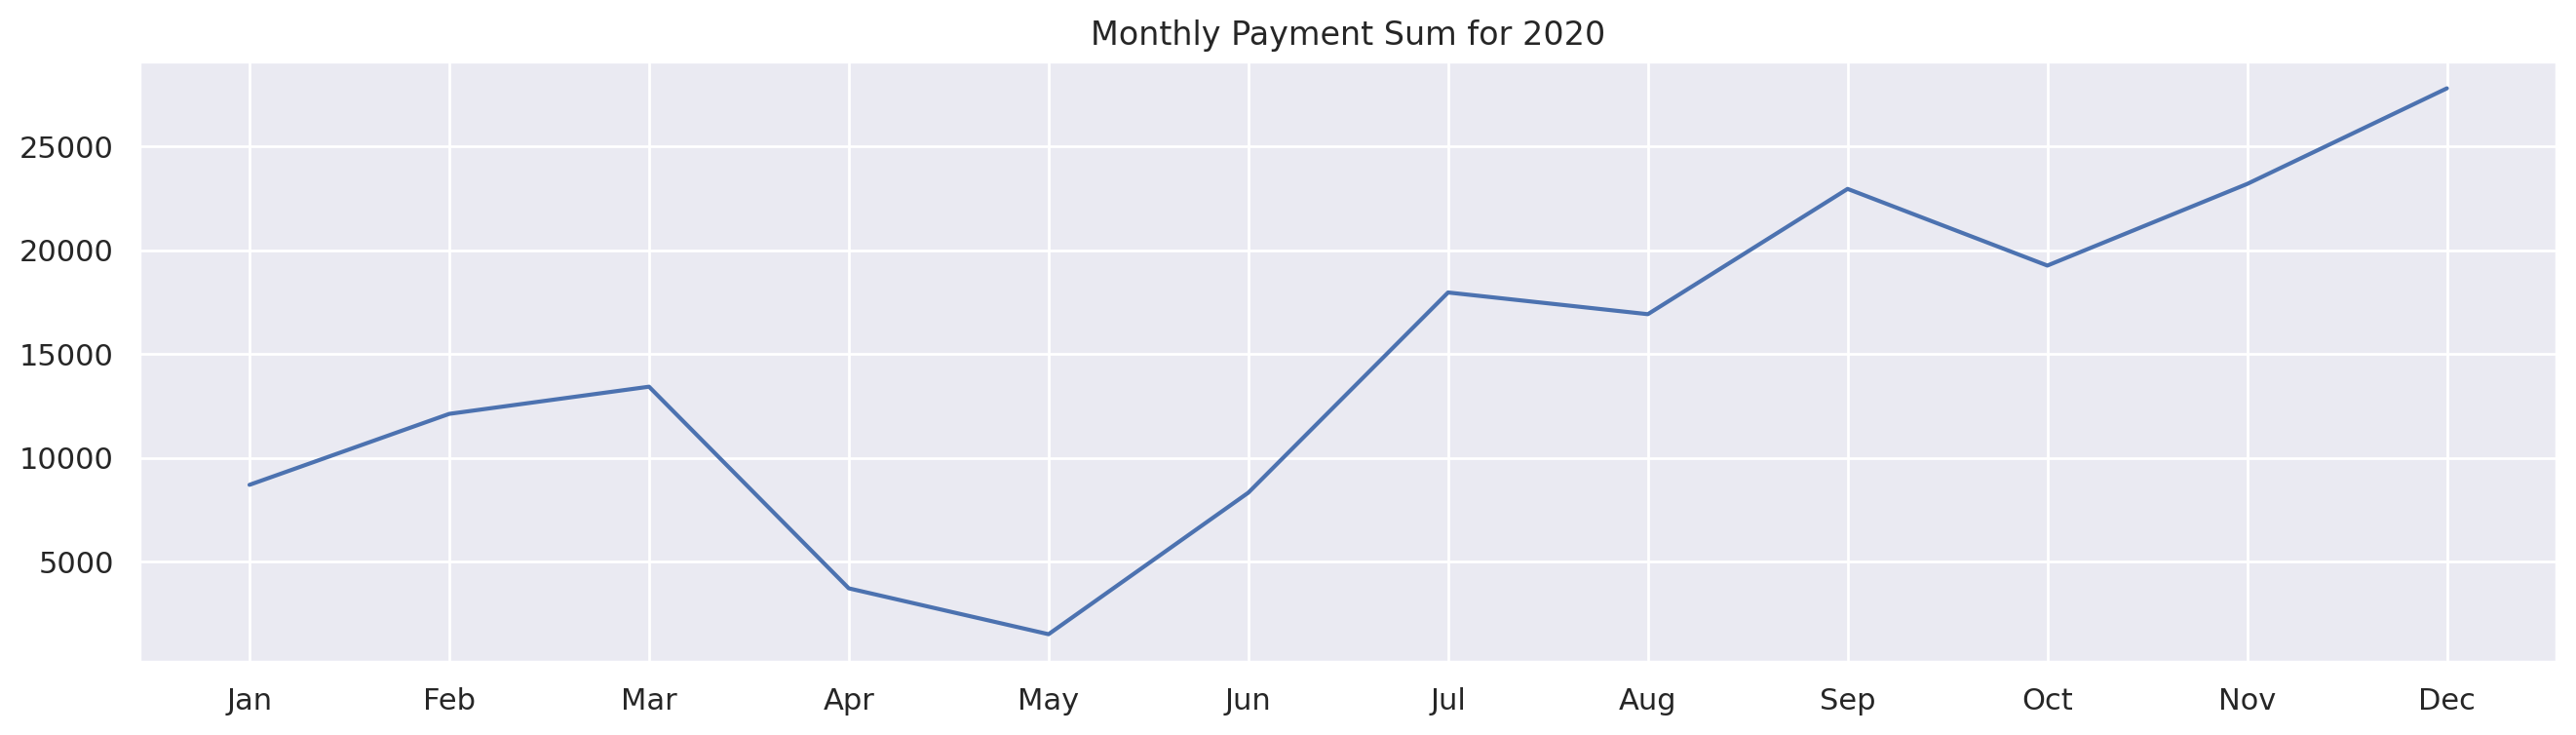

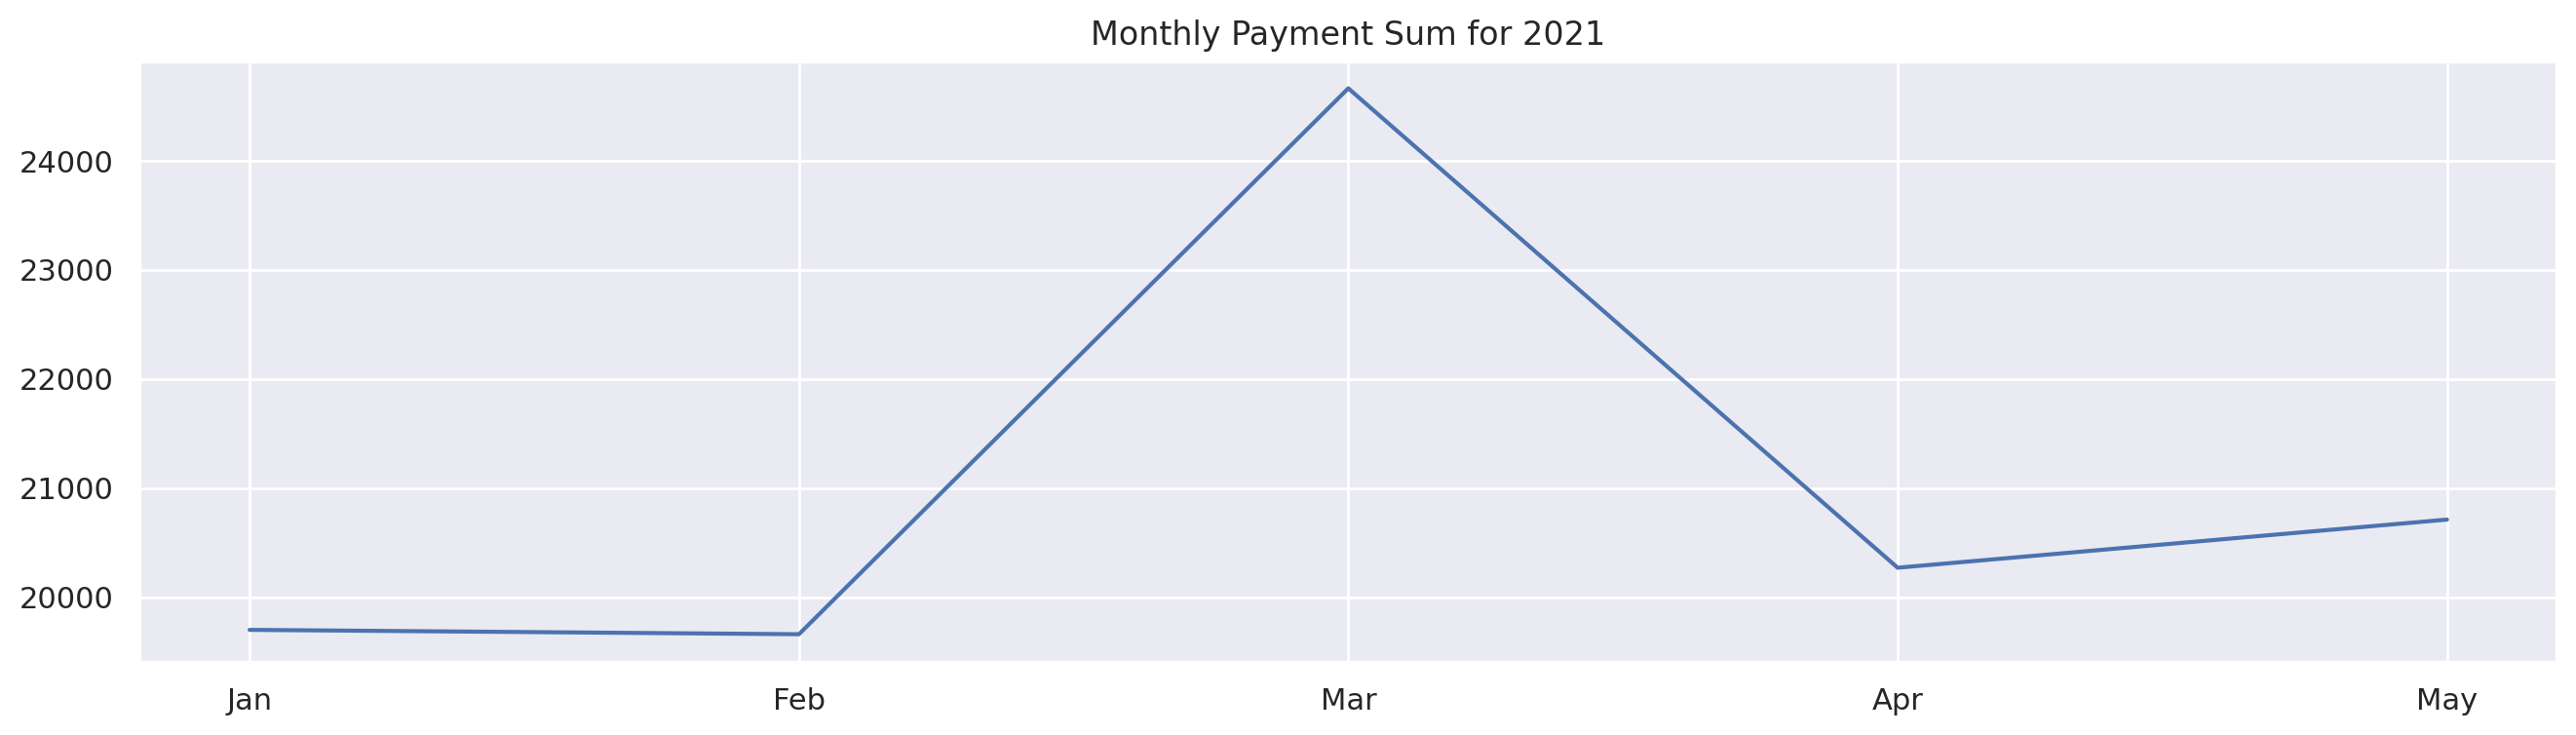

In [21]:
monthly_payment = date_df.groupby('month')['payment_cost'].sum()
yearly_monthly_payment = date_df.groupby(['year', 'month'])['payment_cost'].sum()

# Plotting graph for full period
plt.figure(figsize=(16, 4))
plt.plot(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],monthly_payment)
plt.title(f'Monthly Payment Sum 2018-2021')
plt.show()

# Plotting for each year
years = yearly_monthly_payment.index.levels[0]
for year in years:
    monthly_payment_year = yearly_monthly_payment.loc[year]
    plt.figure(figsize=(16, 4))
    plt.plot(monthly_payment_year.index.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}),monthly_payment_year)
    plt.title(f'Monthly Payment Sum for {year}')
    plt.show()

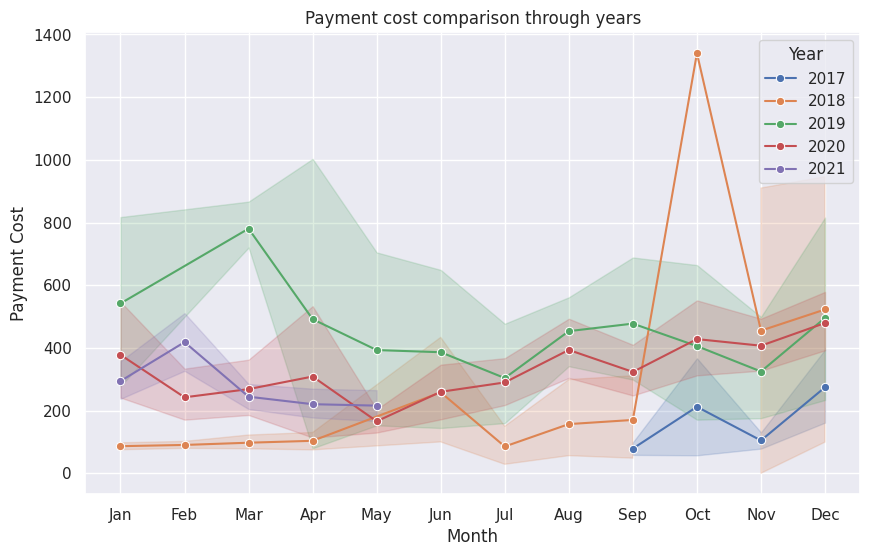

In [20]:
# Comparison plot for prices in each year.
plt.figure(figsize=(10, 6))
sns.lineplot(data=date_df[['payment_cost','month','year']], x='month', y='payment_cost', hue='year', marker = 'o', palette="deep")
plt.title('Payment cost comparison through years')
plt.xlabel('Month')
plt.ylabel('Payment Cost')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year')
plt.show()

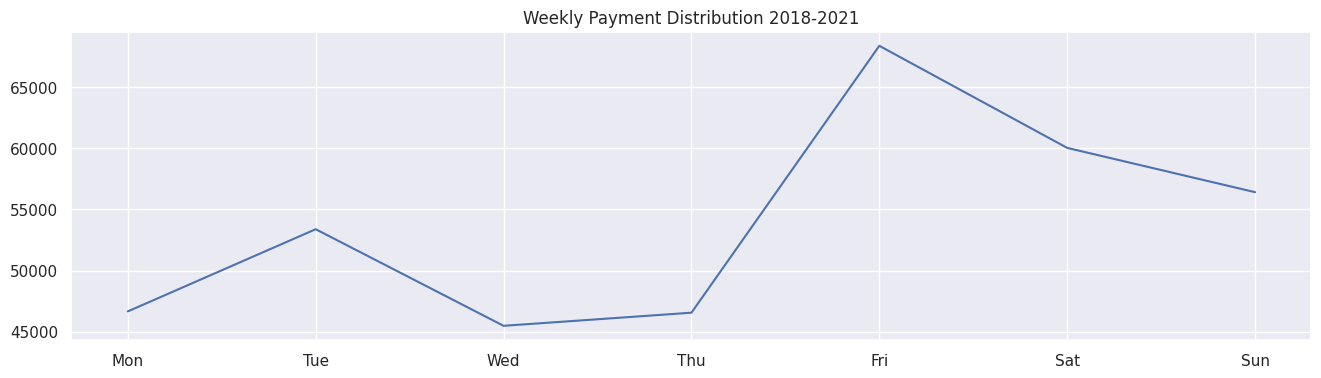

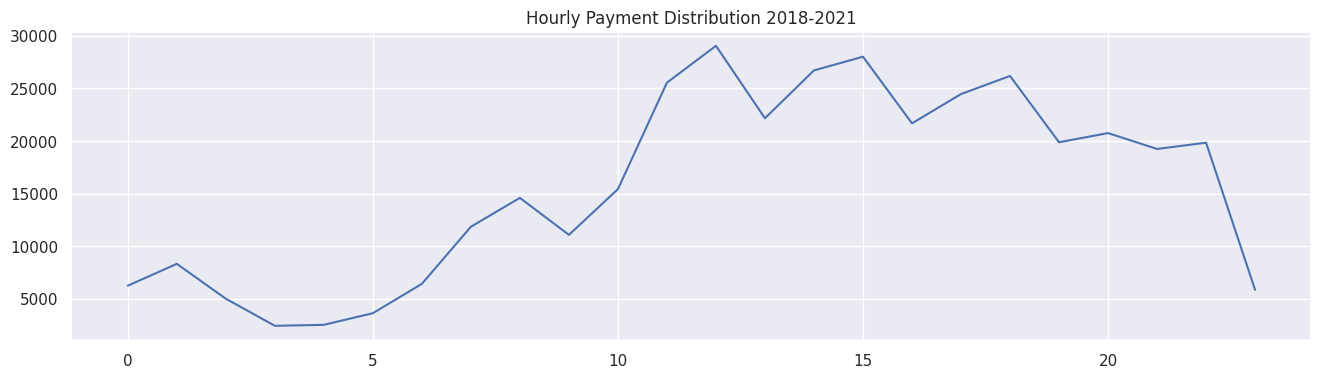

In [21]:
# Plotting weekly_payment
weekly_payment = date_df.groupby(date_df.weekday)['payment_cost'].sum()

plt.figure(figsize=(16, 4))
plt.plot(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], weekly_payment)


plt.title(f'Weekly Payment Sum 2018-2021')
plt.show()

# Plotting hourly_payment
hourly_payment = date_df.groupby(date_df.hour)['payment_cost'].sum()

plt.figure(figsize=(16, 4))
plt.plot(np.arange(0,24), hourly_payment)
plt.title(f'Hourly Payment Sum 2018-2021')
plt.show()

In [22]:
print(date_df['tariff_class'].unique())
print(date_df['tariff_class'].value_counts())

['Эконом' 'Комфорт' 'Комфорт+' 'Доставка']
tariff_class
Эконом      708
Комфорт     450
Комфорт+     45
Доставка      2
Name: count, dtype: int64


In [23]:
date_df_eco = date_df.loc[date_df['tariff_class'] == 'Эконом']
date_df_comf = date_df.loc[(date_df['tariff_class'] == 'Комфорт') | (date_df['tariff_class'] == 'Комфорт+')]

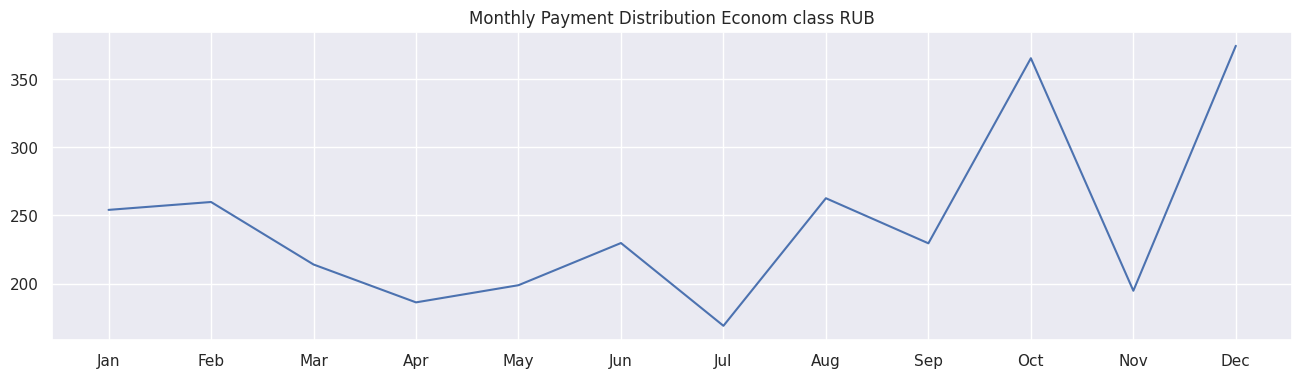

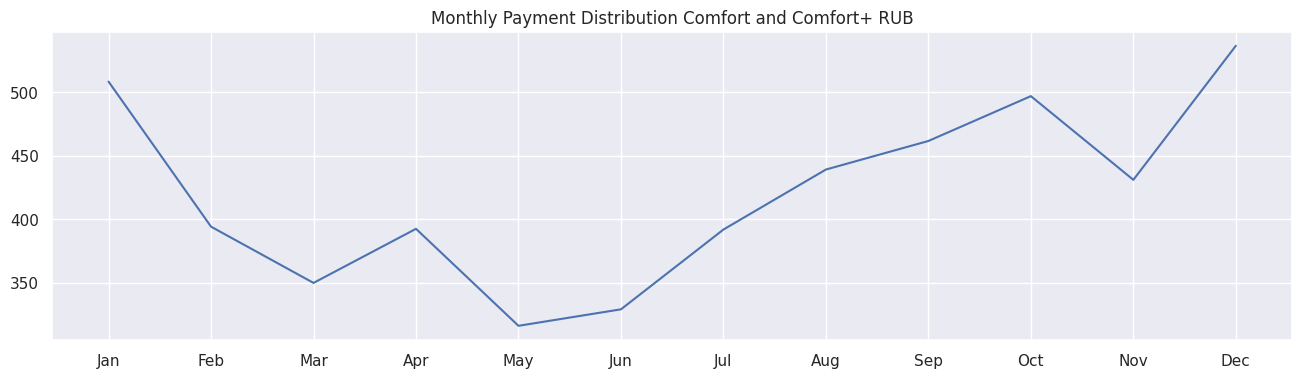

In [24]:
monthly_payment_eco  = date_df_eco.groupby('month')['payment_cost'].mean()
monthly_payment_comf = date_df_comf.groupby('month')['payment_cost'].mean()


plt.figure(figsize=(16, 4))
plt.plot(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],monthly_payment_eco)
plt.title(f'Monthly Payment Distribution Econom class RUB')
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],monthly_payment_comf)
plt.title(f'Monthly Payment Distribution Comfort and Comfort+ RUB')
plt.show()

**To sum up, these visualization tools were most helpful to me to interpret the data above as simple as possible.
Of course more detailed analysis can be done if required, perhaps suit the problem for calssification approaches and most importantly:
Time Series. Next notebooks will be devoted to this tasks using most popular time series ml approaches/.**